In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem:

## For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 1. Read the 'Sparkling' data as an appropriate Time Series data and plot the data.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PGD DSBA/Time Series/Sparkling.csv')
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

# Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

## Adding the time stamp to the data frame

In [6]:

df['Time_Stamp'] = pd.DataFrame(date)
df.drop("YearMonth",axis=1,inplace=True)
df.head()

Sparkling Time_Stamp
0       1686 1980-01-31
1       1591 1980-02-29
2       2304 1980-03-31
3       1712 1980-04-30
4       1471 1980-05-31

In [7]:
df.set_index('Time_Stamp',inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

# Plot the Time Series to understand the behaviour of the data.

In [8]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

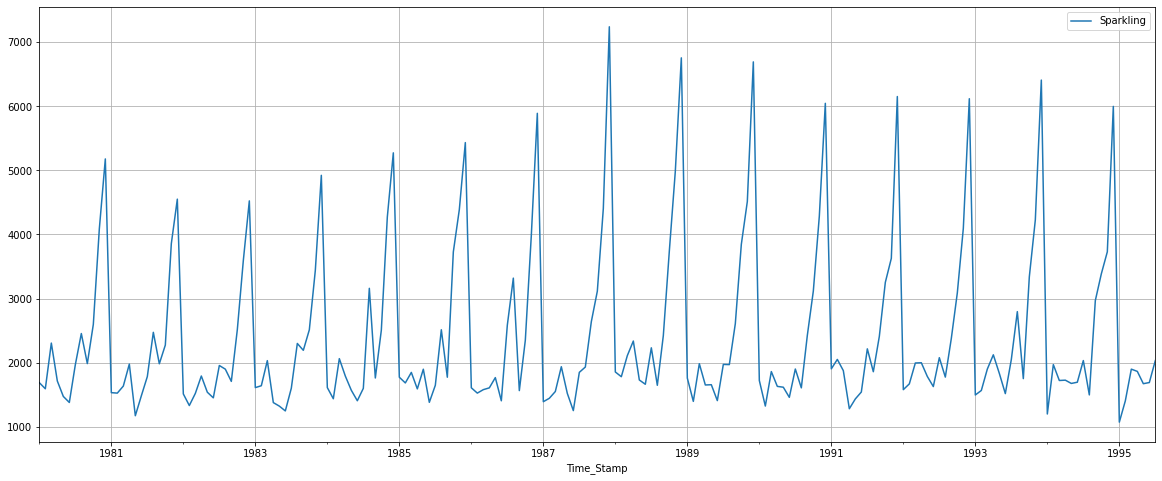

In [9]:
df.plot()
plt.grid();

# Read the 'Rose' data as an appropriate Time Series data and plot the data.

In [10]:
dfr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PGD DSBA/Time Series/Rose.csv')
dfr.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [11]:
dfr.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

# Creating the Time Stamps and adding to the data frame to make it a Time Series Data

## Adding the time stamp to the data frame

In [12]:

dfr['Time_Stamp'] = pd.DataFrame(date)
dfr.drop("YearMonth",axis=1,inplace=True)
dfr.head()

Rose Time_Stamp
0  112.0 1980-01-31
1  118.0 1980-02-29
2  129.0 1980-03-31
3   99.0 1980-04-30
4  116.0 1980-05-31

In [13]:
dfr.set_index('Time_Stamp',inplace=True)
dfr.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

# Plot the Time Series to understand the behaviour of the data.

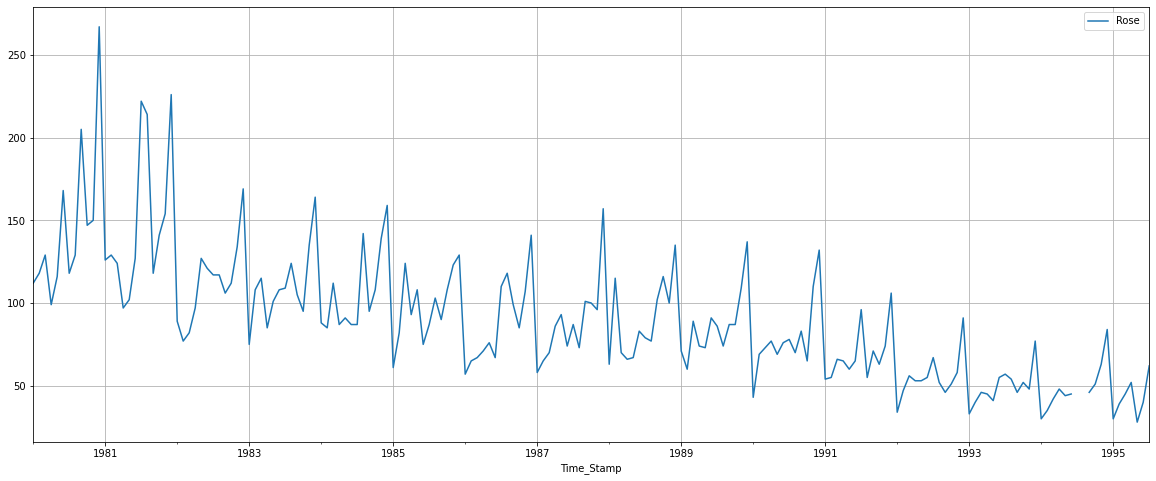

In [14]:
dfr.plot()
plt.grid();

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

## Check the basic measures of descriptive statistics

In [15]:
round(df.describe(),3)

Sparkling
count    187.000
mean    2402.417
std     1295.112
min     1070.000
25%     1605.000
50%     1874.000
75%     2549.000
max     7242.000

In [16]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [17]:
round(dfr.describe(),3)

Rose
count  185.000
mean    90.395
std     39.175
min     28.000
25%     63.000
50%     86.000
75%    112.000
max    267.000

In [18]:
dfr.isnull().sum()

Rose    2
dtype: int64

In [19]:
dfr= dfr.interpolate(limit=2, method='linear') # limit_direction="forward");

In [20]:
dfr.isnull().sum()

Rose    0
dtype: int64

## Plot a boxplot to understand the spread across different years and within different months across years.

# Sparkling Dataset

## Yearly Boxplot


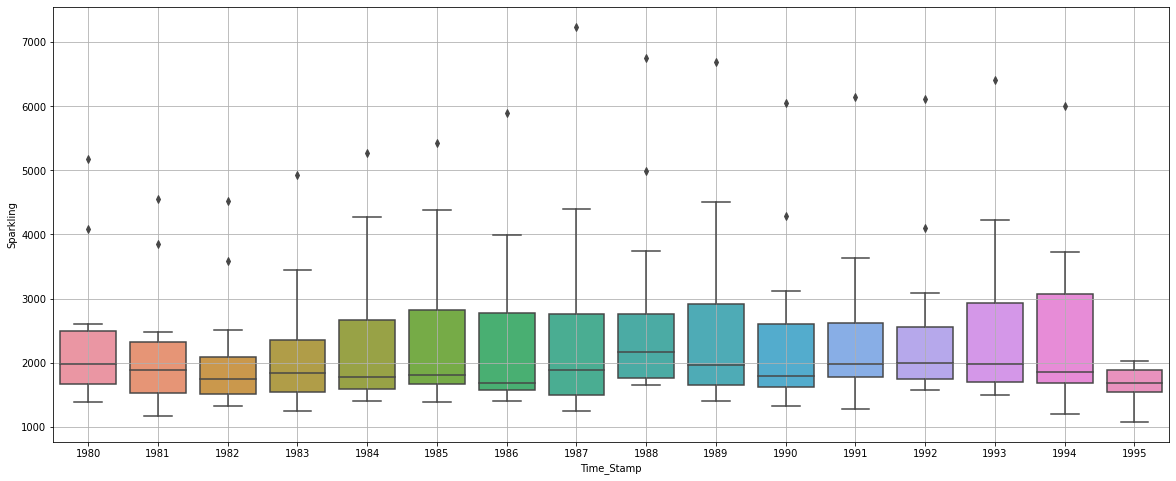

In [21]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

## Monthly Boxplot

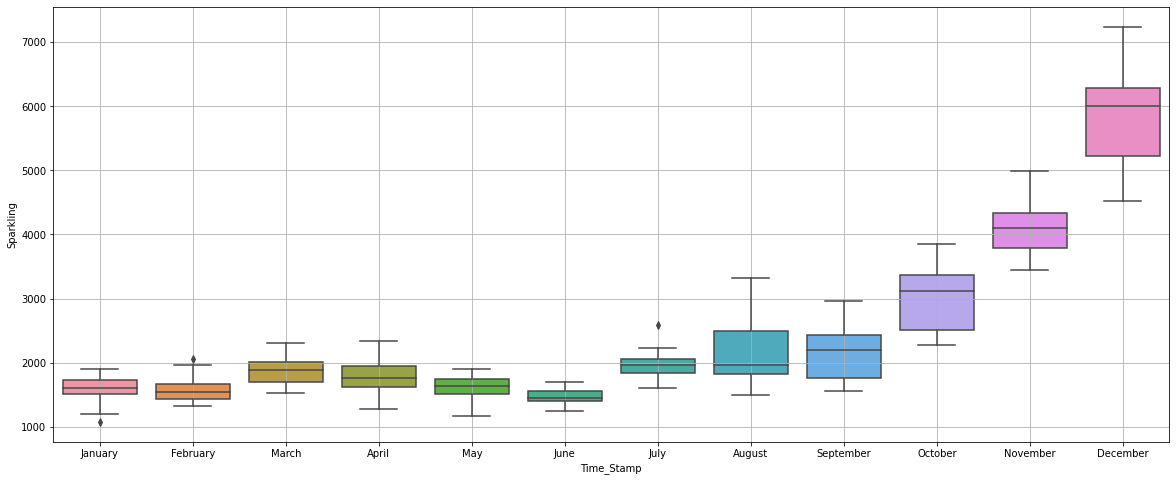

In [22]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

# Rose Dataset

## Yearly Boxplot

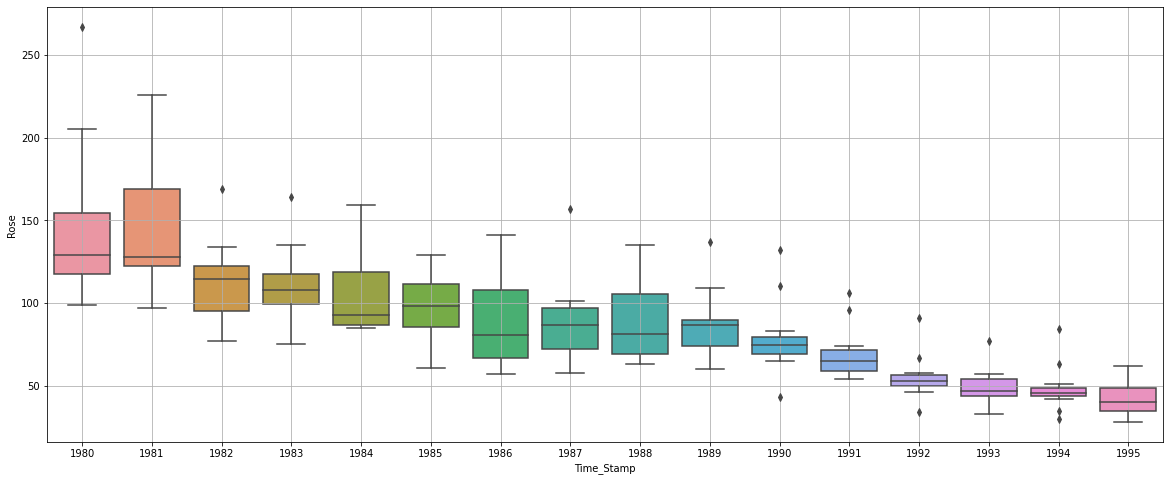

In [23]:
sns.boxplot(x = dfr.index.year,y = dfr['Rose'])
plt.grid();

## Monthly Boxplot

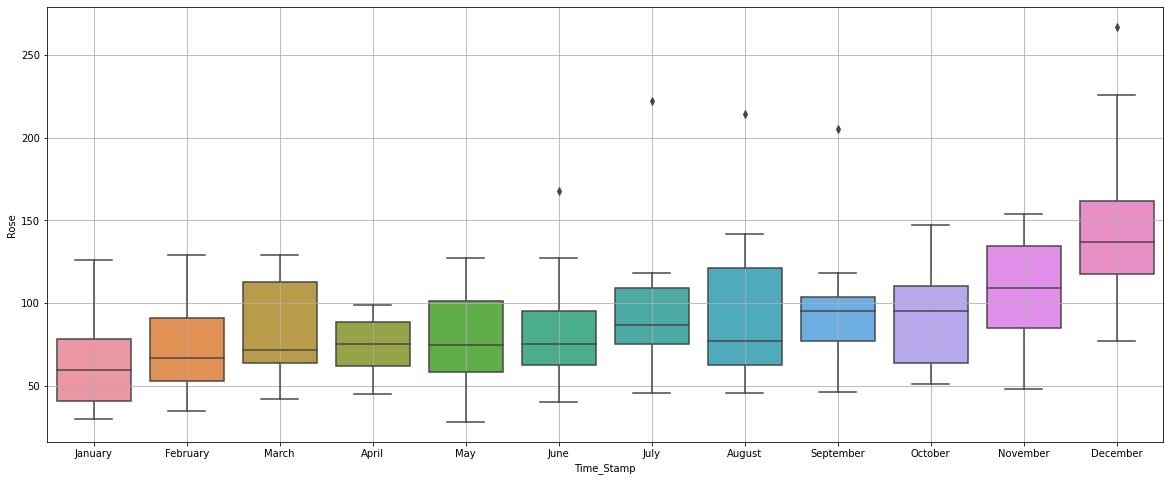

In [24]:
sns.boxplot(x = dfr.index.month_name(),y = dfr['Rose'])
plt.grid();

# Plot a time series monthplot to understand the spread across different years and within different months across years

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


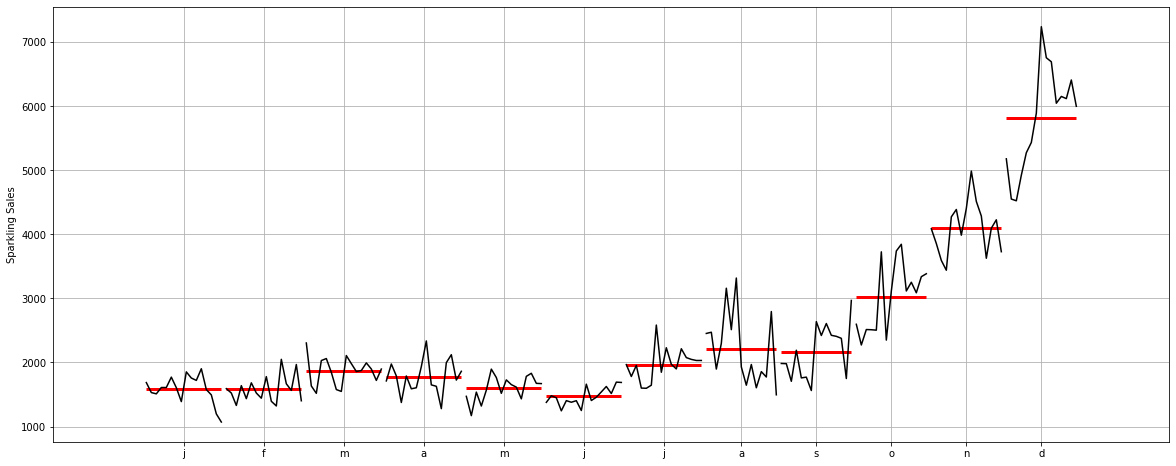

In [25]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sparkling Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Sparkling' in this case) across various months. The red line is the median value.

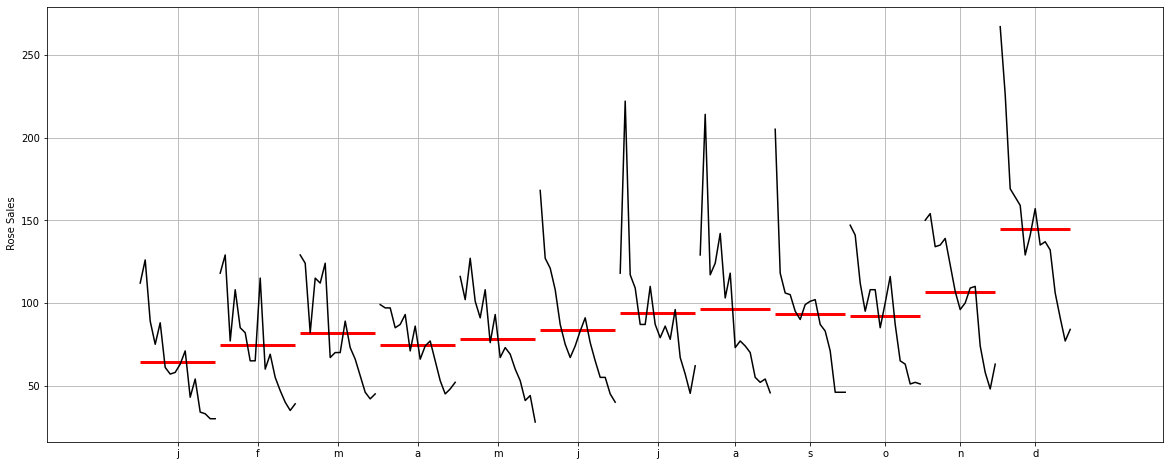

In [26]:
month_plot(dfr['Rose'],ylabel= ' Rose Sales')
plt.grid();

# Plot a graph of monthly Sparkling Sales across years.

In [27]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4   ...      9       10      11      12
Time_Stamp                                  ...                                
1980        1686.0  1591.0  2304.0  1712.0  ...  1984.0  2596.0  4087.0  5179.0
1981        1530.0  1523.0  1633.0  1976.0  ...  1981.0  2273.0  3857.0  4551.0
1982        1510.0  1329.0  1518.0  1790.0  ...  1706.0  2514.0  3593.0  4524.0
1983        1609.0  1638.0  2030.0  1375.0  ...  2191.0  2511.0  3440.0  4923.0
1984        1609.0  1435.0  2061.0  1789.0  ...  1759.0  2504.0  4273.0  5274.0
1985        1771.0  1682.0  1846.0  1589.0  ...  1771.0  3727.0  4388.0  5434.0
1986        1606.0  1523.0  1577.0  1605.0  ...  1562.0  2349.0  3987.0  5891.0
1987        1389.0  1442.0  1548.0  1935.0  ...  2638.0  3114.0  4405.0  7242.0
1988        1853.0  1779.0  2108.0  2336.0  ...  2421.0  3740.0  4988.0  6757.0
1989        1757.0  1394.0  1982.0  1650.0  ...  2608.0  3845.0  4514.0  6694.0
1990        1720.0  1321.0  1859.0  1628.0  ...  2424.0  3116.0  4286.0  6047.0
1991        1902.0  2049.0  1874.0  1279.0  ...  2408.0  3252.0  3627.0  6153.0
1992        1577.0  1667.0  1993.0  1997.0  ...  2377.0  3088.0  4096.0  6119.0
1993        1494.0  1564.0  1898.0  2121.0  ...  1749.0  3339.0  4227.0  6410.0
1994        1197.0  1968.0  1720.0  1725.0  ...  2968.0  3385.0  3729.0  5999.0
1995        1070.0  1402.0  1897.0  1862.0  ...     NaN     NaN     NaN     NaN

[16 rows x 12 columns]

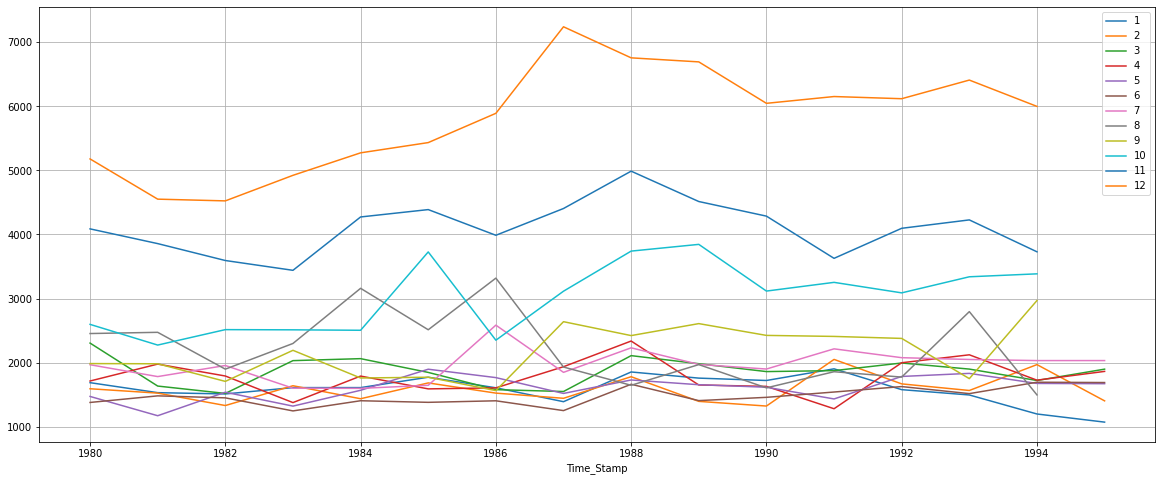

In [28]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

# Plot a graph of monthly Rose Sales across years.

In [29]:
monthly_sales_across_years = pd.pivot_table(dfr, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4   ...     9      10     11     12
Time_Stamp                             ...                            
1980        112.0  118.0  129.0  99.0  ...  205.0  147.0  150.0  267.0
1981        126.0  129.0  124.0  97.0  ...  118.0  141.0  154.0  226.0
1982         89.0   77.0   82.0  97.0  ...  106.0  112.0  134.0  169.0
1983         75.0  108.0  115.0  85.0  ...  105.0   95.0  135.0  164.0
1984         88.0   85.0  112.0  87.0  ...   95.0  108.0  139.0  159.0
1985         61.0   82.0  124.0  93.0  ...   90.0  108.0  123.0  129.0
1986         57.0   65.0   67.0  71.0  ...   99.0   85.0  107.0  141.0
1987         58.0   65.0   70.0  86.0  ...  101.0  100.0   96.0  157.0
1988         63.0  115.0   70.0  66.0  ...  102.0  116.0  100.0  135.0
1989         71.0   60.0   89.0  74.0  ...   87.0   87.0  109.0  137.0
1990         43.0   69.0   73.0  77.0  ...   83.0   65.0  110.0  132.0
1991         54.0   55.0   66.0  65.0  ...   71.0   63.0   74.0  106.0
1992         34.0   47.0   56.0  53.0  ...   46.0   51.0   58.0   91.0
1993         33.0   40.0   46.0  45.0  ...   46.0   52.0   48.0   77.0
1994         30.0   35.0   42.0  48.0  ...   46.0   51.0   63.0   84.0
1995         30.0   39.0   45.0  52.0  ...    NaN    NaN    NaN    NaN

[16 rows x 12 columns]

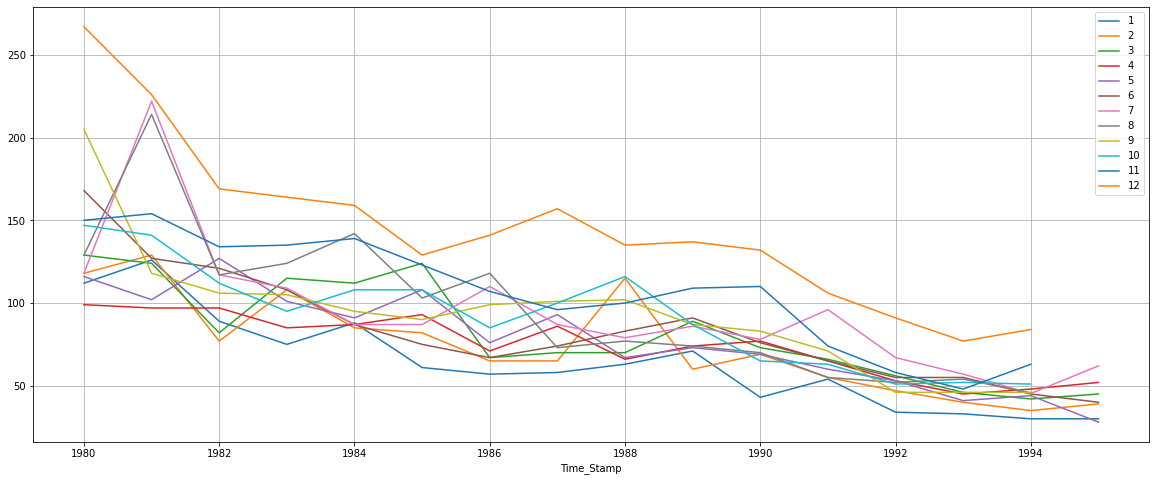

In [30]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

# Plot the Empirical Cumulative Distribution.

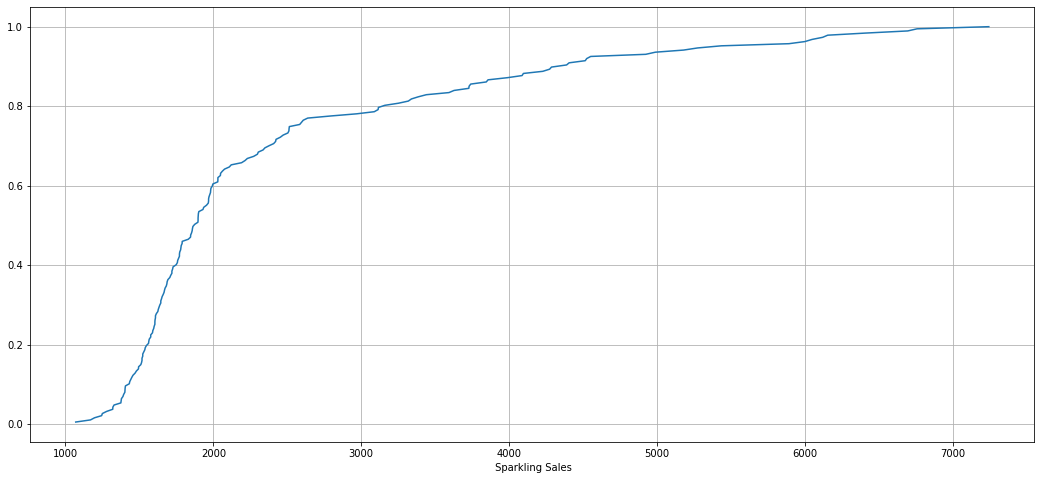

In [31]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF 
#cumulative distibution function
plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel(' Sparkling Sales');

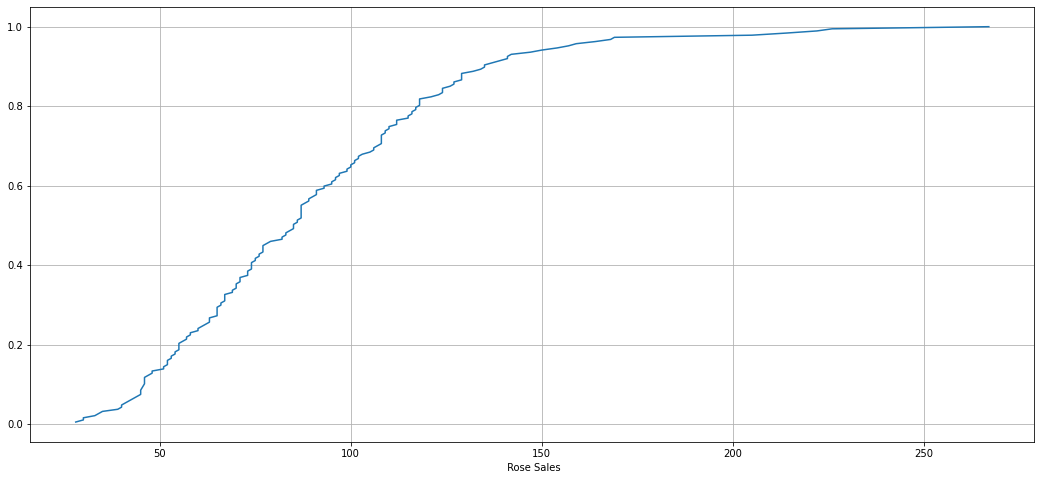

In [32]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF 
#cumulative distibution function
plt.figure(figsize = (18, 8))
cdf = ECDF(dfr['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel(' Rose Sales');

# Plot the average Sparkling Sales per month and the month on month percentage change of Sparkling Sales.

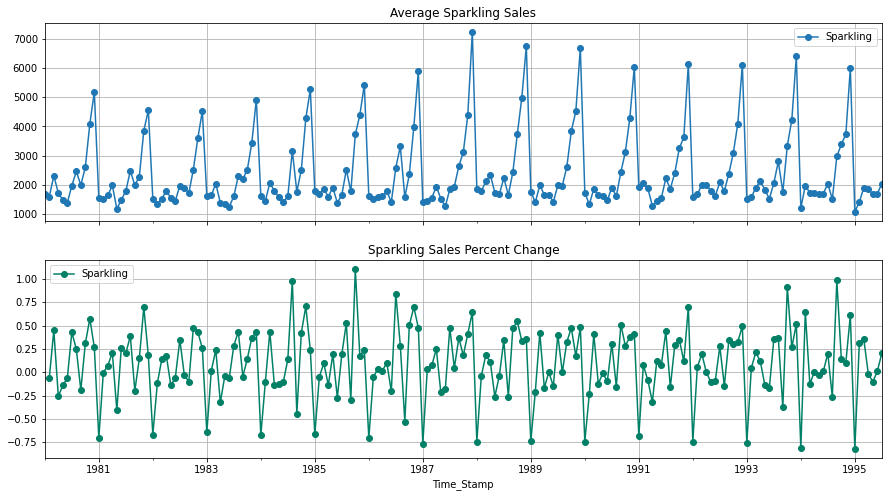

In [33]:
# group by date and get average Sparkling Sales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

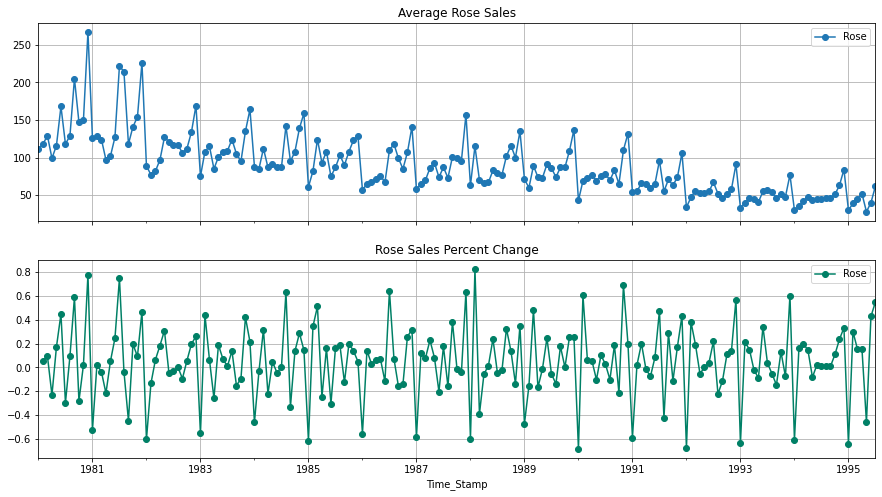

In [34]:
# group by date and get average Rose Sales, and precent change
average    = dfr.groupby(dfr.index)["Rose"].mean()
pct_change = dfr.groupby(dfr.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

## Decompose the Time Series and plot the different components.

In [35]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

## Additional Decoposition

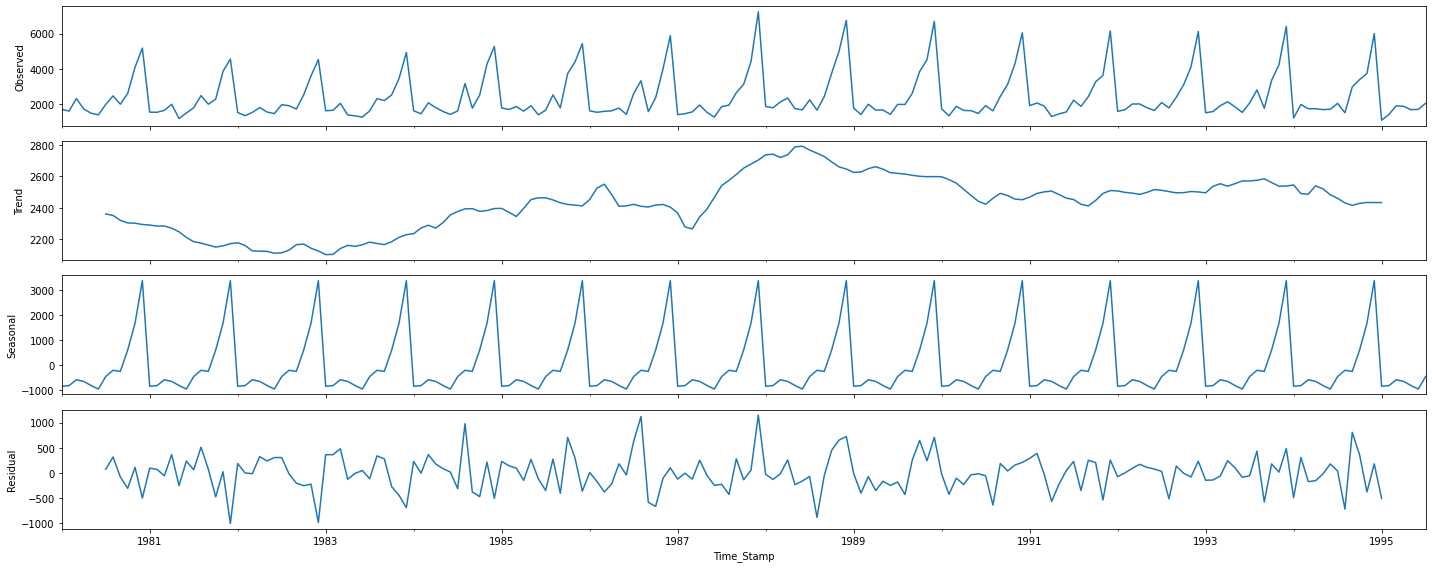

In [36]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: Sparkling, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307

## Multiplicative Decomposition

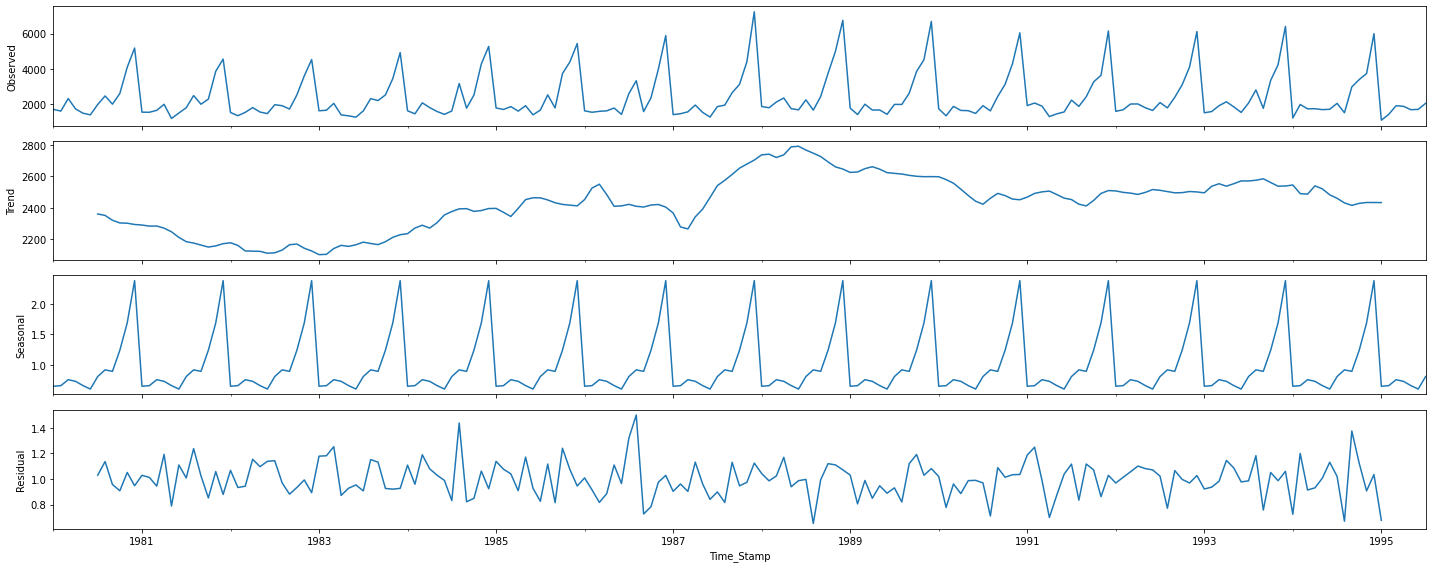

In [38]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [39]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: Sparkling, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Na

## Check for stationarity of the whole Time Series data.

In [40]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

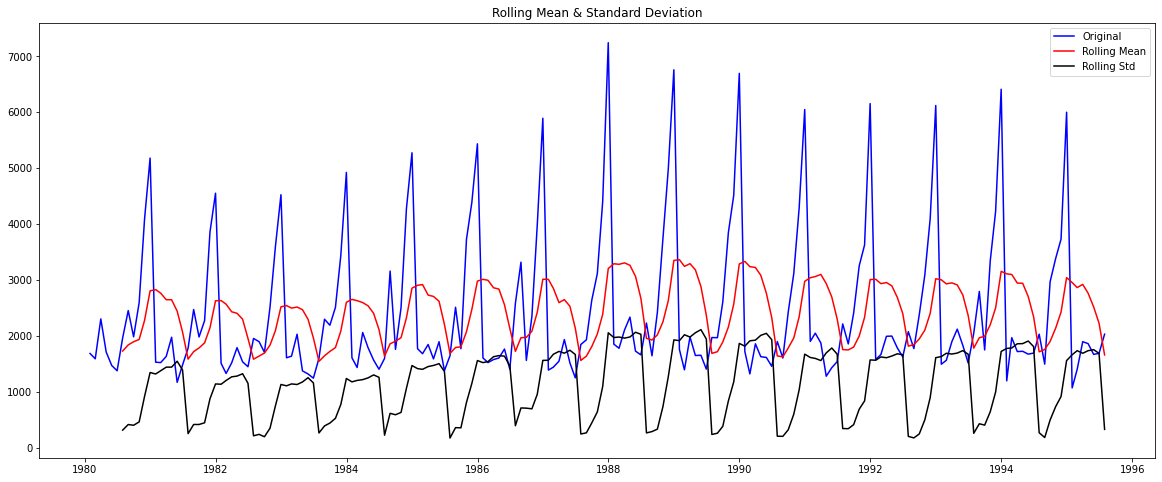

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [41]:
test_stationarity(df['Sparkling'])

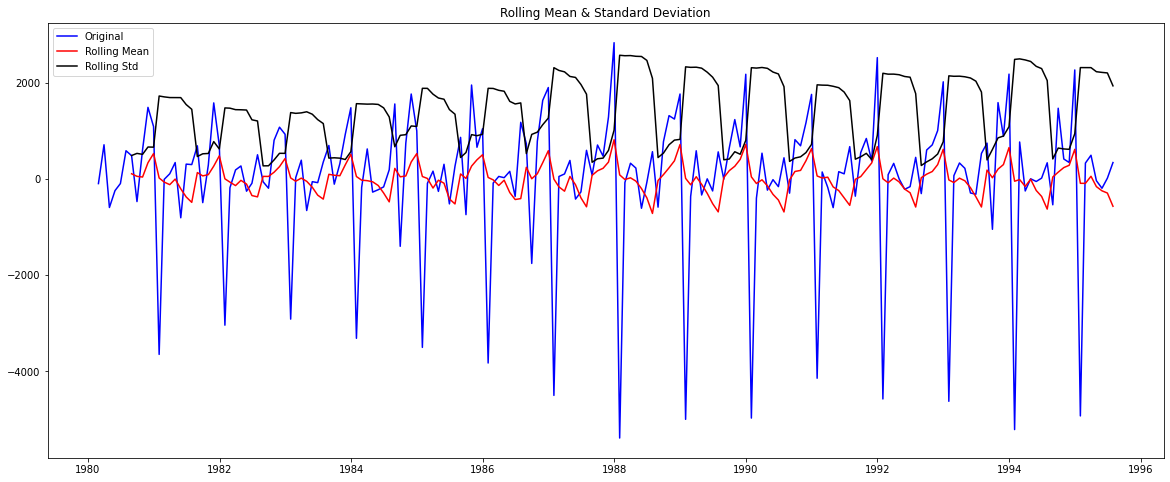

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [42]:
test_stationarity(df['Sparkling'].diff().dropna())

# Rose Dataset

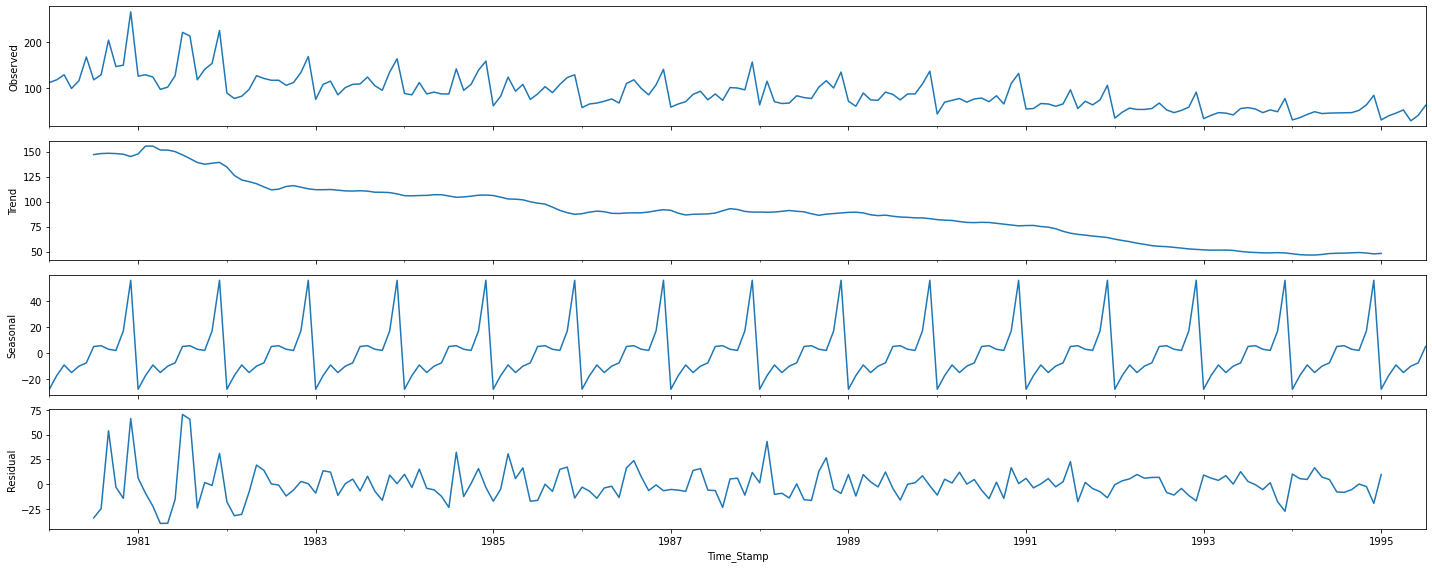

In [43]:
decomposition = seasonal_decompose(dfr['Rose'],model='additive')
decomposition.plot();

In [44]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: Rose, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: Rose, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.161425


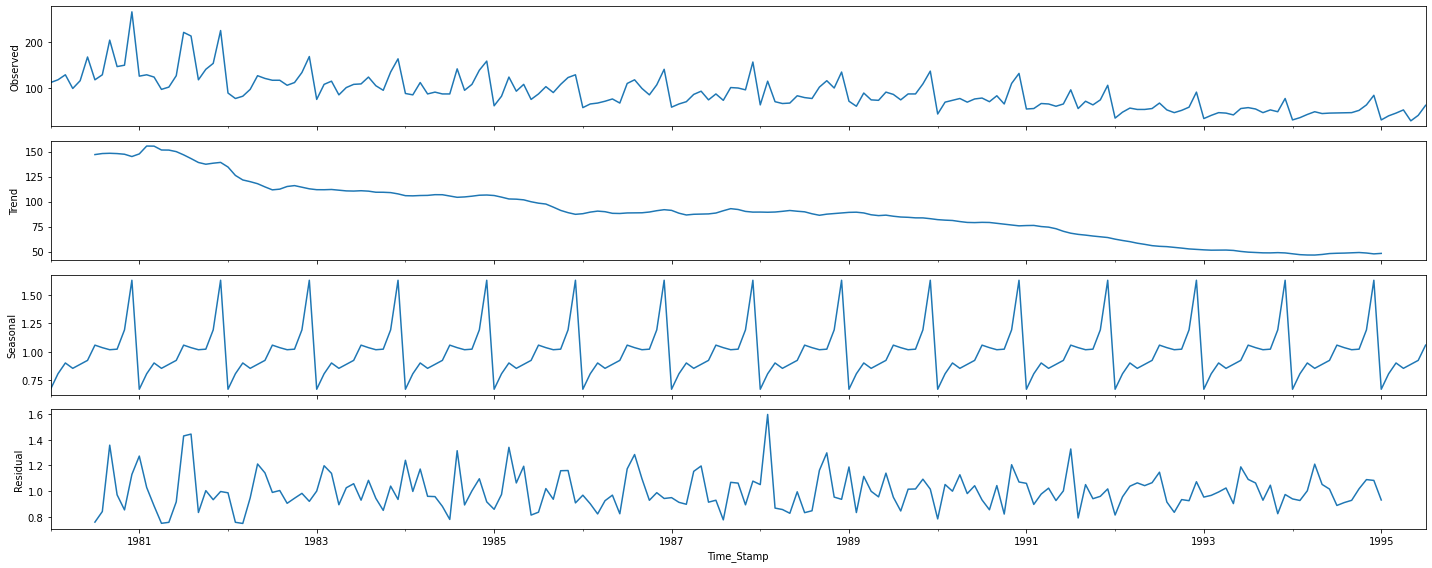

In [45]:
decomposition = seasonal_decompose(dfr['Rose'],model='multiplicative')
decomposition.plot();

In [46]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: Rose, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: Rose, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: Rose, dtype: float

## Check for stationarity of the whole Time Series data.

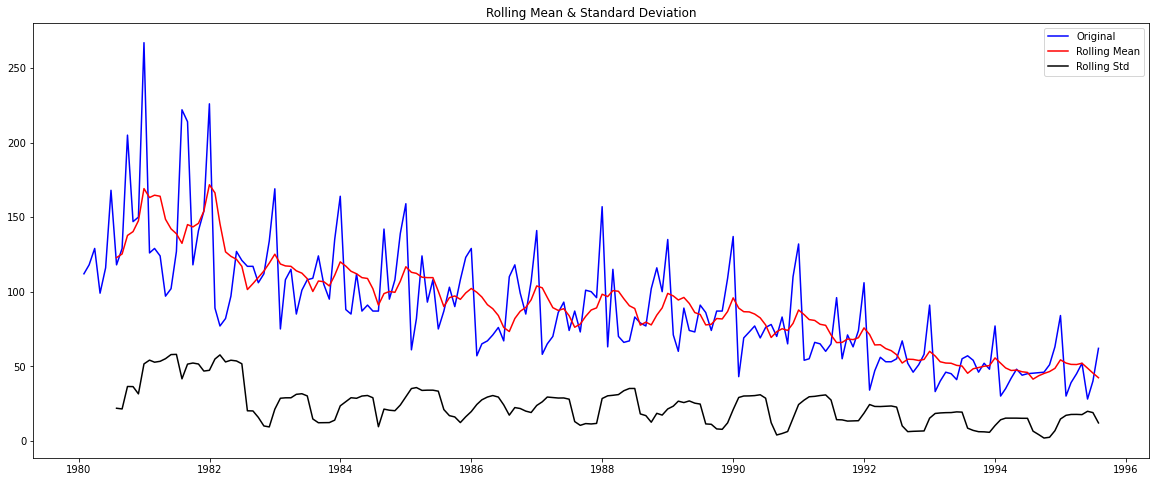

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [47]:
test_stationarity(dfr['Rose'])

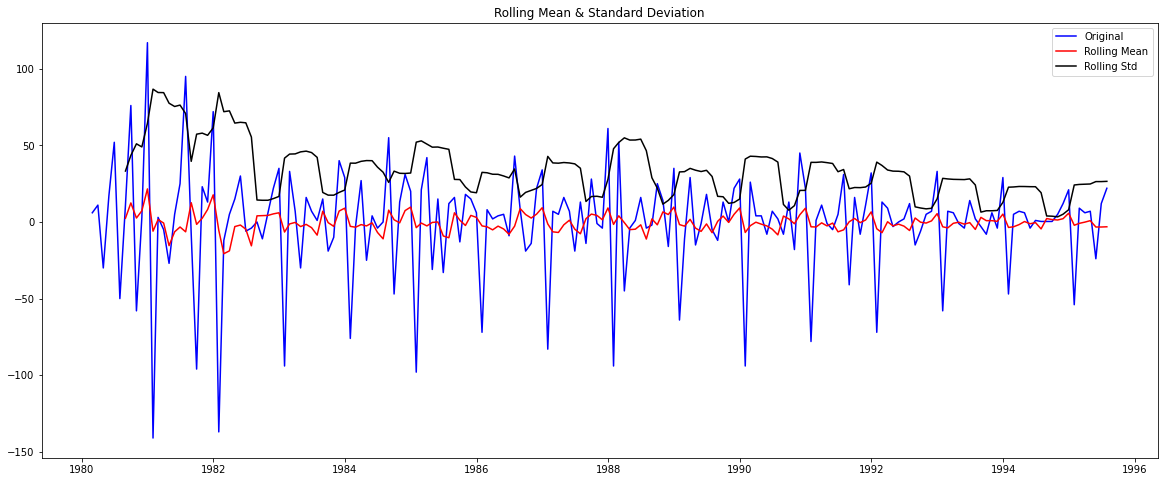

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [48]:
test_stationarity(dfr['Rose'].diff().dropna())

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

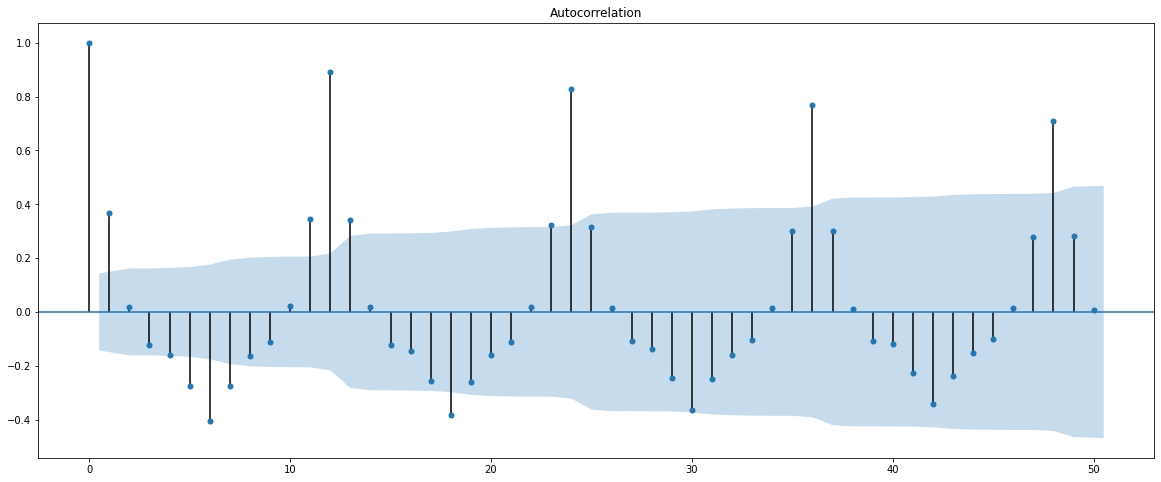

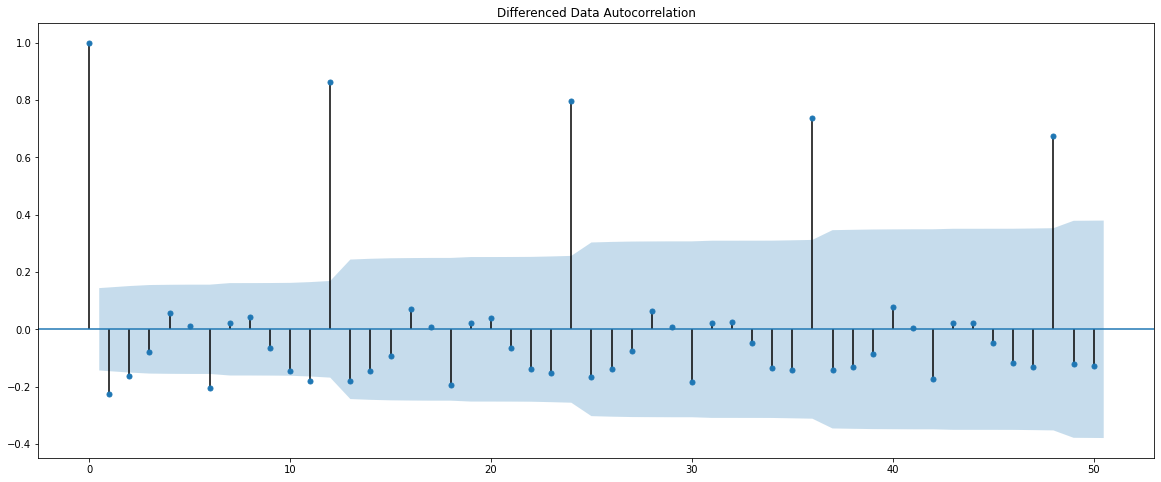

In [50]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

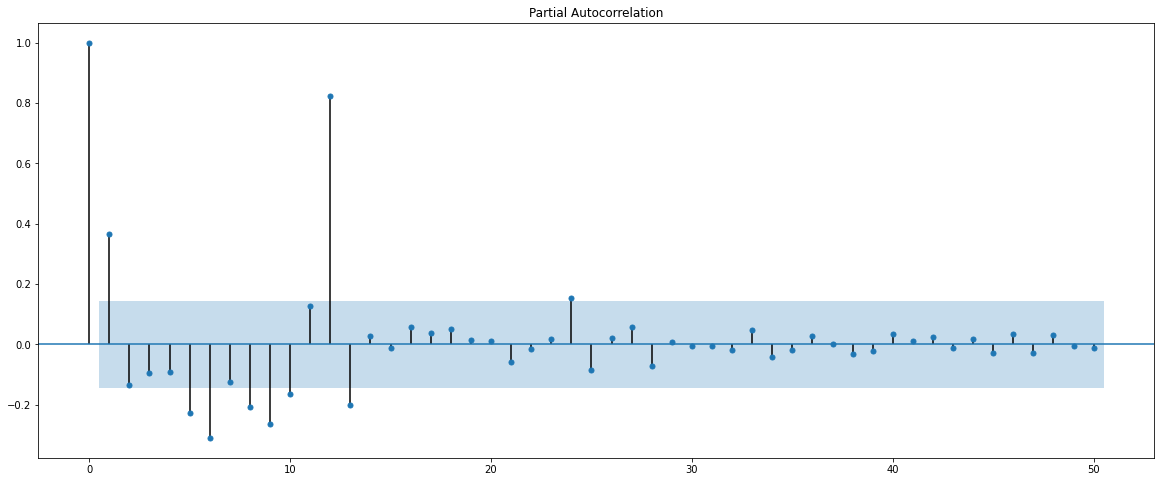

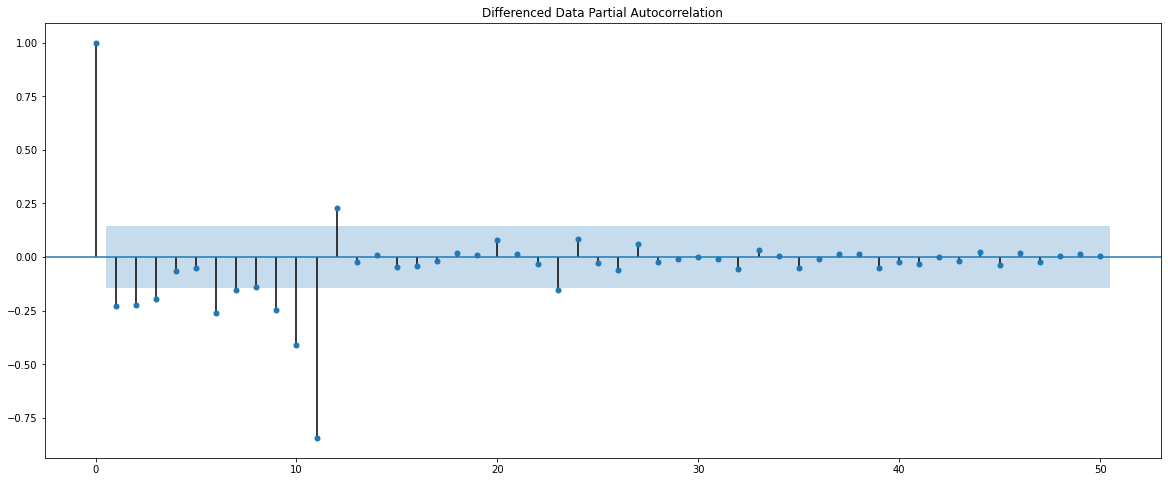

In [51]:
plot_pacf(df['Sparkling'],lags=50,method='ywmle')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method='ywmle')
plt.show()

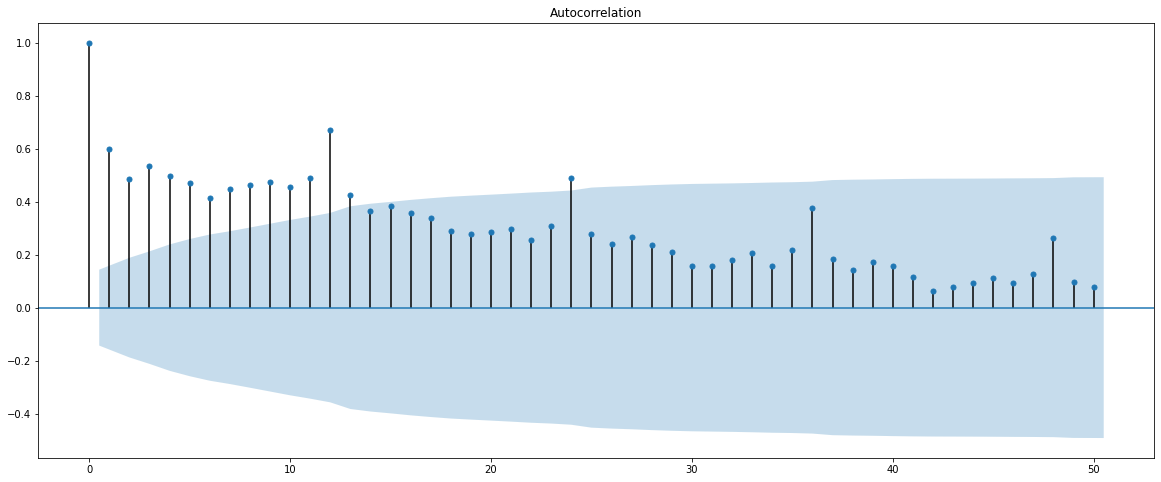

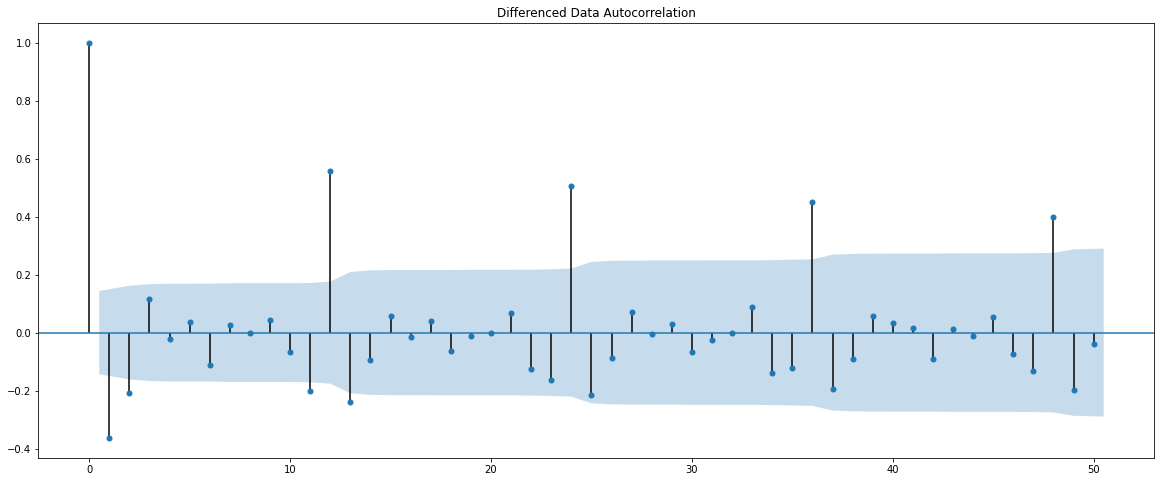

In [52]:
plot_acf(dfr['Rose'],lags=50)
plot_acf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

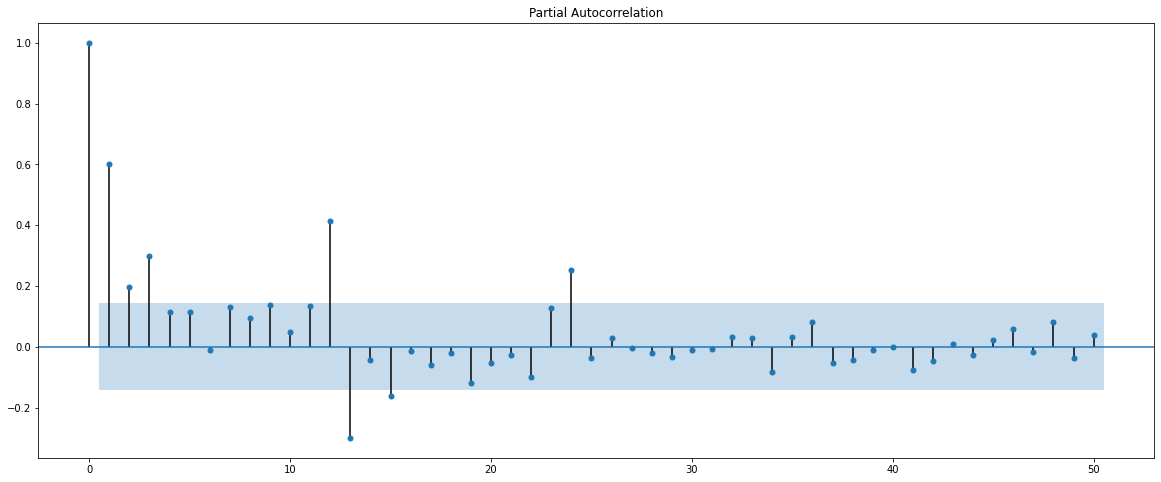

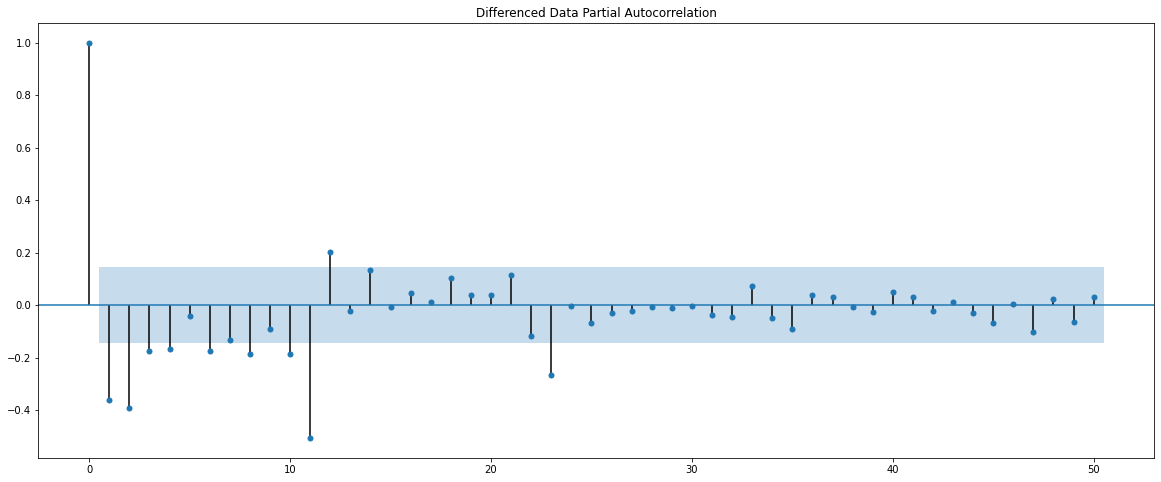

In [53]:
plot_pacf(dfr['Rose'],lags=50,method='ywmle')
plot_pacf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method='ywmle')
plt.show()

# 3. Split the data into training and test. The test data should start in 1991.

In [54]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [55]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [56]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [57]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


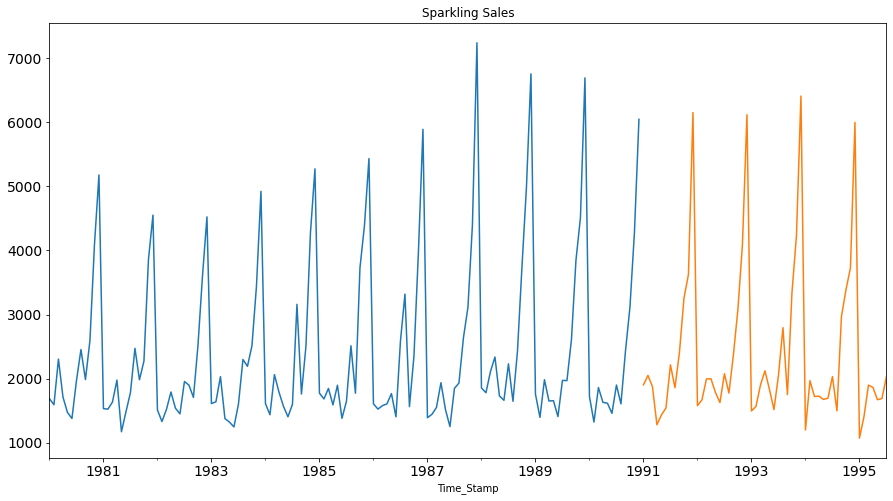

In [58]:
#Plotting data
train.Sparkling.plot(figsize=(15,8), title= 'Sparkling Sales', fontsize=14)
test.Sparkling.plot(figsize=(15,8), title= 'Sparkling Sales', fontsize=14)
plt.show()

In [59]:
rtrain=dfr[dfr.index.year < 1991]
rtest=dfr[dfr.index.year >= 1991]

In [60]:
print('First few rows of Training Data')
display(rtrain.head())
print('Last few rows of Training Data')
display(rtrain.tail())
print('First few rows of Test Data')
display(rtest.head())
print('Last few rows of Test Data')
display(rtest.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [61]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


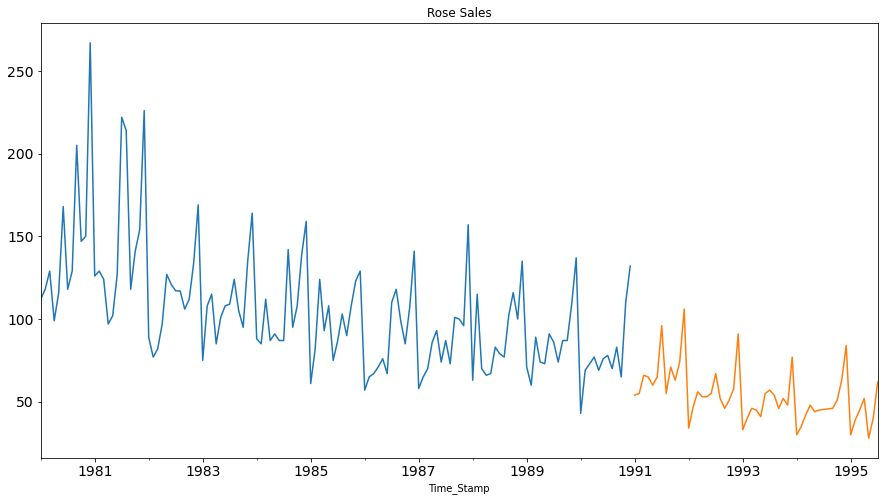

In [62]:
#Plotting data
rtrain.Rose.plot(figsize=(15,8), title= 'Rose Sales', fontsize=14)
rtest.Rose.plot(figsize=(15,8), title= 'Rose Sales', fontsize=14)
plt.show()

# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.

## Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

# Sparkling

In [63]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [64]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [65]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛  to build the model on the training data and test the model on the test data.

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

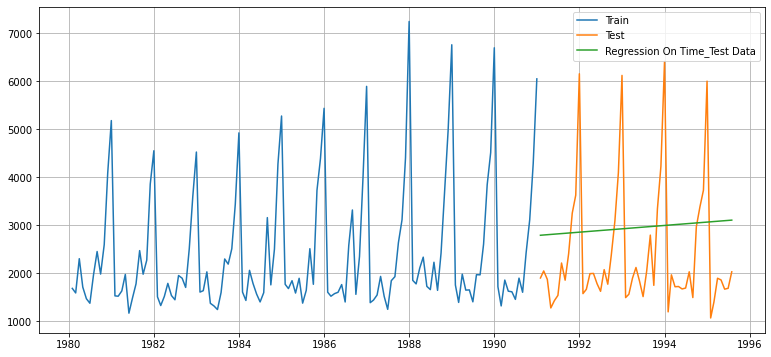

In [69]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

## Defining the accuracy metrics.

In [70]:
from sklearn import metrics

## Model Evaluation

In [71]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


# Rose

In [72]:
rtrain_time = [i+1 for i in range(len(rtrain))]
rtest_time = [i+133 for i in range(len(rtest))]
print('Training Time instance','\n',rtrain_time)
print('Test Time instance','\n',rtest_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [73]:
LinearRegression_rtrain = rtrain.copy()
LinearRegression_rtest = rtest.copy()

In [74]:
LinearRegression_rtrain['time'] = rtrain_time
LinearRegression_rtest['time'] = rtest_time

print('First few rows of Training Data','\n',LinearRegression_rtrain.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_rtrain.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_rtest.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_rtest.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [75]:
lr.fit(LinearRegression_rtrain[['time']],LinearRegression_rtrain['Rose'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

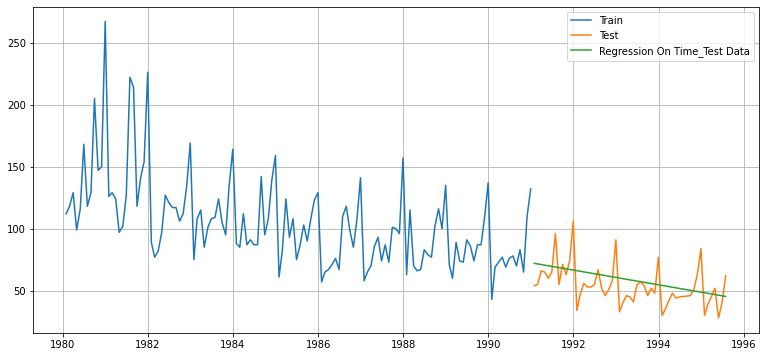

In [76]:
rtest_predictions_model1         = lr.predict(LinearRegression_rtest[['time']])
LinearRegression_rtest['RegOnTime'] = rtest_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_rtest['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [77]:
## Test Data - RMSE

rmse_model1_rtest = metrics.mean_squared_error(rtest['Rose'],rtest_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_rtest))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [78]:
resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse_model1_test],'Test RMSE Rose ': [rmse_model1_rtest]},index=['RegressionOnTime'])
resultsDf

Test RMSE Sparkling  Test RMSE Rose 
RegressionOnTime          1389.135175        15.268955

# Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

# Sparkling

In [79]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [80]:
train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [81]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

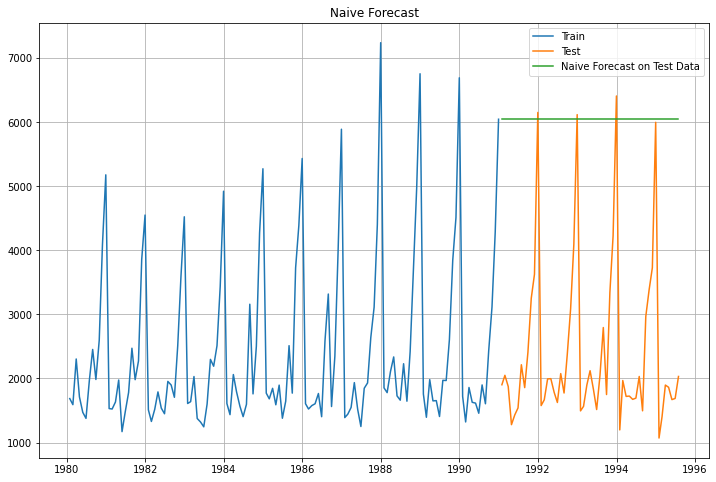

In [82]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [83]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


# Rose

In [84]:
NaiveModel_rtrain = rtrain.copy()
NaiveModel_rtest = rtest.copy()

In [85]:
rtrain.tail()

Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [86]:
NaiveModel_rtest['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_rtest['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

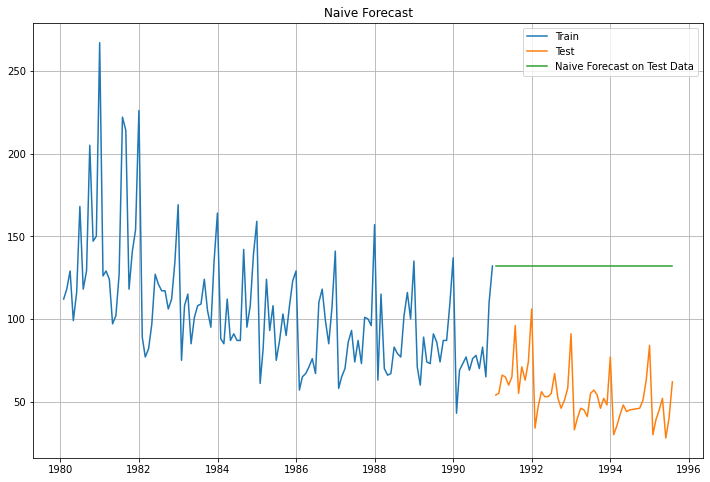

In [87]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(NaiveModel_rtest['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [88]:
## Test Data - RMSE

rmse_model2_rtest = metrics.mean_squared_error(rtest['Rose'],NaiveModel_rtest['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_rtest))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [89]:
resultsDf_2 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model2_test],'Test RMSE Rose ': [rmse_model2_rtest]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE Sparkling  Test RMSE Rose 
RegressionOnTime          1389.135175        15.268955
NaiveModel                3864.279352        79.718773

# Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.¶

# Sparkling

In [90]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [91]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

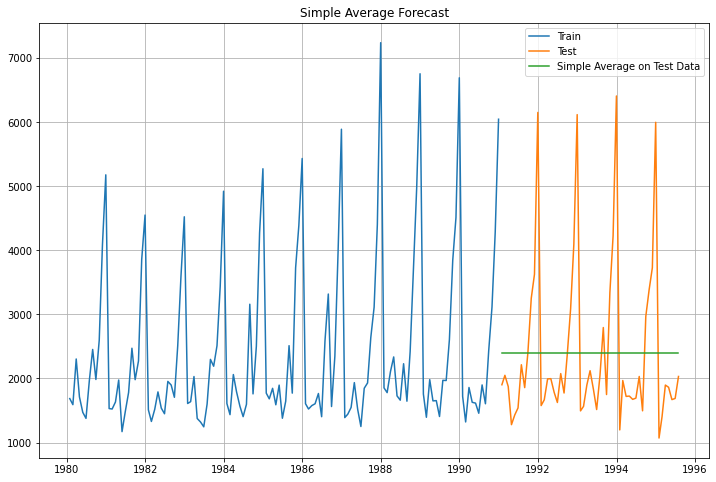

In [92]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [93]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


# Rose 

In [94]:
SimpleAverage_rtrain = rtrain.copy()
SimpleAverage_rtest = rtest.copy()

In [95]:
SimpleAverage_rtest['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_rtest.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

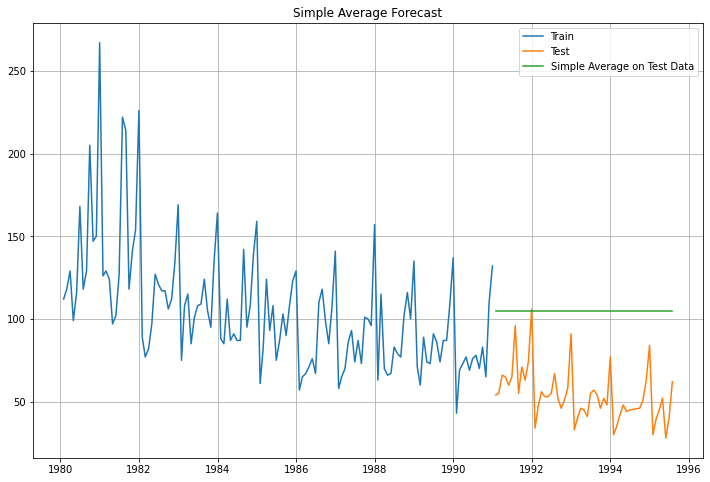

In [96]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_rtrain['Rose'], label='Train')
plt.plot(SimpleAverage_rtest['Rose'], label='Test')
plt.plot(SimpleAverage_rtest['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [97]:
## Test Data - RMSE 

rmse_model3_rtest = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_rtest['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_rtest))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [98]:
resultsDf_3 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model3_test],'Test RMSE Rose ': [rmse_model3_rtest]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE Sparkling  Test RMSE Rose 
RegressionOnTime            1389.135175        15.268955
NaiveModel                  3864.279352        79.718773
SimpleAverageModel          1275.081804        53.460570

# Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

# Sparkling

In [99]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

## Trailing moving averages

In [100]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1980-01-31       1686         NaN         NaN          NaN          NaN
1980-02-29       1591      1638.5         NaN          NaN          NaN
1980-03-31       2304      1947.5         NaN          NaN          NaN
1980-04-30       1712      2008.0     1823.25          NaN          NaN
1980-05-31       1471      1591.5     1769.50          NaN          NaN
1980-06-30       1377      1424.0     1716.00  1690.166667          NaN
1980-07-31       1966      1671.5     1631.50  1736.833333          NaN
1980-08-31       2453      2209.5     1816.75  1880.500000          NaN
1980-09-30       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-31       2596      2290.0     2249.75  1974.500000  1939.333333

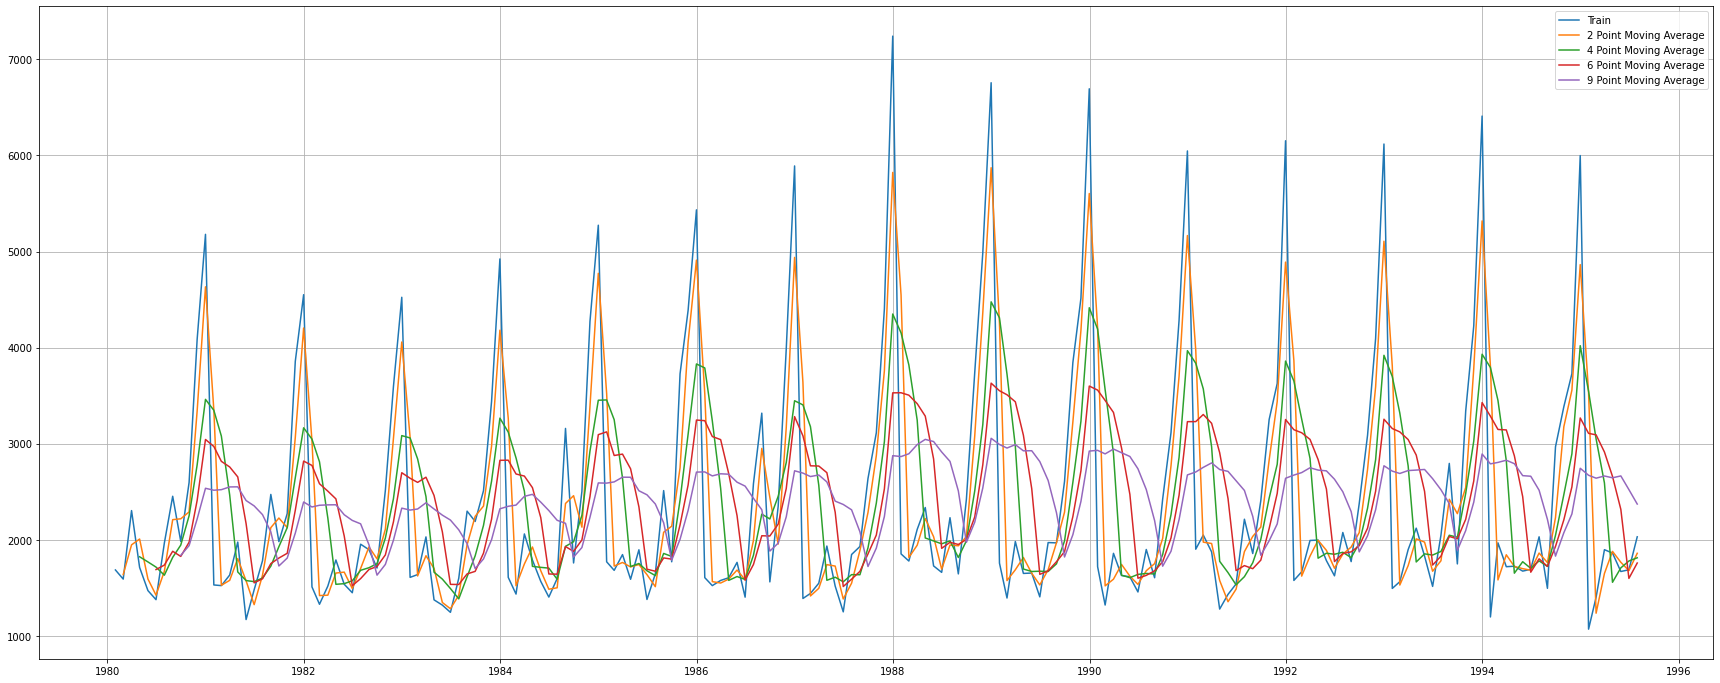

In [101]:
## Plotting on the whole data

plt.figure(figsize=(30,12))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [102]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df.index.year >= 1991]

In [103]:
trailing_MovingAverage_train.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

In [104]:
trailing_MovingAverage_test.head()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1991-01-31       1902      3974.5     3837.75  3230.000000  2705.666667
1991-02-28       2049      1975.5     3571.00  3304.000000  2753.888889
1991-03-31       1874      1961.5     2968.00  3212.333333  2800.222222
1991-04-30       1279      1576.5     1776.00  2906.166667  2731.333333
1991-05-31       1432      1355.5     1658.50  2430.500000  2712.111111

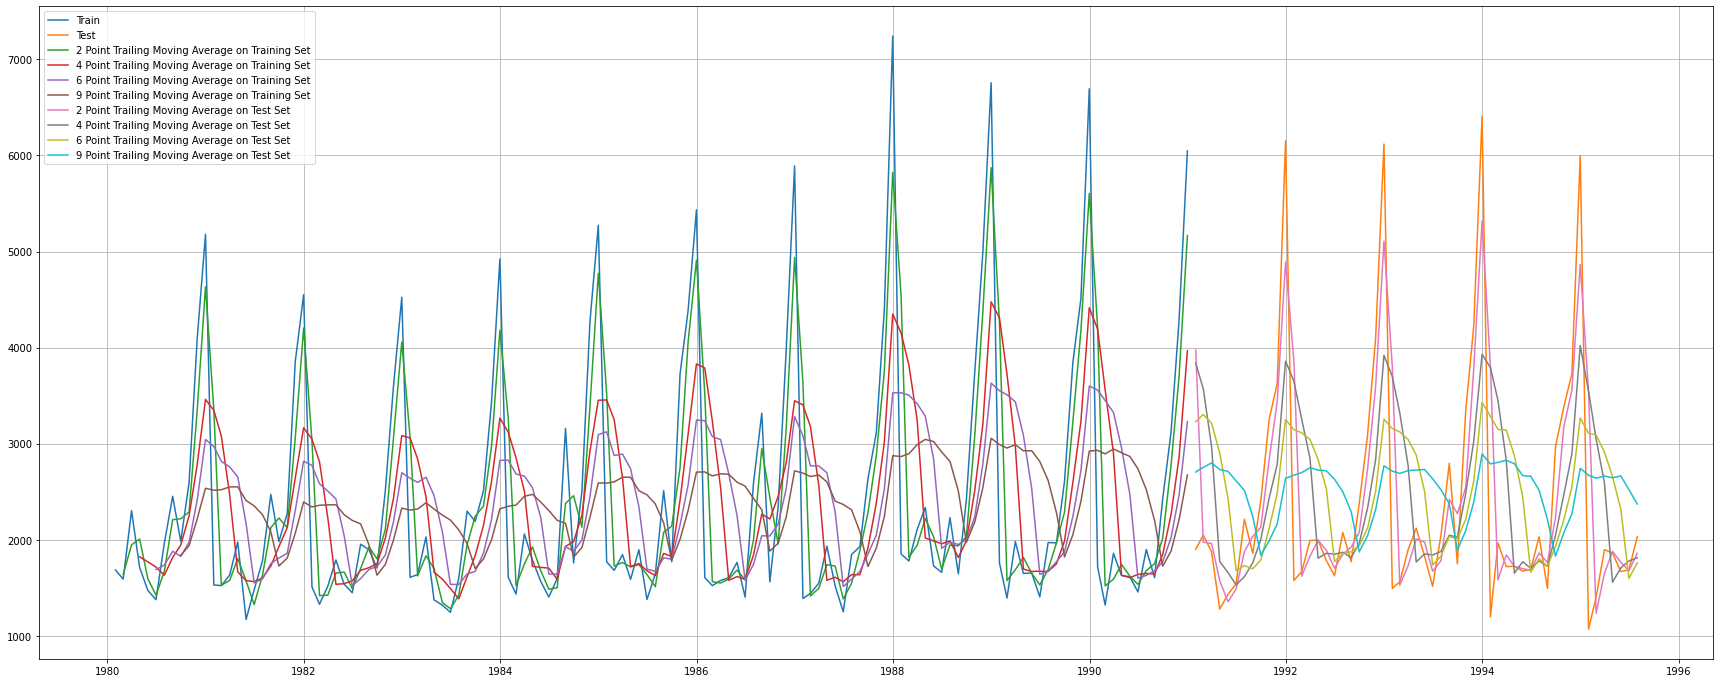

In [105]:
## Plotting on both the Training and Test data

plt.figure(figsize=(30,12))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

Done only on the test data

In [106]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


# Rose 

In [107]:
rMovingAverage = dfr.copy()
rMovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [108]:

rMovingAverage['Trailing_2'] = rMovingAverage['Rose'].rolling(2).mean()
rMovingAverage['Trailing_4'] = rMovingAverage['Rose'].rolling(4).mean()
rMovingAverage['Trailing_6'] = rMovingAverage['Rose'].rolling(6).mean()
rMovingAverage['Trailing_9'] = rMovingAverage['Rose'].rolling(9).mean()

rMovingAverage.head(10)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0      114.50         NaN         NaN
1980-05-31  116.0       107.5      115.50         NaN         NaN
1980-06-30  168.0       142.0      128.00  123.666667         NaN
1980-07-31  118.0       143.0      125.25  124.666667         NaN
1980-08-31  129.0       123.5      132.75  126.500000         NaN
1980-09-30  205.0       167.0      155.00  139.166667  132.666667
1980-10-31  147.0       176.0      149.75  147.166667  136.555556

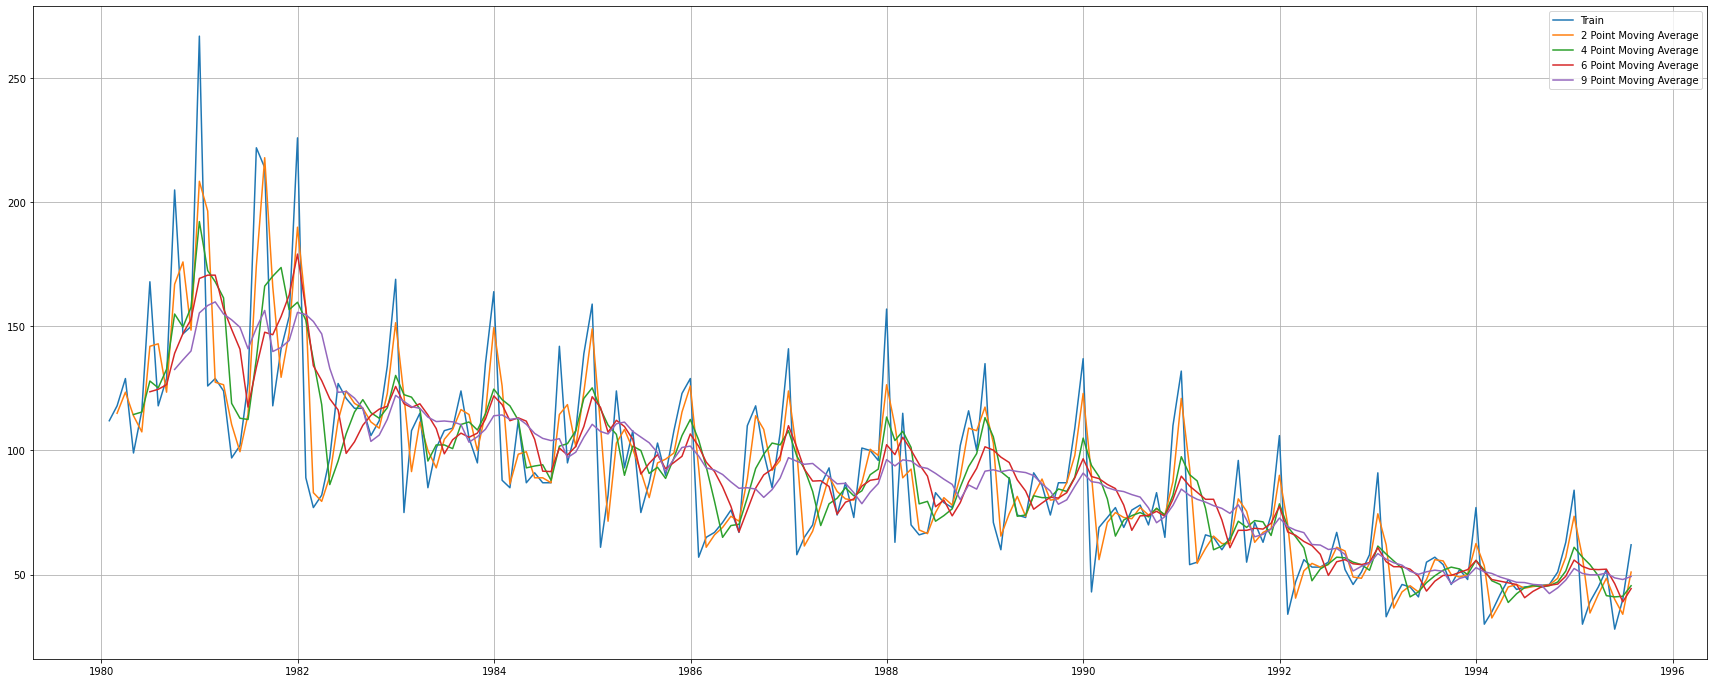

In [109]:
## Plotting on the whole data

plt.figure(figsize=(30,12))
plt.plot(rMovingAverage['Rose'], label='Train')
plt.plot(rMovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(rMovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(rMovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(rMovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [110]:
#Creating train and test set 
trailing_MovingAverage_rtrain=rMovingAverage[dfr.index.year < 1991] 
trailing_MovingAverage_rtest=rMovingAverage[dfr.index.year >= 1991]

In [111]:
trailing_MovingAverage_rtrain.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

In [112]:
trailing_MovingAverage_rtest.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                      
1991-01-31  54.0        93.0       90.25   85.666667   81.888889
1991-02-28  55.0        54.5       87.75   83.166667   80.333333
1991-03-31  66.0        60.5       76.75   80.333333   79.222222
1991-04-30  65.0        65.5       60.00   80.333333   77.777778
1991-05-31  60.0        62.5       61.50   72.000000   76.666667

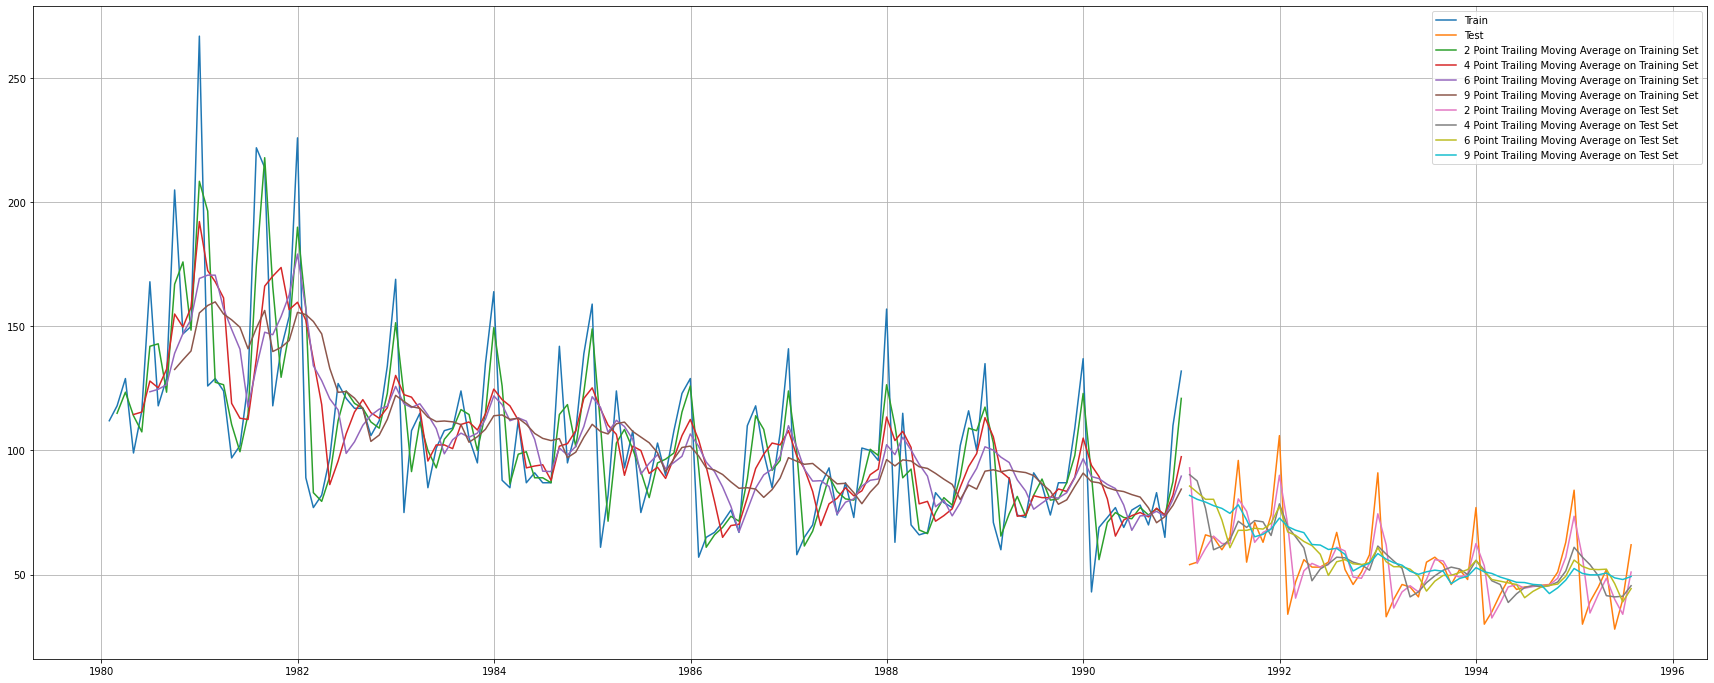

In [113]:
## Plotting on both the Training and Test data

plt.figure(figsize=(30,12))
plt.plot(trailing_MovingAverage_rtrain['Rose'], label='Train')
plt.plot(trailing_MovingAverage_rtest['Rose'], label='Test')

plt.plot(trailing_MovingAverage_rtrain['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_rtrain['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_rtrain['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_rtrain['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_rtest['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_rtest['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_rtest['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_rtest['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [114]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_rtest_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_rtest['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_rtest_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_rtest_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_rtest['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_rtest_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_rtest_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_rtest['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_rtest_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_rtest_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_rtest['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_rtest_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [115]:
resultsDf_4 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9], 'Test RMSE Rose ': [rmse_model4_rtest_2,rmse_model4_rtest_4
                                          ,rmse_model4_rtest_6,rmse_model4_rtest_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE Sparkling  Test RMSE Rose 
RegressionOnTime                     1389.135175        15.268955
NaiveModel                           3864.279352        79.718773
SimpleAverageModel                   1275.081804        53.460570
2pointTrailingMovingAverage           813.400684        11.529278
4pointTrailingMovingAverage          1156.589694        14.451403
6pointTrailingMovingAverage          1283.927428        14.566327
9pointTrailingMovingAverage          1346.278315        14.727630

# Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.¶

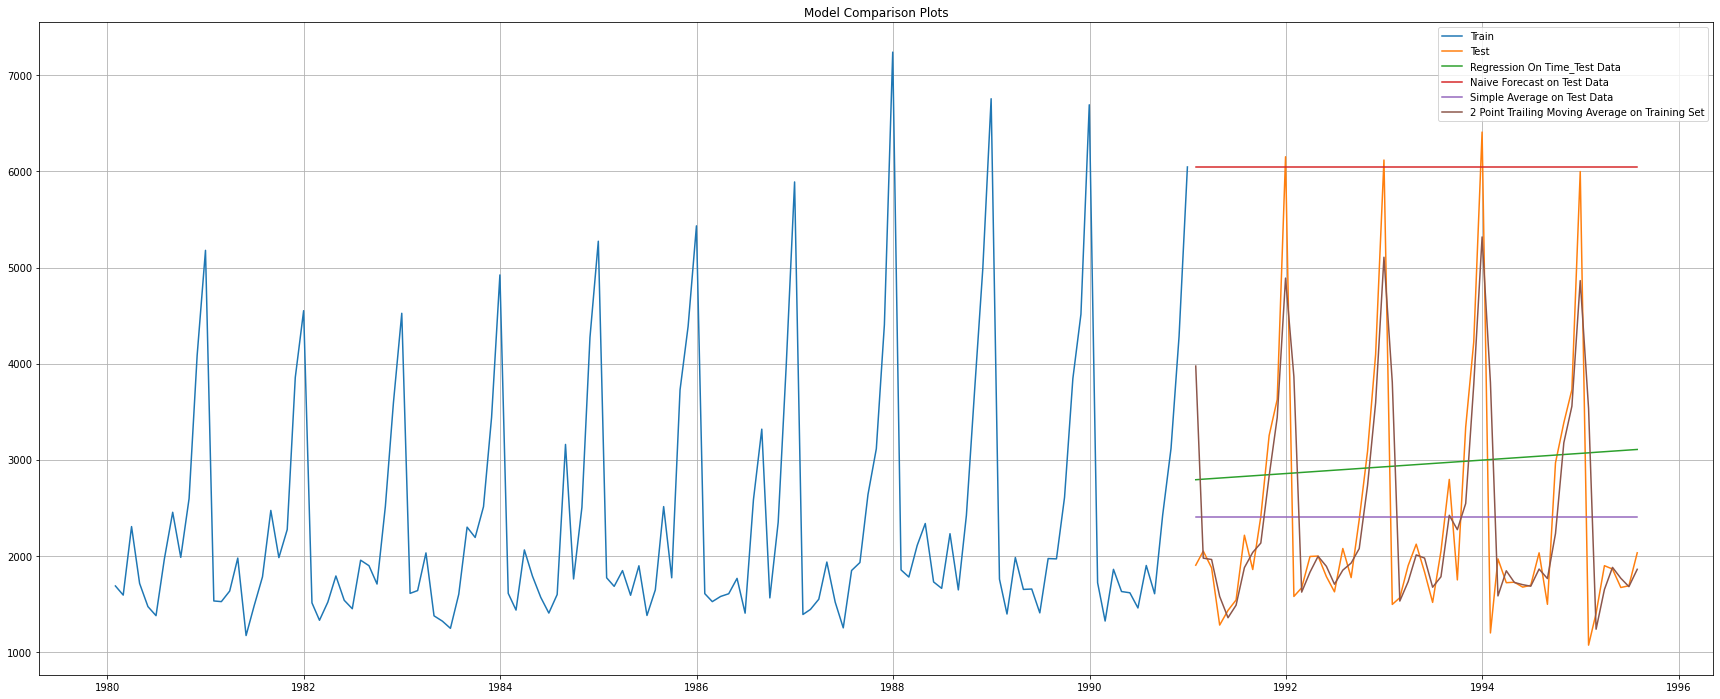

In [116]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

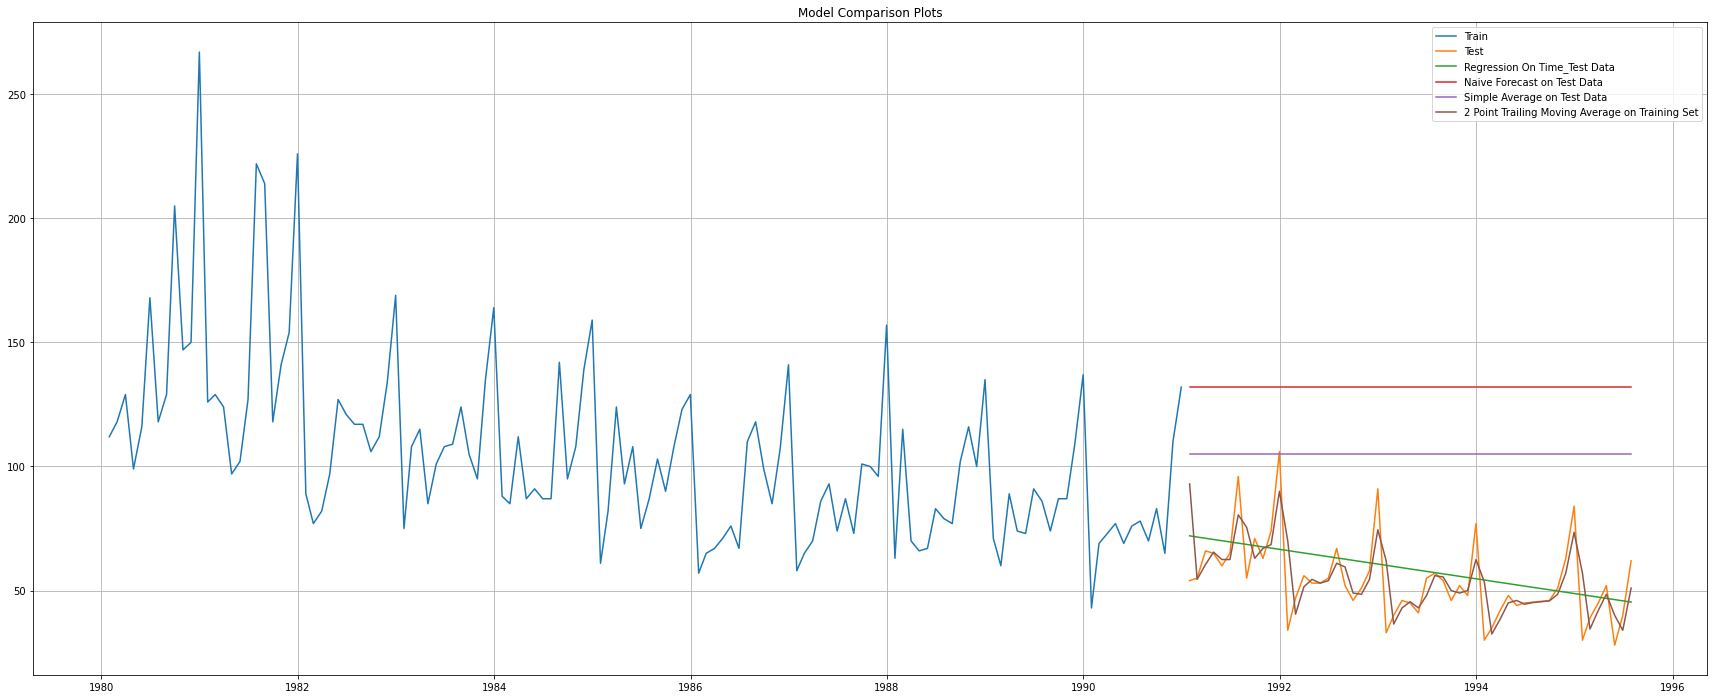

In [117]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(LinearRegression_rtest['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_rtest['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_rtest['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_rtest['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Method 5: Simple Exponential Smoothing

In [118]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [119]:
SES_train = train.copy()
SES_test = test.copy()

In [120]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [121]:
model_SES_autofit = model_SES.fit(optimized=True)

In [122]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 2403.7828696439005,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.0,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [123]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling     predict
Time_Stamp                       
1991-01-31       1902  2403.78287
1991-02-28       2049  2403.78287
1991-03-31       1874  2403.78287
1991-04-30       1279  2403.78287
1991-05-31       1432  2403.78287

In [124]:
len(test)

55

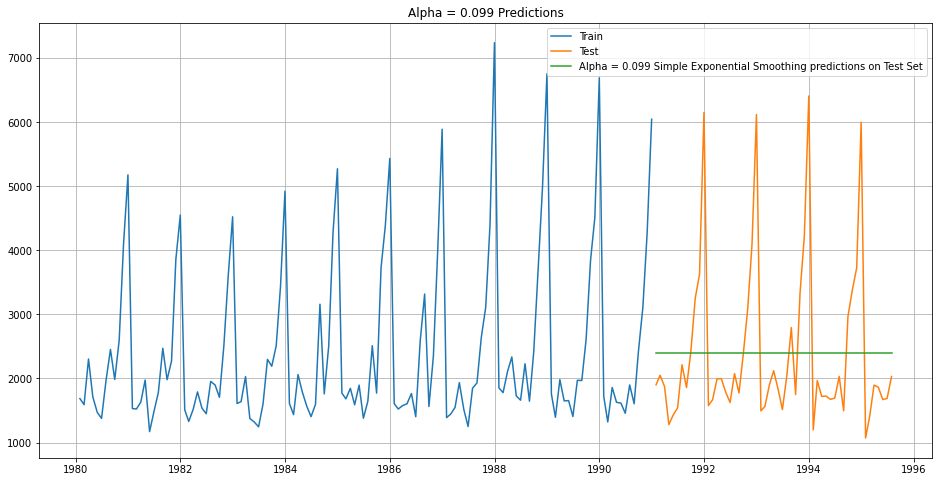

In [125]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha = 0.099 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.099 Predictions');

## Model Evaluation for  𝛼  = 0.099: Simple Exponential Smoothing

In [126]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha = 0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha = 0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1275.082


# Rose

In [127]:
SES_rtrain = rtrain.copy()
SES_rtest = rtest.copy()

In [128]:
model_SES = SimpleExpSmoothing(SES_rtrain['Rose'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [129]:
model_SES_autofit = model_SES.fit(optimized=True)

In [130]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 134.38712015111975,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.09875003987520162,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [131]:
SES_rtest['predict'] = model_SES_autofit.forecast(steps=len(rtest))
SES_rtest.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.105003
1991-02-28  55.0  87.105003
1991-03-31  66.0  87.105003
1991-04-30  65.0  87.105003
1991-05-31  60.0  87.105003

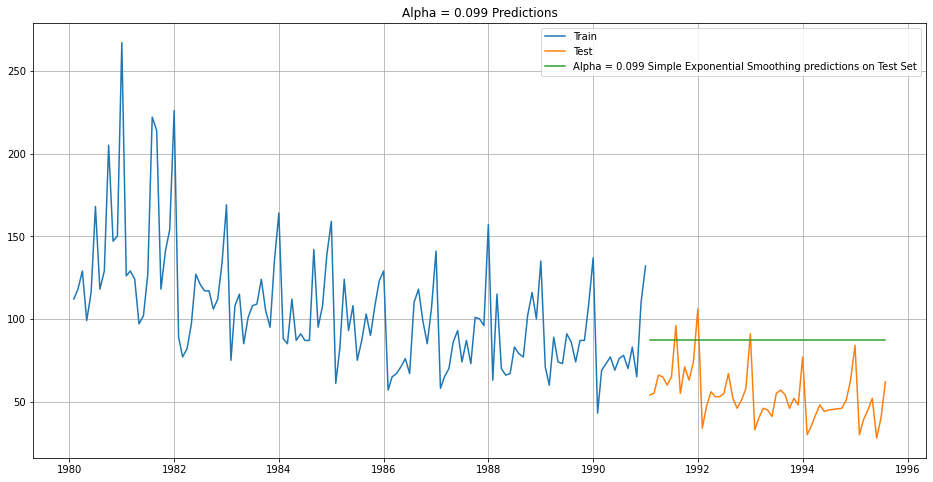

In [132]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_rtrain['Rose'], label='Train')
plt.plot(SES_rtest['Rose'], label='Test')

plt.plot(SES_rtest['predict'], label='Alpha = 0.099 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.099 Predictions');

In [133]:
## Test Data

rmse_model5_rtest_1 = metrics.mean_squared_error(SES_rtest['Rose'],SES_rtest['predict'],squared=False)
print("For Alpha = 0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_rtest_1))


For Alpha = 0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [134]:
resultsDf_5 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model5_test_1], 'Test RMSE Rose ': [rmse_model5_rtest_1]},index=['Alpha=0.099,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE Sparkling  Test RMSE Rose 
RegressionOnTime                                1389.135175        15.268955
NaiveModel                                      3864.279352        79.718773
SimpleAverageModel                              1275.081804        53.460570
2pointTrailingMovingAverage                      813.400684        11.529278
4pointTrailingMovingAverage                     1156.589694        14.451403
6pointTrailingMovingAverage                     1283.927428        14.566327
9pointTrailingMovingAverage                     1346.278315        14.727630
Alpha=0.099,SimpleExponentialSmoothing          1275.081813        36.796246

Setting different alpha values.

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [135]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE Sparkling':[],'Test RMSE Sparkling': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE Sparkling, Test RMSE Sparkling]
Index: []

In [136]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)

    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)

    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE Sparkling':rmse_model5_train_i 
                                      ,'Test RMSE Sparkling':rmse_model5_test_i }, ignore_index=True)

# Model Evaluation

In [137]:
resultsDf_6.sort_values(by=['Test RMSE Sparkling', ],ascending=True)

Alpha Values  Train RMSE Sparkling  Test RMSE Sparkling
6           0.9           2638.989894          2603.403036
5           0.8           2639.223515          2606.403808
4           0.7           2639.458642          2610.048513
3           0.6           2639.711514          2614.292019
2           0.5           2640.000703          2619.102719
1           0.4           2640.329808          2624.446744
0           0.3           2640.644915          2630.209867

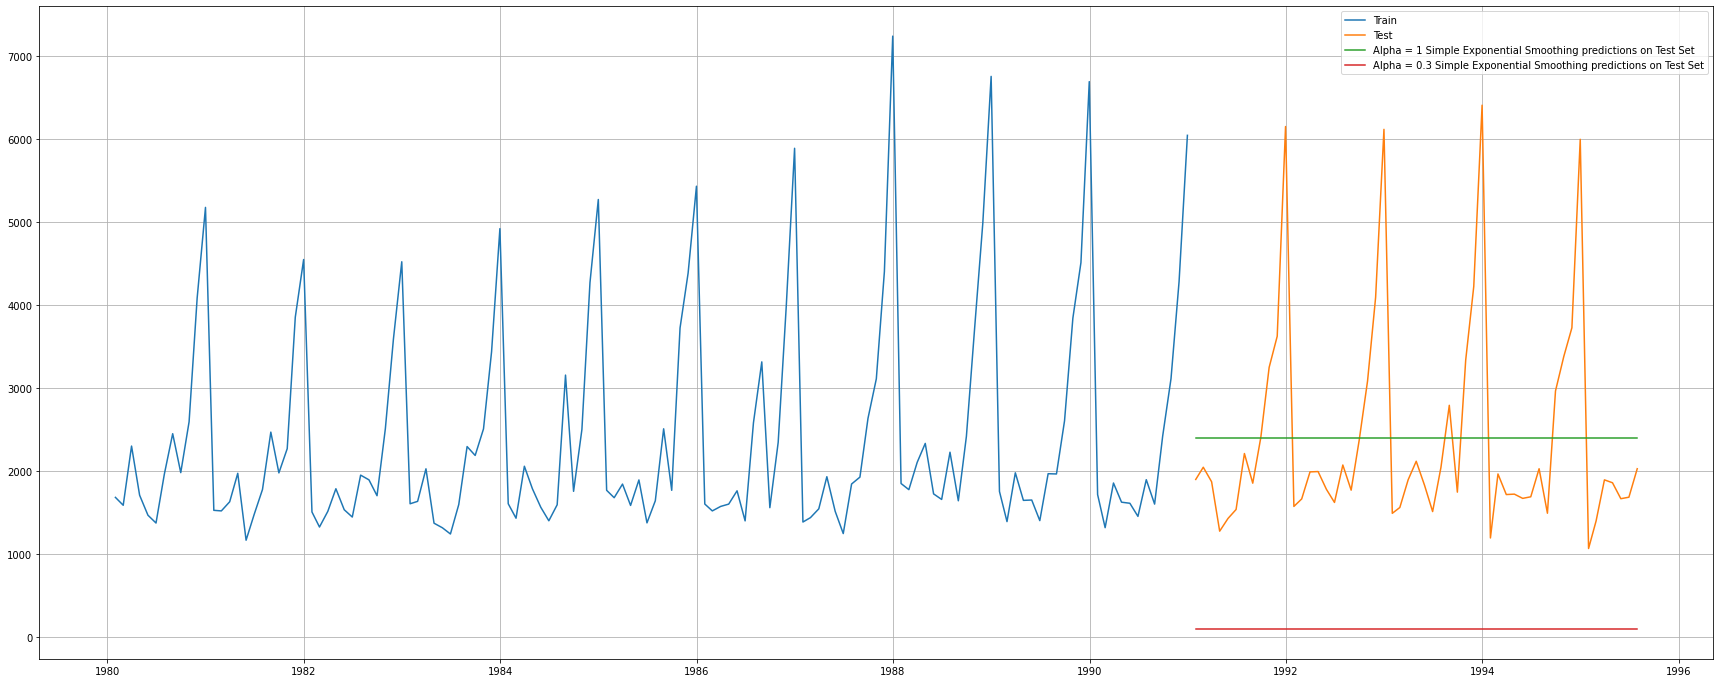

In [138]:
## Plotting on both the Training and Test data

plt.figure(figsize=(30,12))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha = 1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha = 0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

# Rose

In [139]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6r = pd.DataFrame({'Alpha Values':[],'Train RMSE Rose ':[],'Test RMSE Rose': []})
resultsDf_6r

Empty DataFrame
Columns: [Alpha Values, Train RMSE Rose , Test RMSE Rose]
Index: []

In [140]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_rtrain['predict',i] = model_SES_alpha_i.fittedvalues
    SES_rtest['predict',i] = model_SES_alpha_i.forecast(steps=55)
    

    rmse_model5_rtrain_i = metrics.mean_squared_error(SES_rtrain['Rose'],SES_rtrain['predict',i],squared=False)
    
    rmse_model5_rtest_i = metrics.mean_squared_error(SES_rtest['Rose'],SES_rtest['predict',i],squared=False)
    
    resultsDf_6r = resultsDf_6r.append({'Alpha Values':i,'Train RMSE Rose ': rmse_model5_rtrain_i,'Test RMSE Rose': rmse_model5_rtest_i }, ignore_index=True)

# Model Evaluation

In [141]:
resultsDf_6r.sort_values(by=['Test RMSE Rose', ],ascending=True)

Alpha Values  Train RMSE Rose   Test RMSE Rose
0           0.3         32.470164       47.504821
1           0.4         33.035130       53.767406
2           0.5         33.682839       59.641786
3           0.6         34.441171       64.971288
4           0.7         35.323261       69.698162
5           0.8         36.334596       73.773992
6           0.9         37.482782       77.139276

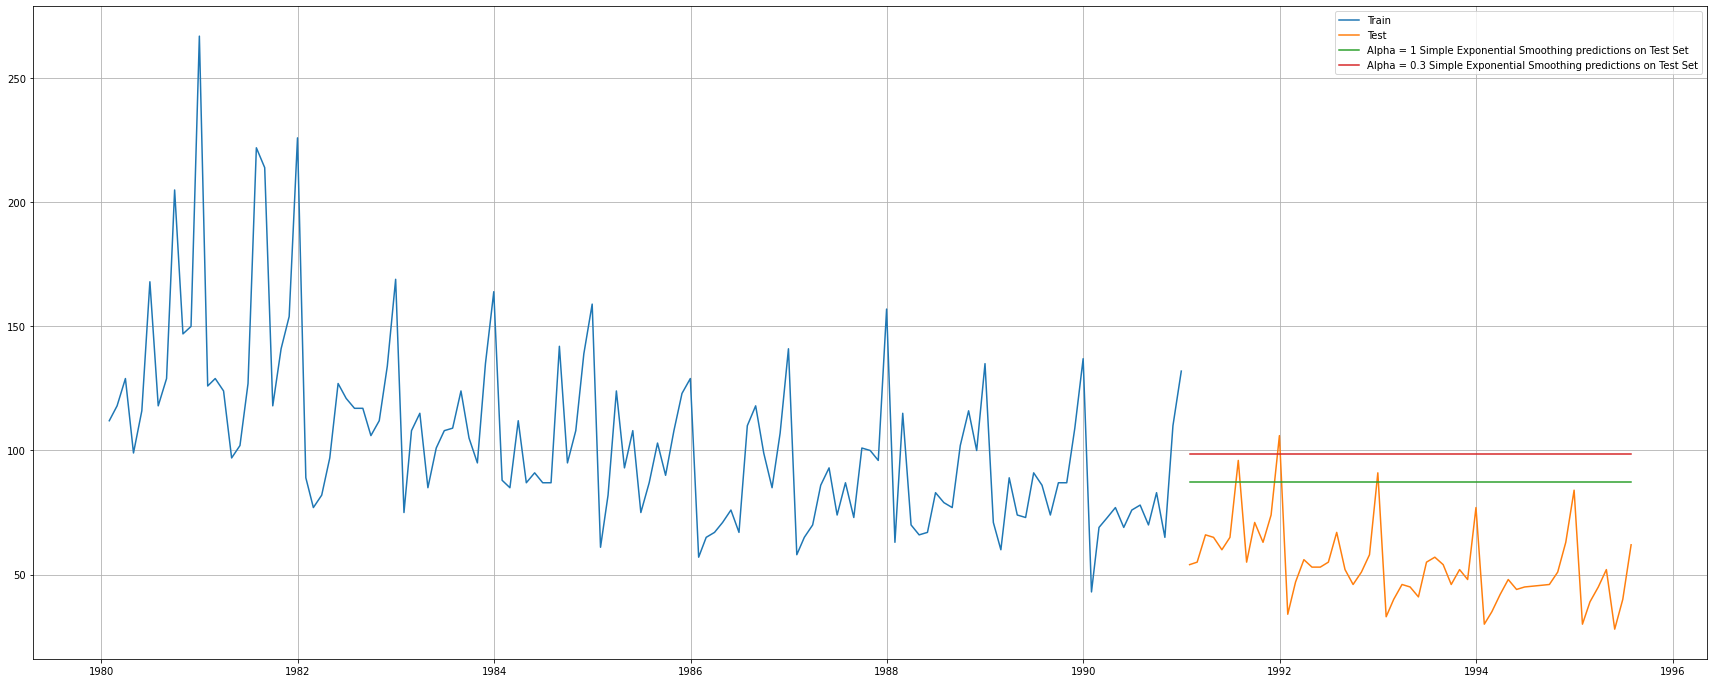

In [142]:
## Plotting on both the Training and Test data

plt.figure(figsize=(30,12))
plt.plot(SES_rtrain['Rose'], label='Train')
plt.plot(SES_rtest['Rose'], label='Test')

plt.plot(SES_rtest['predict'], label='Alpha = 1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_rtest['predict', 0.3], label='Alpha = 0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [143]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE Sparkling': [resultsDf_6.sort_values(by=['Test RMSE Sparkling'],ascending=True).values[0][2]], 'Test RMSE Rose ': [resultsDf_6r.sort_values(by=['Test RMSE Rose'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE Sparkling  Test RMSE Rose 
RegressionOnTime                                1389.135175        15.268955
NaiveModel                                      3864.279352        79.718773
SimpleAverageModel                              1275.081804        53.460570
2pointTrailingMovingAverage                      813.400684        11.529278
4pointTrailingMovingAverage                     1156.589694        14.451403
6pointTrailingMovingAverage                     1283.927428        14.566327
9pointTrailingMovingAverage                     1346.278315        14.727630
Alpha=0.099,SimpleExponentialSmoothing          1275.081813        36.796246
Alpha=0.3,SimpleExponentialSmoothing            2603.403036        47.504821

# Method 6: Double Exponential Smoothing (Holt's Model)

In [144]:
DES_train = train.copy()
DES_test = test.copy()

In [145]:
model_DES = Holt(DES_train['Sparkling'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [146]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE Sparkling':[],'Test RMSE Sparkling': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE Sparkling, Test RMSE Sparkling]
Index: []

In [147]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True) #smoothing_trend changed to smoothing slope
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE Sparkling':rmse_model6_train
                                          ,'Test RMSE Sparkling':rmse_model6_test}, ignore_index=True)

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [148]:
resultsDf_7.sort_values(by=['Test RMSE Sparkling']).head()

Alpha Values  Beta Values  Train RMSE Sparkling  Test RMSE Sparkling
0            0.3          0.3           1592.292788         18259.110704
8            0.4          0.3           1569.338606         23878.496940
1            0.3          0.4           1682.573828         26069.841401
16           0.5          0.3           1530.575845         27095.532414
24           0.6          0.3           1506.449870         29070.722592

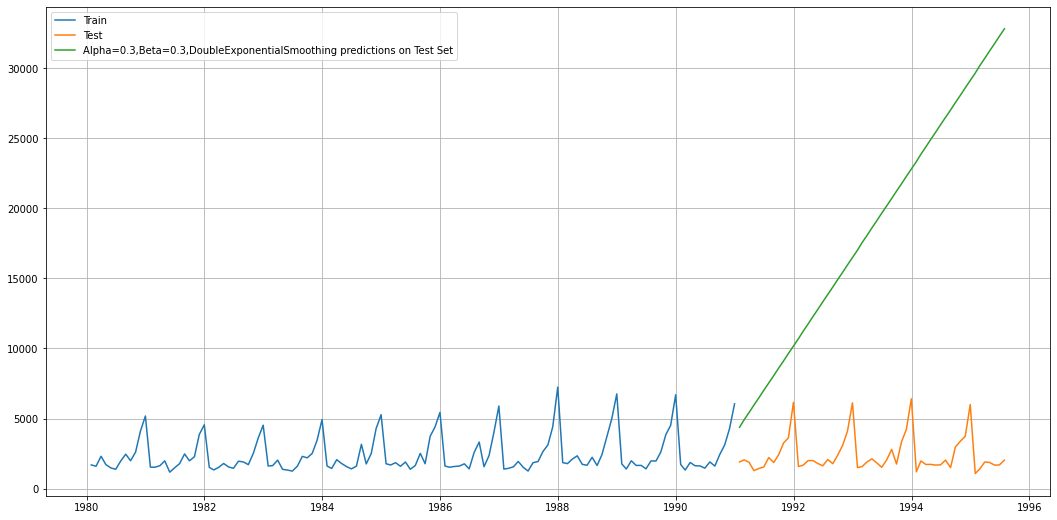

In [149]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

# Rose

In [150]:
DES_rtrain = rtrain.copy()
DES_rtest = rtest.copy()

In [151]:
model_DES = Holt(DES_rtrain['Rose'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [152]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7r = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE Rose':[],'Test RMSE Rose': []})
resultsDf_7r

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE Rose, Test RMSE Rose]
Index: []

In [153]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True) #smoothing_trend changed to smoothing slope
        DES_rtrain['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_rtest['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_rtrain = metrics.mean_squared_error(DES_rtrain['Rose'],DES_rtrain['predict',i,j],squared=False)
        
        rmse_model6_rtest = metrics.mean_squared_error(DES_rtest['Rose'],DES_rtest['predict',i,j],squared=False)
        
        resultsDf_7r = resultsDf_7r.append({'Alpha Values':i,'Beta Values':j,'Train RMSE Rose':rmse_model6_rtrain
                                          ,'Test RMSE Rose':rmse_model6_rtest}, ignore_index=True)

In [154]:
resultsDf_7r.sort_values(by=['Test RMSE Rose']).head()

Alpha Values  Beta Values  Train RMSE Rose  Test RMSE Rose
0            0.3          0.3        35.944983      265.567594
8            0.4          0.3        36.749123      339.306534
1            0.3          0.4        37.393239      358.750942
16           0.5          0.3        37.433314      394.272629
24           0.6          0.3        38.348984      439.296033

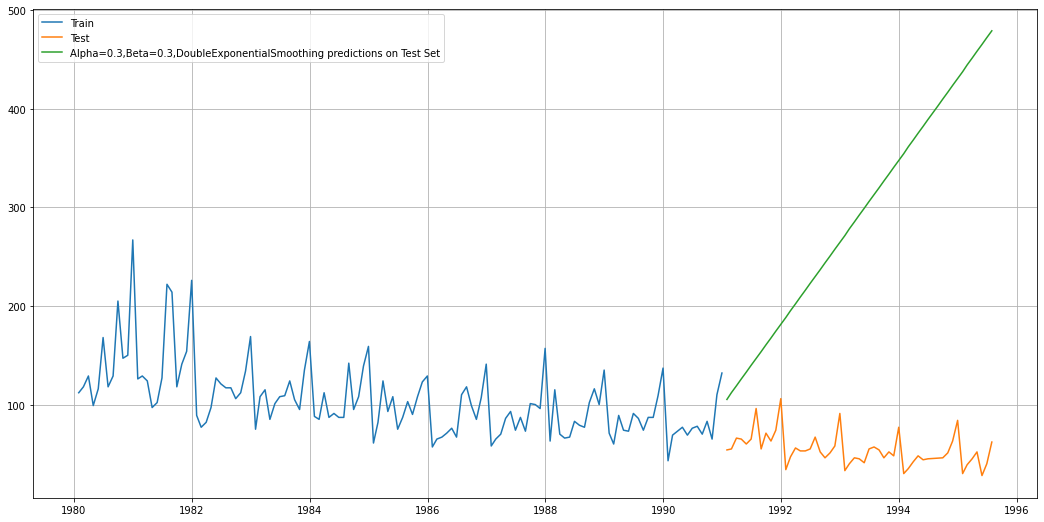

In [155]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_rtrain['Rose'], label='Train')
plt.plot(DES_rtest['Rose'], label='Test')

plt.plot(DES_rtest['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [156]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE Sparkling': [resultsDf_7.sort_values(by=['Test RMSE Sparkling']).values[0][3]],'Test RMSE Rose ': [resultsDf_7r.sort_values(by=['Test RMSE Rose']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE Sparkling  Test RMSE Rose 
RegressionOnTime                                       1389.135175        15.268955
NaiveModel                                             3864.279352        79.718773
SimpleAverageModel                                     1275.081804        53.460570
2pointTrailingMovingAverage                             813.400684        11.529278
4pointTrailingMovingAverage                            1156.589694        14.451403
6pointTrailingMovingAverage                            1283.927428        14.566327
9pointTrailingMovingAverage                            1346.278315        14.727630
Alpha=0.099,SimpleExponentialSmoothing                 1275.081813        36.796246
Alpha=0.3,SimpleExponentialSmoothing                   2603.403036        47.504821
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing         18259.110704       265.567594

# Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model

In [157]:
TES_train = train.copy()
TES_test = test.copy()

In [158]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [159]:
model_TES_autofit = model_TES.fit()

In [160]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 1639.9993399027126,
 'initial_seasons': array([1.00841739, 0.96899632, 1.24171643, 1.13206069, 0.93984119,
        0.93813873, 1.22454059, 1.54419134, 1.27332629, 1.63190096,
        2.4826116 , 3.11820572]),
 'initial_slope': 4.884660841988308,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.15443784802011637,
 'smoothing_seasonal': 0.37116865308973673,
 'smoothing_slope': 7.4133171248060435e-28,
 'use_boxcox': False}

In [161]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1602.230902
1991-02-28       2049   1374.018912
1991-03-31       1874   1807.607439
1991-04-30       1279   1704.811690
1991-05-31       1432   1602.617906

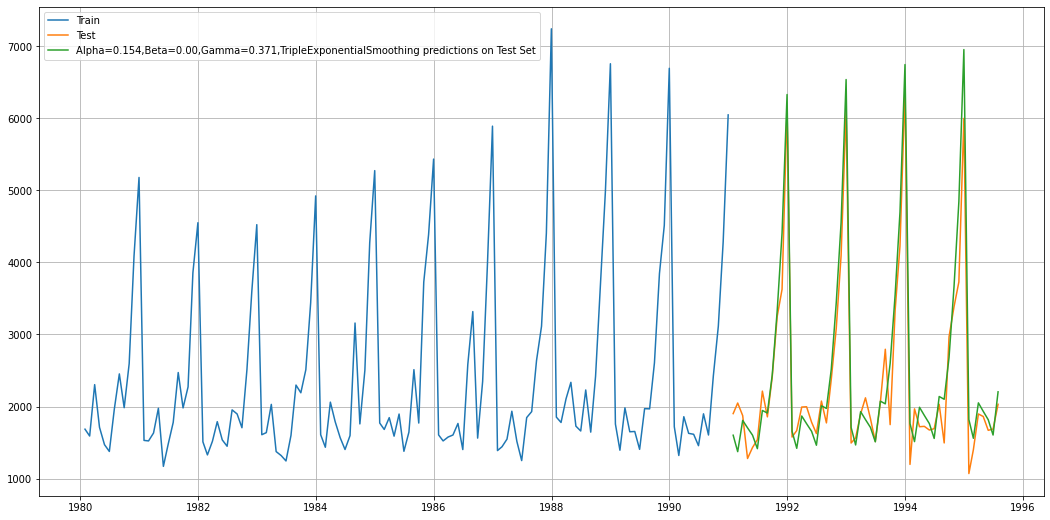

In [162]:
# Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.154,Beta=0.00,Gamma=0.371,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [163]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.154,Beta=0.00,Gamma=0.371, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.154,Beta=0.00,Gamma=0.371, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 384.198


# Rose

In [164]:
TES_rtrain = rtrain.copy()
TES_rtest = rtest.copy()

In [165]:
model_TESr = ExponentialSmoothing(TES_rtrain['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [166]:
model_TESr_autofit = model_TESr.fit()

In [167]:
model_TESr_autofit.params

{'damping_slope': nan,
 'initial_level': 76.65565186546128,
 'initial_seasons': array([1.47550231, 1.65927093, 1.80572588, 1.58888782, 1.77822665,
        1.92604314, 2.11649409, 2.25135146, 2.11690519, 2.08112772,
        2.40927212, 3.30448044]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.10609635974778751,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.048438458440198374,
 'use_boxcox': False}

In [168]:
## Prediction on the test data

TES_rtest['auto_predict'] = model_TESr_autofit.forecast(steps=len(rtest))
TES_rtest.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     56.674338
1991-02-28  55.0     63.471271
1991-03-31  66.0     68.788789
1991-04-30  65.0     60.277826
1991-05-31  60.0     67.180381

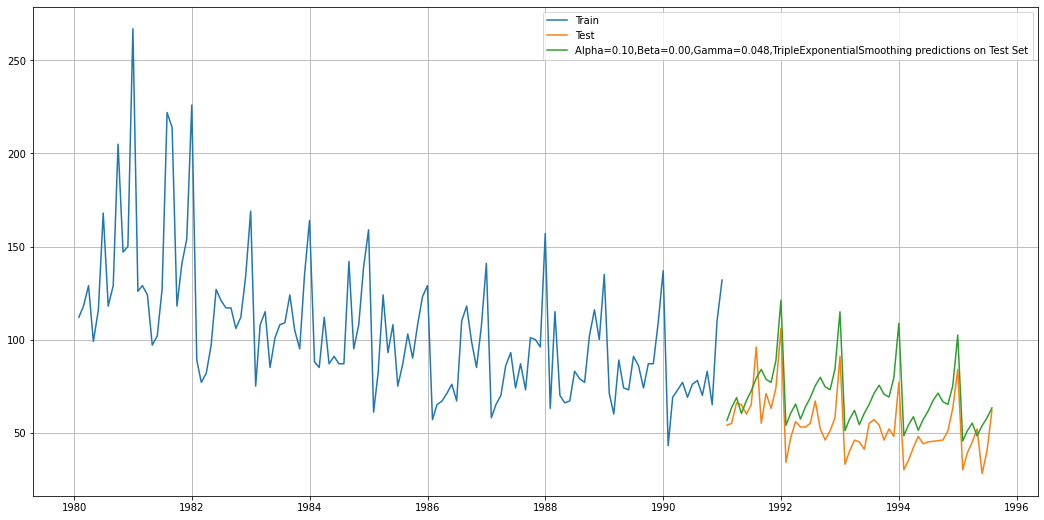

In [169]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_rtrain['Rose'], label='Train')
plt.plot(TES_rtest['Rose'], label='Test')

plt.plot(TES_rtest['auto_predict'], label='Alpha=0.10,Beta=0.00,Gamma=0.048,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [170]:
## Test Data

rmse_model6_rtest_1 = metrics.mean_squared_error(TES_rtest['Rose'],TES_rtest['auto_predict'],squared=False)
print("For Alpha=0.10,Beta=0.00,Gamma=0.048, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_rtest_1))

For Alpha=0.10,Beta=0.00,Gamma=0.048, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.369


In [171]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model6_test_1], 'Test RMSE Rose ': [rmse_model6_rtest_1]}
                           ,index=['Alpha=0.10,Beta=0.00,Gamma=0.371/0.048,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE Sparkling  Test RMSE Rose 
RegressionOnTime                                            1389.135175        15.268955
NaiveModel                                                  3864.279352        79.718773
SimpleAverageModel                                          1275.081804        53.460570
2pointTrailingMovingAverage                                  813.400684        11.529278
4pointTrailingMovingAverage                                 1156.589694        14.451403
6pointTrailingMovingAverage                                 1283.927428        14.566327
9pointTrailingMovingAverage                                 1346.278315        14.727630
Alpha=0.099,SimpleExponentialSmoothing                      1275.081813        36.796246
Alpha=0.3,SimpleExponentialSmoothing                        2603.403036        47.504821
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing              18259.110704       265.567594
Alpha=0.10,Beta=0.00,Gamma=0.371/0.048,TripleEx...           384.197750        17.369488

In [172]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE Sparkling':[],'Test RMSE Sparkling': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE Sparkling, Test RMSE Sparkling]
Index: []

In [173]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE Sparkling':rmse_model8_train,'Test RMSE Sparkling':rmse_model8_test}
                                                 , ignore_index=True)

In [174]:
resultsDf_8_2.sort_values(by=['Test RMSE Sparkling']).head()

Alpha Values  Beta Values  ...  Train RMSE Sparkling  Test RMSE Sparkling
0             0.3          0.3  ...            404.513320           392.786198
8             0.3          0.4  ...            424.828055           410.854547
65            0.4          0.3  ...            435.553595           421.409170
296           0.7          0.8  ...            700.317756           518.188752
130           0.5          0.3  ...            498.239915           542.175497

[5 rows x 5 columns]

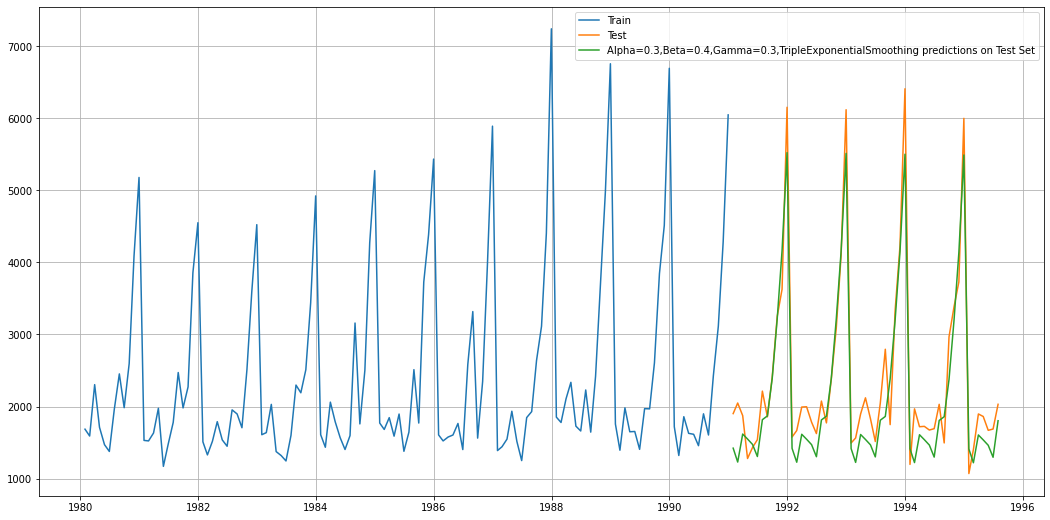

In [175]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

# Rose

In [176]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2r = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE Rose':[],'Test RMSE Rose': []})
resultsDf_8_2r

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE Rose, Test RMSE Rose]
Index: []

In [177]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TESr.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_rtrain['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_rtest['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_rtrain = metrics.mean_squared_error(TES_rtrain['Rose'],TES_rtrain['predict',i,j,k],squared=False)
            
            rmse_model8_rtest = metrics.mean_squared_error(TES_rtest['Rose'],TES_rtest['predict',i,j,k],squared=False)
            
            resultsDf_8_2r = resultsDf_8_2r.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE Rose':rmse_model8_rtrain,'Test RMSE Rose':rmse_model8_rtest}
                                                 , ignore_index=True)

In [178]:
resultsDf_8_2r.sort_values(by=['Test RMSE Rose']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE Rose  Test RMSE Rose
8             0.3          0.4           0.3        28.111886       10.945435
1             0.3          0.3           0.4        27.399095       11.201633
69            0.4          0.3           0.8        32.601491       12.615607
16            0.3          0.5           0.3        29.087520       14.414604
131           0.5          0.3           0.6        32.144773       16.720720

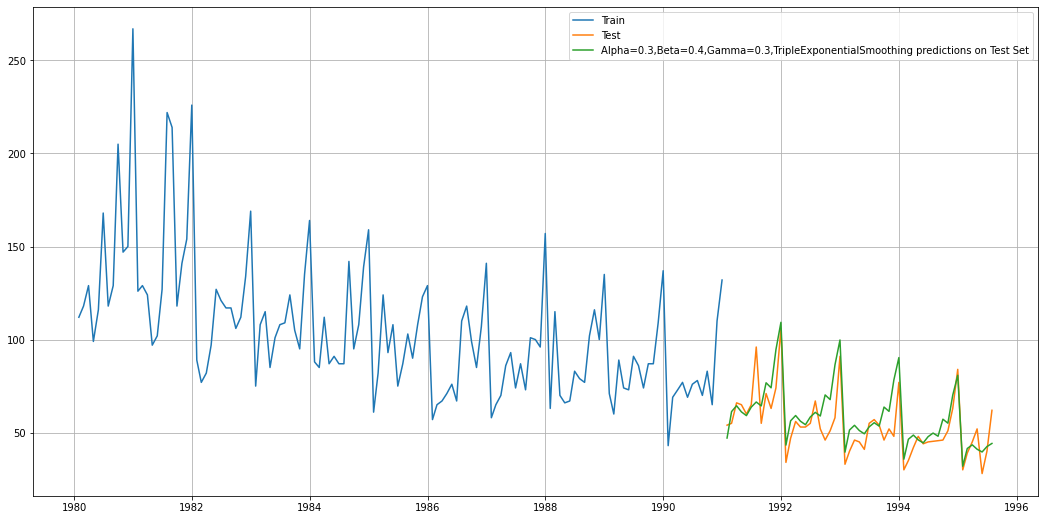

In [179]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_rtrain['Rose'], label='Train')
plt.plot(TES_rtest['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_rtest['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [180]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE Sparkling': [resultsDf_8_2.sort_values(by=['Test RMSE Sparkling']).values[0][4]],'Test RMSE Rose ': [resultsDf_8_2r.sort_values(by=['Test RMSE Rose']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3/0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE Sparkling  Test RMSE Rose 
RegressionOnTime                                            1389.135175        15.268955
NaiveModel                                                  3864.279352        79.718773
SimpleAverageModel                                          1275.081804        53.460570
2pointTrailingMovingAverage                                  813.400684        11.529278
4pointTrailingMovingAverage                                 1156.589694        14.451403
6pointTrailingMovingAverage                                 1283.927428        14.566327
9pointTrailingMovingAverage                                 1346.278315        14.727630
Alpha=0.099,SimpleExponentialSmoothing                      1275.081813        36.796246
Alpha=0.3,SimpleExponentialSmoothing                        2603.403036        47.504821
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing              18259.110704       265.567594
Alpha=0.10,Beta=0.00,Gamma=0.371/0.048,TripleEx...           384.197750        17.369488
Alpha=0.3,Beta=0.3/0.4,Gamma=0.3,TripleExponent...           392.786198        10.945435

In [181]:

resultSparkling=resultsDf.sort_values(by=['Test RMSE Sparkling'])
resultSparkling=resultSparkling.drop(["Test RMSE Rose "],axis=1)


In [182]:
print('Sorted by RMSE values on the Test Data Sparkling:','\n',)
resultSparkling

Sorted by RMSE values on the Test Data Sparkling: 



Test RMSE Sparkling
Alpha=0.10,Beta=0.00,Gamma=0.371/0.048,TripleEx...           384.197750
Alpha=0.3,Beta=0.3/0.4,Gamma=0.3,TripleExponent...           392.786198
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
SimpleAverageModel                                          1275.081804
Alpha=0.099,SimpleExponentialSmoothing                      1275.081813
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
RegressionOnTime                                            1389.135175
Alpha=0.3,SimpleExponentialSmoothing                        2603.403036
NaiveModel                                                  3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing              18259.110704

In [183]:
resultRose=resultsDf.sort_values(by=['Test RMSE Rose '])
resultRose=resultRose.drop(["Test RMSE Sparkling"],axis=1)

In [184]:
print('Sorted by RMSE values on the Test Data Rose:','\n',)
resultRose

Sorted by RMSE values on the Test Data Rose: 



Test RMSE Rose 
Alpha=0.3,Beta=0.3/0.4,Gamma=0.3,TripleExponent...        10.945435
2pointTrailingMovingAverage                               11.529278
4pointTrailingMovingAverage                               14.451403
6pointTrailingMovingAverage                               14.566327
9pointTrailingMovingAverage                               14.727630
RegressionOnTime                                          15.268955
Alpha=0.10,Beta=0.00,Gamma=0.371/0.048,TripleEx...        17.369488
Alpha=0.099,SimpleExponentialSmoothing                    36.796246
Alpha=0.3,SimpleExponentialSmoothing                      47.504821
SimpleAverageModel                                        53.460570
NaiveModel                                                79.718773
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing            265.567594

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

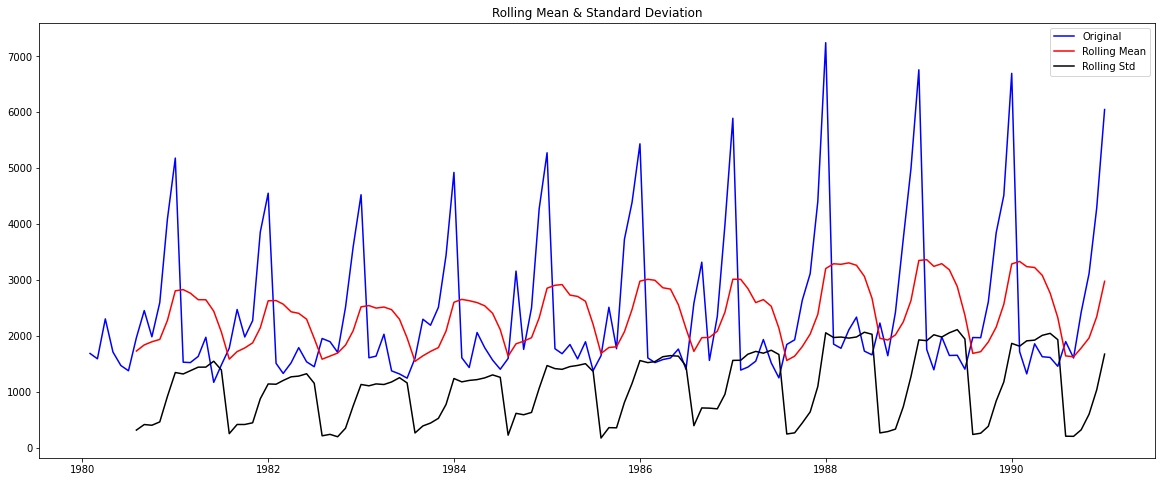

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [185]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at  𝛼  = 0.05.

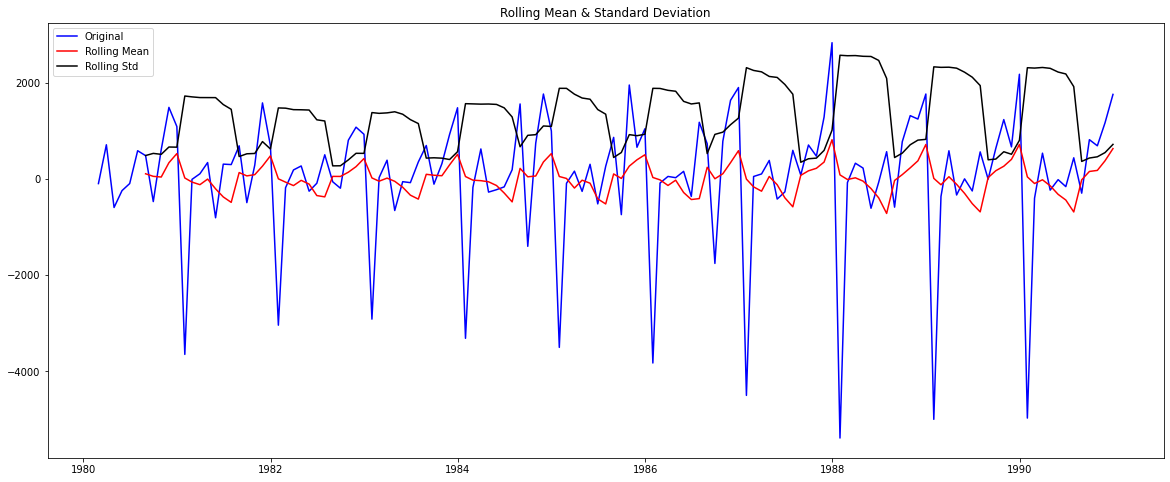

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [186]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

<b> Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.


# Rose 

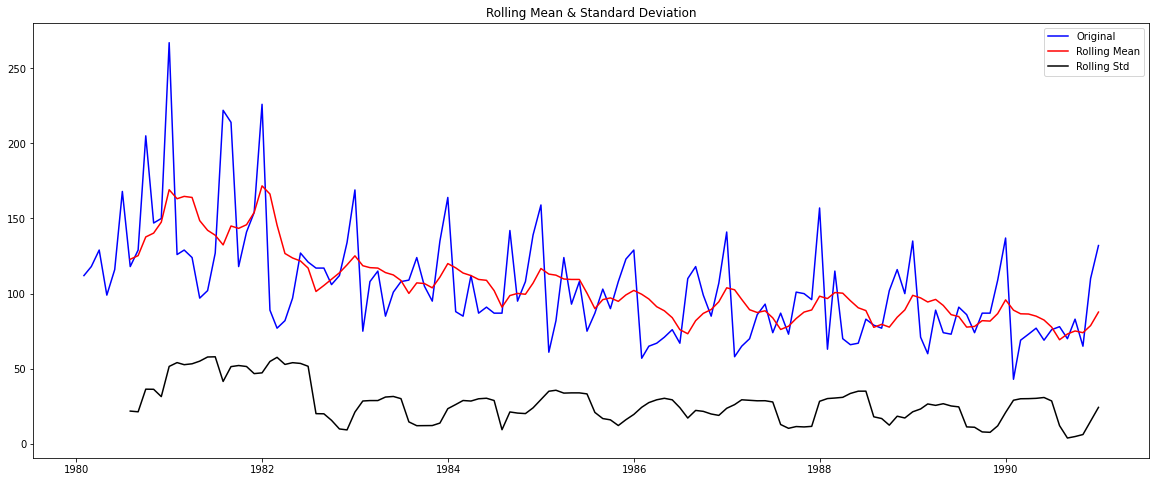

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [187]:
test_stationarity(rtrain['Rose'])

We see that the series is not stationary at 𝛼 = 0.05.

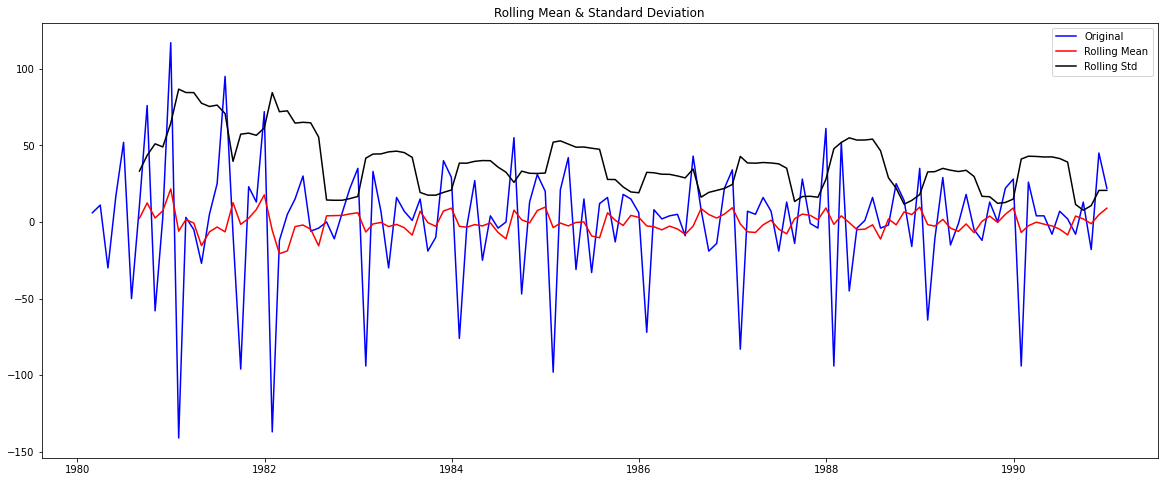

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [188]:
test_stationarity(rtrain['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# ARIMA

## Sparkling

In [189]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [190]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [191]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436793315
ARIMA(0, 1, 2) - AIC:2232.783097684156
ARIMA(1, 1, 0) - AIC:2268.5280608424086
ARIMA(1, 1, 1) - AIC:2235.0139453505435
ARIMA(1, 1, 2) - AIC:2233.5976471194977
ARIMA(2, 1, 0) - AIC:2262.0356000662723
ARIMA(2, 1, 1) - AIC:2232.3604898821764
ARIMA(2, 1, 2) - AIC:2210.6175078805536


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [192]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)


param          AIC
8  (2, 1, 2)  2210.617508
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [193]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.577
Date:                Thu, 12 Aug 2021   AIC                           2210.618
Time:                        15:20:28   BIC                           2227.869
Sample:                    02-29-1980   HQIC                          2217.627
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5859      0.516     10.820      0.000       4.574       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Predict on the Test Set using this model and evaluate the model.

In [194]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

forecast Returns

forecast : array Array of out of sample forecasts

stderr : array Array of the standard error of the forecasts.

conf_int : array 2d array of the confidence interval for the forecast

In [195]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.6964952596556


In [196]:
results = pd.DataFrame({'Test RMSE Sparkling': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

results

Test RMSE Sparkling
ARIMA(2,1,2)          1374.696495

# Rose

In [197]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))
    

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [198]:
# Creating an empty Dataframe with column names only
ARIMA_AICr = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AICr

Empty DataFrame
Columns: [param, AIC]
Index: []

In [199]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_modelr = ARIMA(rtrain['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_modelr.aic))
    ARIMA_AICr = ARIMA_AICr.append({'param':param, 'AIC': ARIMA_modelr.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046564
ARIMA(0, 1, 2) - AIC:1276.8353729386477
ARIMA(1, 1, 0) - AIC:1319.3483105801952
ARIMA(1, 1, 1) - AIC:1277.775748828637
ARIMA(1, 1, 2) - AIC:1277.359225420591
ARIMA(2, 1, 0) - AIC:1300.6092611744152
ARIMA(2, 1, 1) - AIC:1279.0456894093104
ARIMA(2, 1, 2) - AIC:1279.2986939365014


In [200]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AICr.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359225
4  (1, 1, 1)  1277.775749
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [201]:
auto_ARIMAr = ARIMA(rtrain['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMAr = auto_ARIMAr.fit()

print(results_auto_ARIMAr.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Thu, 12 Aug 2021   AIC                           1276.835
Time:                        15:20:29   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

# Predict on the Test Set using this model and evaluate the model.

In [202]:
predicted_auto_ARIMAr = results_auto_ARIMAr.forecast(steps=len(rtest))

In [203]:
from sklearn.metrics import  mean_squared_error
rmseR = mean_squared_error(rtest['Rose'],predicted_auto_ARIMAr[0],squared=False)
print(rmseR)

15.618093478883777


In [204]:
resultsR = pd.DataFrame({'Test RMSE Rose ': [rmseR]}
                           ,index=['ARIMA(0,1,2)'])

resultsR

Test RMSE Rose 
ARIMA(0,1,2)        15.618093

# SARIMA

# Sparkling

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

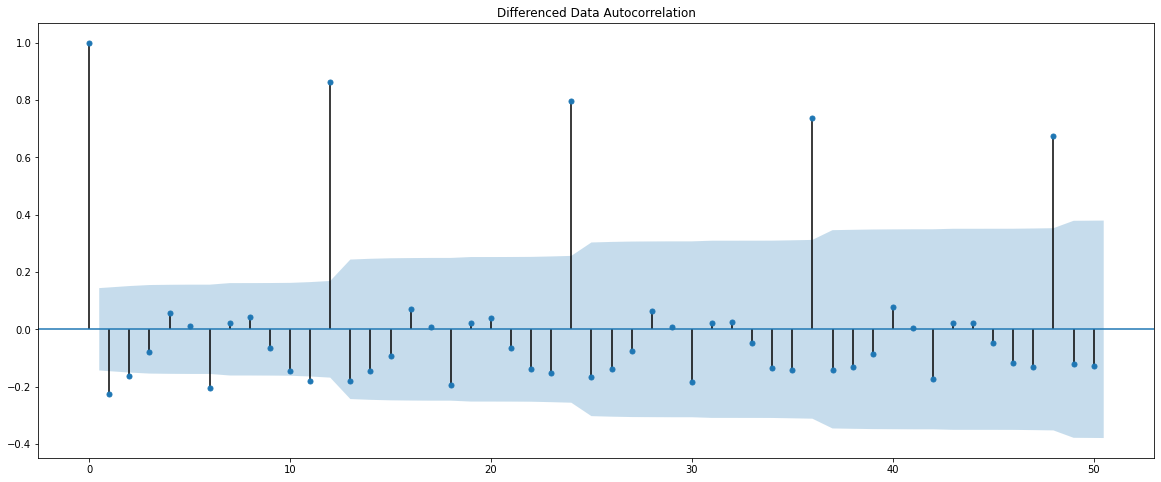

In [205]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

## Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [206]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [207]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [208]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890287
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442614
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360121491463
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510361


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565657
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.187633954419
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242877805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298135003
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274098868
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510476081
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933228334
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6473510496767
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.4410101687054
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215947
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151461918766
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689234554
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.411127951319
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6963213440883
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079048694
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6190985822086
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:

In [209]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.670865
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888803
80  (2, 1, 2)  (2, 0, 2, 6)  1729.168821
17  (0, 1, 1)  (2, 0, 2, 6)  1741.647351
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379778

In [210]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Thu, 12 Aug 2021   AIC                           1727.671
Time:                                   15:21:02   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6452      0.286     -2.257      0.024      -1.206      -0.085
ma.L1         -0.3354      0.227     -1.475

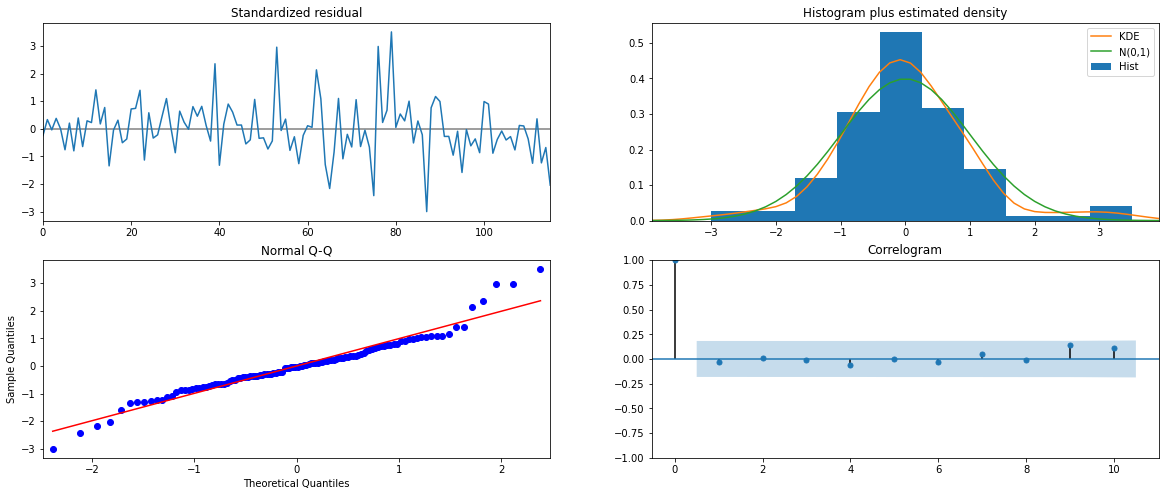

In [211]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

# Predict on the Test Set using this model and evaluate the model.

In [212]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [213]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.326488  380.550383     584.461443    2076.191533
1  1177.284658  392.096929     408.788799    1945.780517
2  1625.817661  392.291678     856.940101    2394.695220
3  1546.378258  397.695451     766.909497    2325.847019
4  1308.665762  398.914875     526.806973    2090.524550

In [214]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.8922438846313


In [215]:
temp_resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


results = pd.concat([results,temp_resultsDf])

results

Test RMSE Sparkling
ARIMA(2,1,2)                    1374.696495
SARIMA(1,1,2)(2,0,2,6)           626.892244

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

# Rose

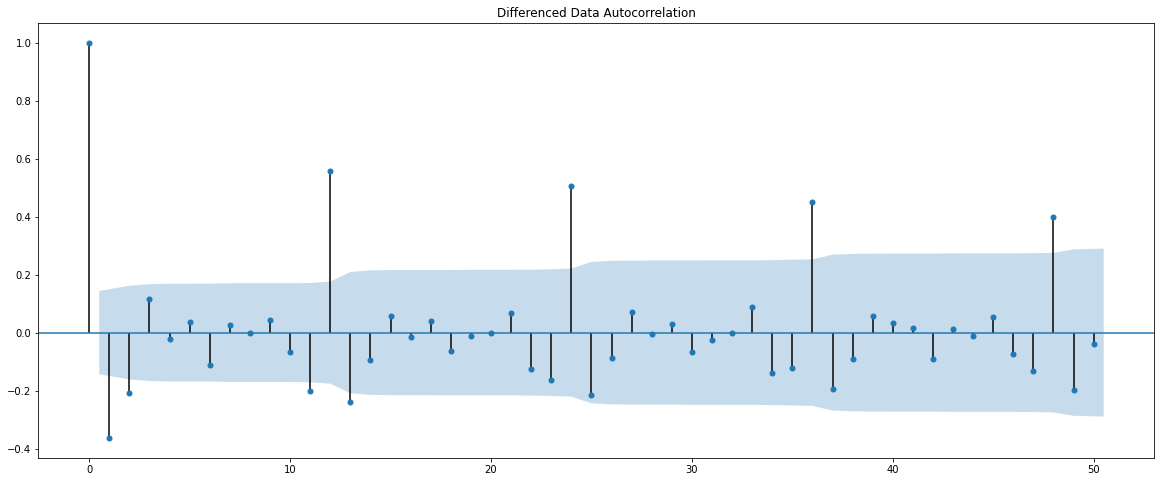

In [216]:
plot_acf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [217]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdqR = list(itertools.product(p, d, q))
model_pdqR = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(model_pdqR)):
    print('Model: {}{}'.format(pdqR[i], model_pdqR[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [218]:
SARIMA_AICr = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AICr


Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [219]:
import statsmodels.api as sm

for param in pdqR:
    for param_seasonal in model_pdqR:
        SARIMA_modelr = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAr = SARIMA_modelr.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMAr.aic))
        SARIMA_AICr = SARIMA_AICr.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAr.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113863
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827008
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149136
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721671
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515201
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224425809279
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383962
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.383254802955
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752782
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745053
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253747116
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124190332
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379981994
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.645518514551
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082622055
SARIMA(0, 1, 2)x(0, 0, 0, 6) -

In [220]:
SARIMA_AICr.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655819
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.228247
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [221]:
import statsmodels.api as sm

auto_SARIMA_6r = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6r = auto_SARIMA_6r.fit(maxiter=1000)
print(results_auto_SARIMA_6r.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Thu, 12 Aug 2021   AIC                           1041.656
Time:                                   15:21:22   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5938      0.152     -3.896      0.000      -0.892      -0.295
ma.L1         -0.1955    964.803     -0.000

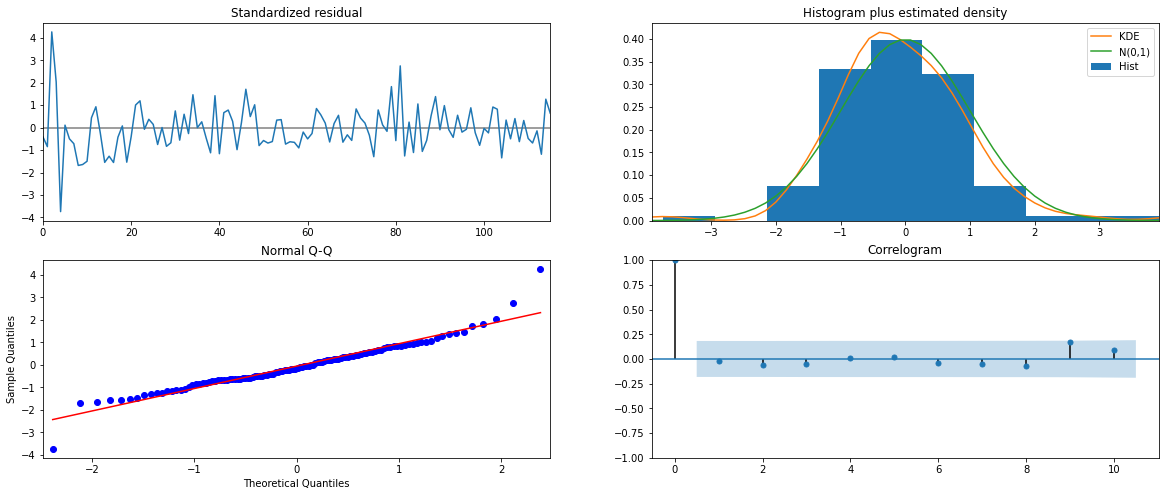

In [222]:
results_auto_SARIMA_6r.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

# Predict on the Test Set using this model and evaluate the model.

In [223]:
predicted_auto_SARIMA_6r = results_auto_SARIMA_6r.get_forecast(steps=len(test))

In [224]:
predicted_auto_SARIMA_6r.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.843009  18.848543      25.900545      99.785474
1  67.632101  19.300677      29.803470     105.460732
2  74.747794  19.413252      36.698519     112.797068
3  71.326411  19.476177      33.153806     109.499017
4  76.017208  19.484445      37.828398     114.206018

In [225]:
rmseR = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA_6r.predicted_mean,squared=False)
print(rmseR)

26.136428629473784


In [226]:
temp_resultsDfr = pd.DataFrame({'Test RMSE Rose ': [rmseR]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsR = pd.concat([resultsR,temp_resultsDfr])

resultsR

Test RMSE Rose 
ARIMA(0,1,2)                  15.618093
SARIMA(1,1,2)(2,0,2,6)        26.136429

# Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [227]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [228]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [229]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684482
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239436
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138944
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791433
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158597898
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920817
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956651
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573758833
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837797
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193757358
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144334443
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177748
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085307839
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824313414
SARIMA(0, 1, 2

In [230]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934564
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340409

In [231]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Thu, 12 Aug 2021   AIC                           1555.584
Time:                                    15:22:35   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

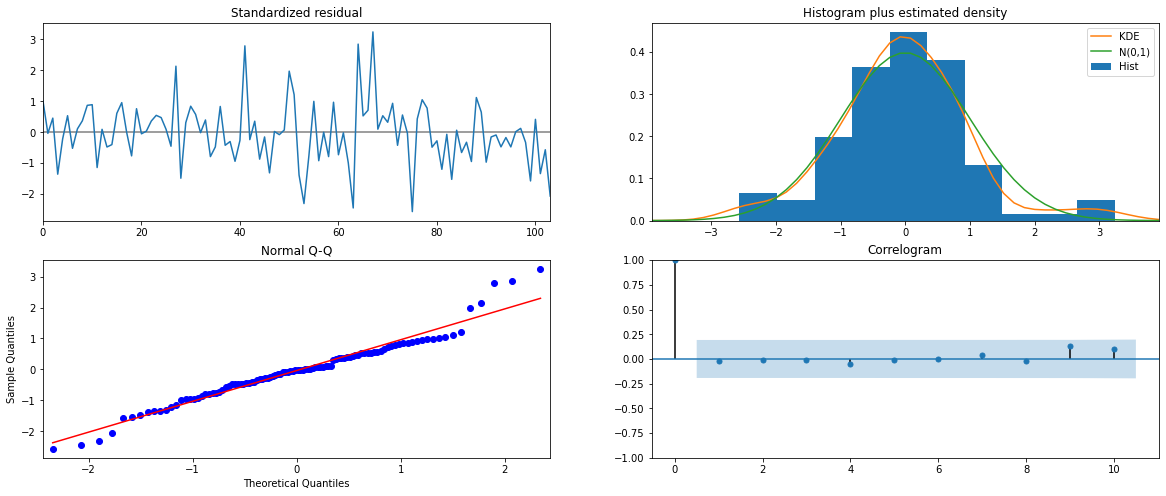

In [232]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

# Predict on the Test Set using this model and evaluate the model.

In [233]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [234]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.401257  388.341132     566.266625    2088.535890
1  1315.149557  402.001939     527.240235    2103.058879
2  1621.594351  401.995550     833.697550    2409.491151
3  1598.902813  407.233028     800.740745    2397.064882
4  1392.703609  407.962500     593.111803    2192.295415

In [235]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6025130673597


In [236]:
temp_resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


results = pd.concat([results,temp_resultsDf])

results

Test RMSE Sparkling
ARIMA(2,1,2)                     1374.696495
SARIMA(1,1,2)(2,0,2,6)            626.892244
SARIMA(1,1,2)(1,0,2,12)           528.602513

We see that the RMSE value have  reduced further when the seasonality parameter was changed to 12.

# Rose

## Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [237]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdqR = list(itertools.product(p, d, q))
model_pdqR = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdqR)):
    print('Model: {}{}'.format(pdqR[i], model_pdqR[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [238]:
SARIMA_AICr = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AICr

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [239]:
import statsmodels.api as sm

for param in pdqR:
    for param_seasonal in model_pdqR:
        SARIMA_modelr = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAr = SARIMA_modelr.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMAr.aic))
        SARIMA_AICr = SARIMA_AICr.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAr.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207316
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380891
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386745
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752697
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697565
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894588
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383962
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383767
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918603


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946817
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483306409
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535943
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461678
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260811447
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541045
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264883
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341402
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933504893
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913559274
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912258001
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545050785
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679976
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585705
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257691
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680452
SARIMA(1, 1, 0)x(1, 0, 

In [240]:
SARIMA_AICr.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.900383
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [241]:
import statsmodels.api as sm

auto_SARIMA_12r = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12r = auto_SARIMA_12r.fit(maxiter=1000)
print(results_auto_SARIMA_12r.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Thu, 12 Aug 2021   AIC                            887.938
Time:                                    15:23:24   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.890     -0.004      0.996    -373.020     371.334
ma.L2         -0.1573     29.833   

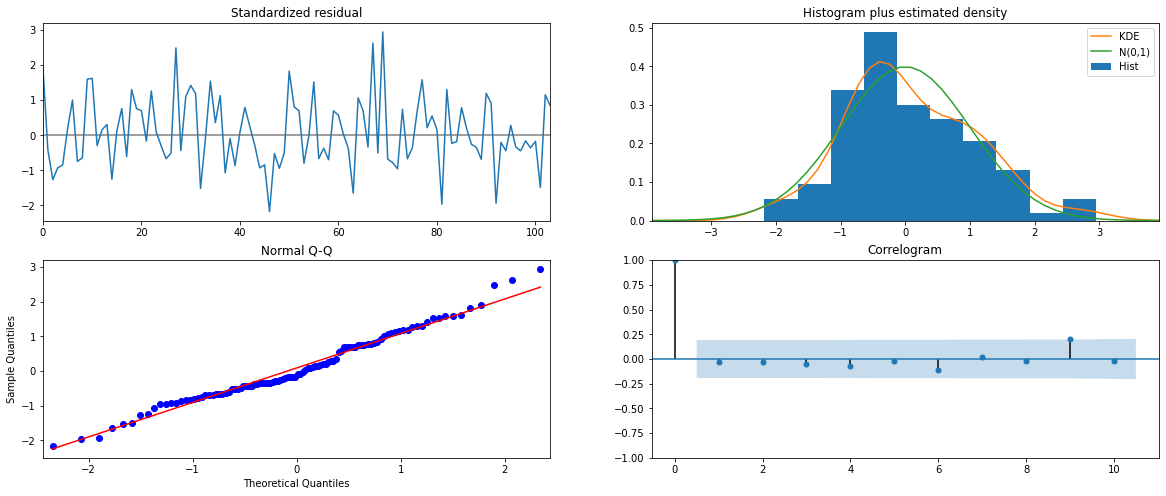

In [242]:
results_auto_SARIMA_12r.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.





#Predict on the Test Set using this model and evaluate the model.


In [243]:
predicted_auto_SARIMA_12r = results_auto_SARIMA_12r.get_forecast(steps=len(rtest))

In [244]:
predicted_auto_SARIMA_12r.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867264  15.928501      31.647976      94.086552
1  70.541190  16.147659      38.892360     102.190020
2  77.356411  16.147656      45.707586     109.005236
3  76.208814  16.147656      44.559989     107.857639
4  72.747398  16.147656      41.098573     104.396223

In [245]:
rmseR = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA_12r.predicted_mean,squared=False)
print(rmseR)

26.928361908025416


In [246]:
temp_resultsDfr = pd.DataFrame({'Test RMSE Rose ': [rmseR]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsR = pd.concat([resultsR,temp_resultsDfr])

resultsR

Test RMSE Rose 
ARIMA(0,1,2)                   15.618093
SARIMA(1,1,2)(2,0,2,6)         26.136429
SARIMA(0,1,2)(2,0,2,12)        26.928362

We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

# ARIMA

# Sparkling

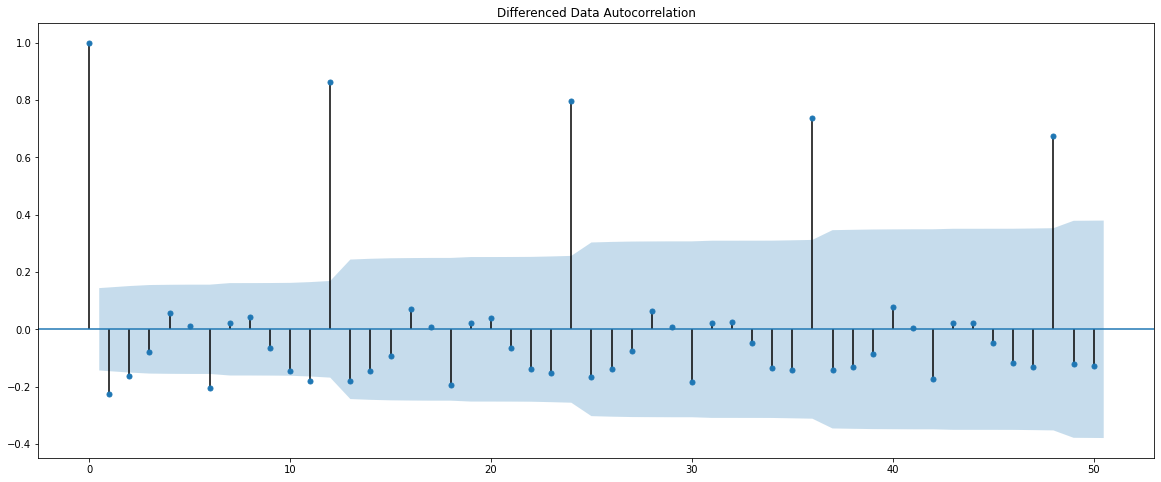

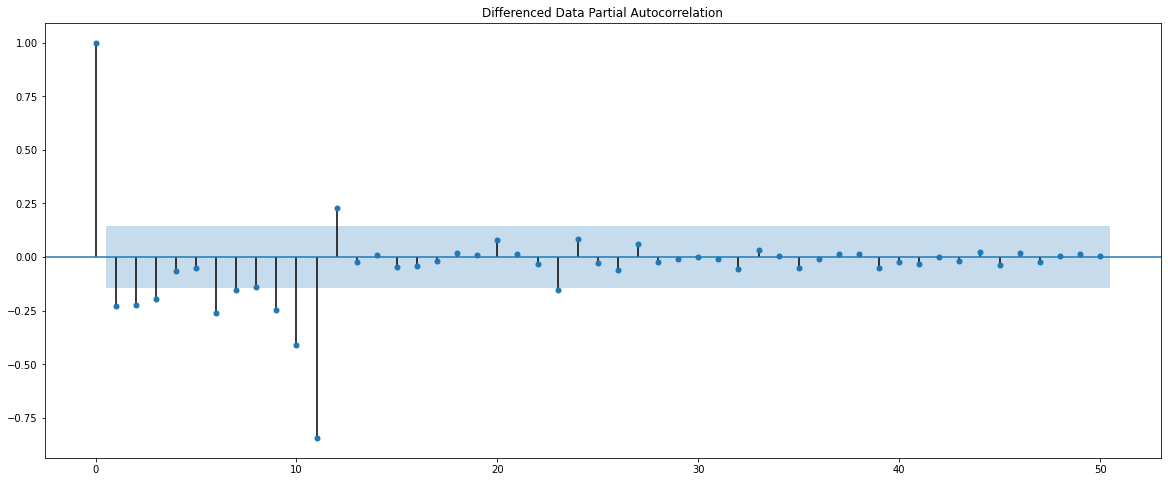

In [247]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.


In [248]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.180
Date:                Thu, 12 Aug 2021   AIC                           2228.928
Time:                        15:23:26   BIC                           2249.054
Sample:                    02-29-1980   HQIC                          2237.106
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9886      3.644      1.643      0.103      -1.154      13.131
ar.L1.D.Sparkling    -0.4420   8.18e-06  -5.41e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Predict on the Test Set using this model and evaluate the model.

In [249]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [250]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1379.1826761518028


In [251]:
temp_resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


results = pd.concat([results,temp_resultsDf])

results

Test RMSE Sparkling
ARIMA(2,1,2)                     1374.696495
SARIMA(1,1,2)(2,0,2,6)            626.892244
SARIMA(1,1,2)(1,0,2,12)           528.602513
ARIMA(3,1,2)                     1379.182676

We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

# Rose

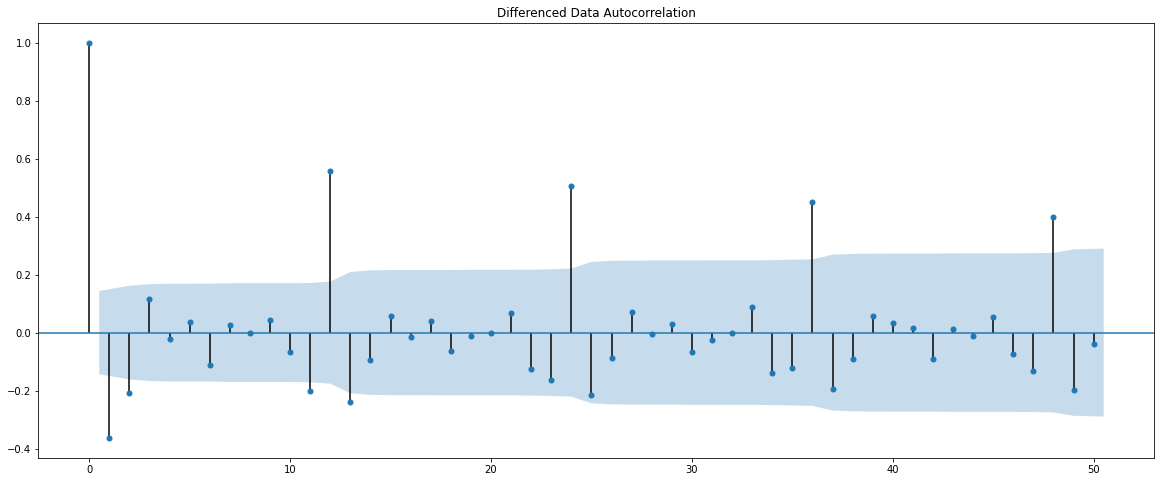

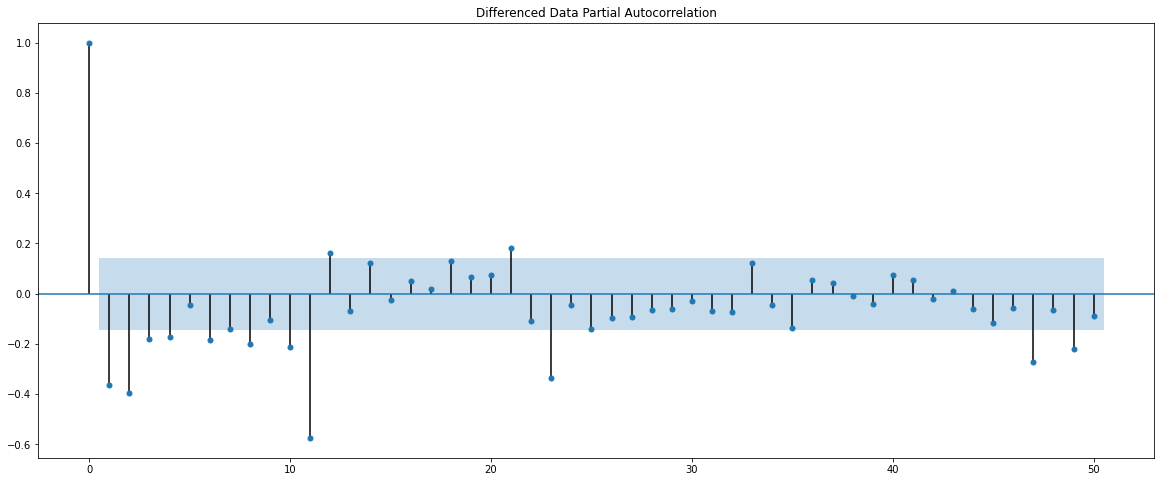

In [252]:
plot_acf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4. But we will take its value as 3 to prevent a complex model.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.


In [253]:
manual_ARIMAr = ARIMA(rtrain['Rose'], order=(3,1,2),freq='M')

results_manual_ARIMAr = manual_ARIMAr.fit()

print(results_manual_ARIMAr.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -633.485
Method:                       css-mle   S.D. of innovations             29.950
Date:                Thu, 12 Aug 2021   AIC                           1280.969
Time:                        15:23:27   BIC                           1301.096
Sample:                    02-29-1980   HQIC                          1289.148
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4883      0.085     -5.723      0.000      -0.656      -0.321
ar.L1.D.Rose    -0.3558      0.332     -1.071      0.286      -1.007       0.296
ar.L2.D.Rose     0.0279      0.120      0.23

# Predict on the Test Set using this model and evaluate the model.

In [254]:
predicted_manual_ARIMAr = results_manual_ARIMAr.forecast(steps=len(rtest))

In [255]:
rmseR = mean_squared_error(rtest['Rose'],predicted_manual_ARIMAr[0],squared=False)
print(rmseR)

15.52288708797049


In [256]:
temp_resultsDfr = pd.DataFrame({'Test RMSE Rose ': [rmseR]}
                           ,index=['ARIMA(3,1,2)'])


resultsR = pd.concat([resultsR,temp_resultsDfr])

resultsR

Test RMSE Rose 
ARIMA(0,1,2)                   15.618093
SARIMA(1,1,2)(2,0,2,6)         26.136429
SARIMA(0,1,2)(2,0,2,12)        26.928362
ARIMA(3,1,2)                   15.522887

For Rose dataset we can see that the most recent simpler model gives the best rmse result although its almost simpler to the auto Arima model.

# SARIMA

# Seasonality = 6 and 12

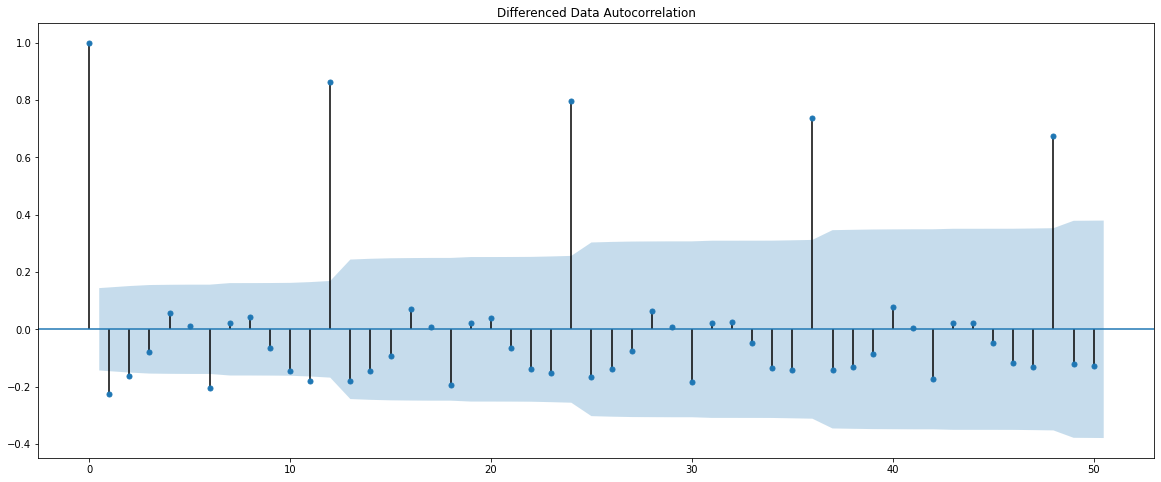

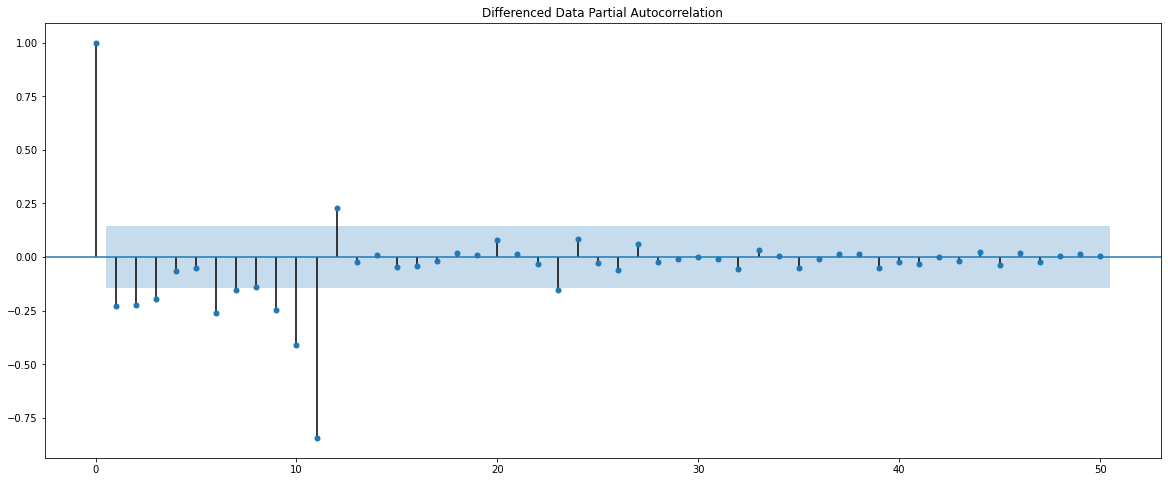

In [257]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method='ywmle')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

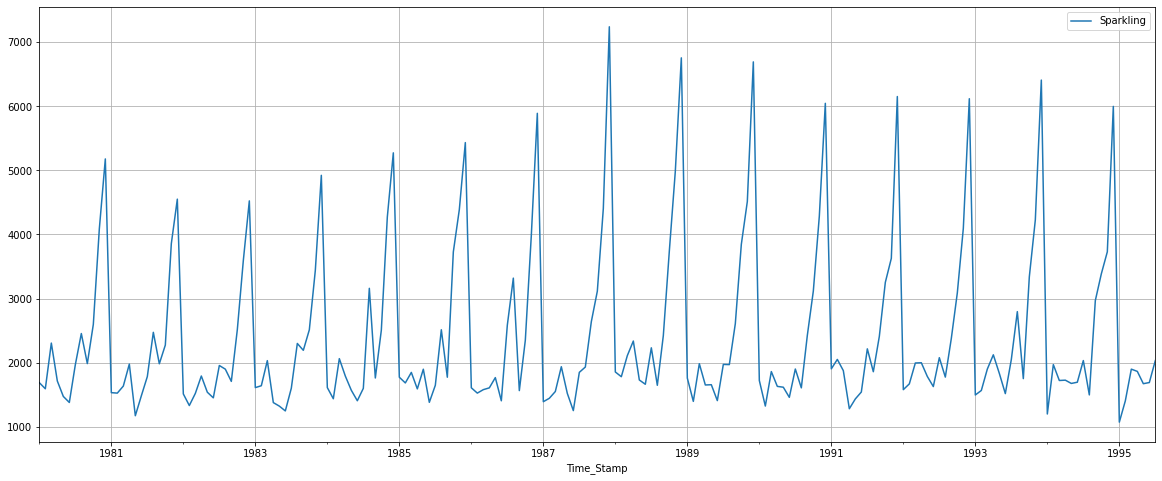

In [258]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

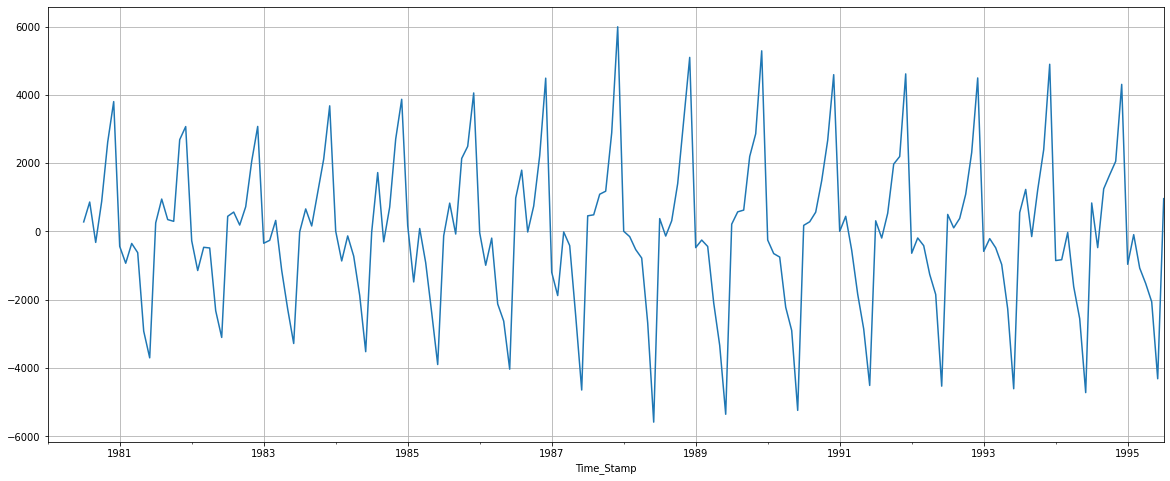

In [259]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

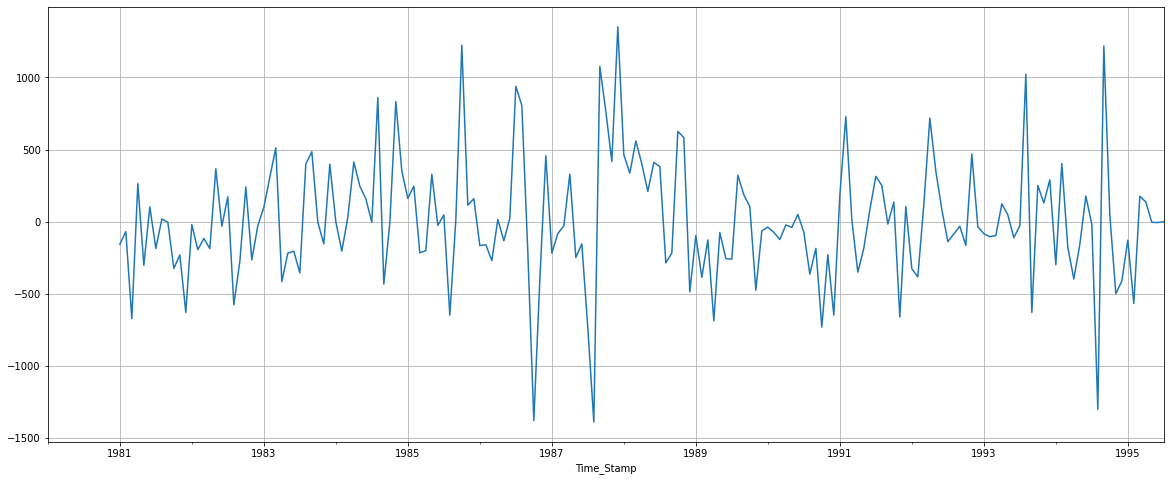

In [260]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

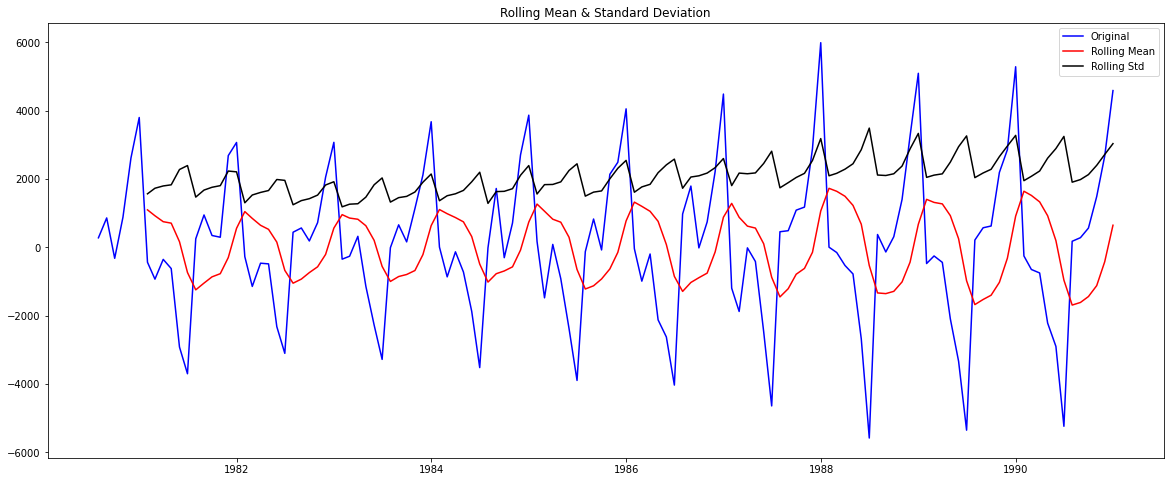

Results of Dickey-Fuller Test:
Test Statistic                -8.181919e+00
p-value                        8.088278e-13
#Lags Used                     6.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [261]:
test_stationarity((train['Sparkling'].diff(6).dropna()).dropna())

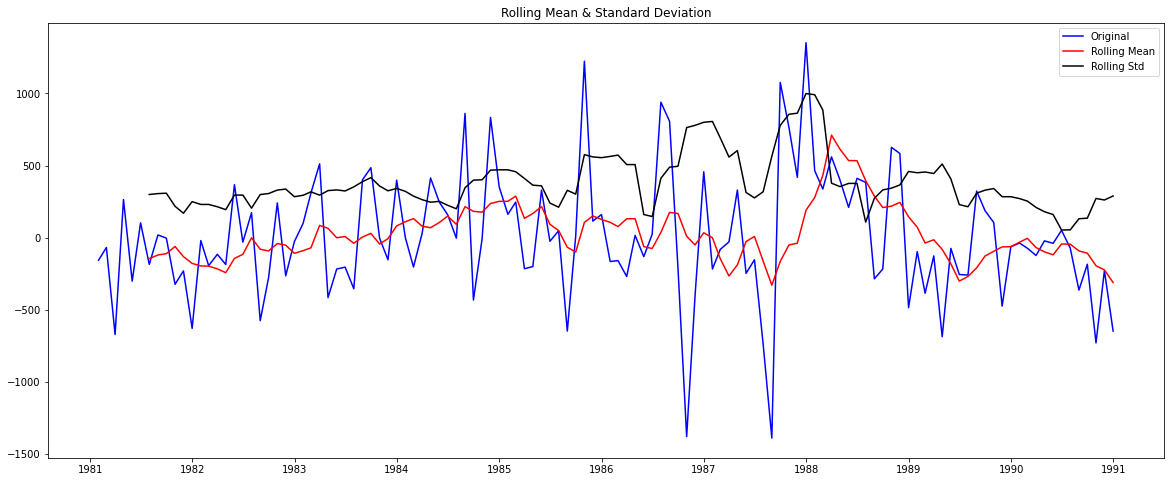

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [262]:
test_stationarity((train['Sparkling'].diff(12).dropna()).dropna())

## Checking the ACF and the PACF plots for the new modified Time Series

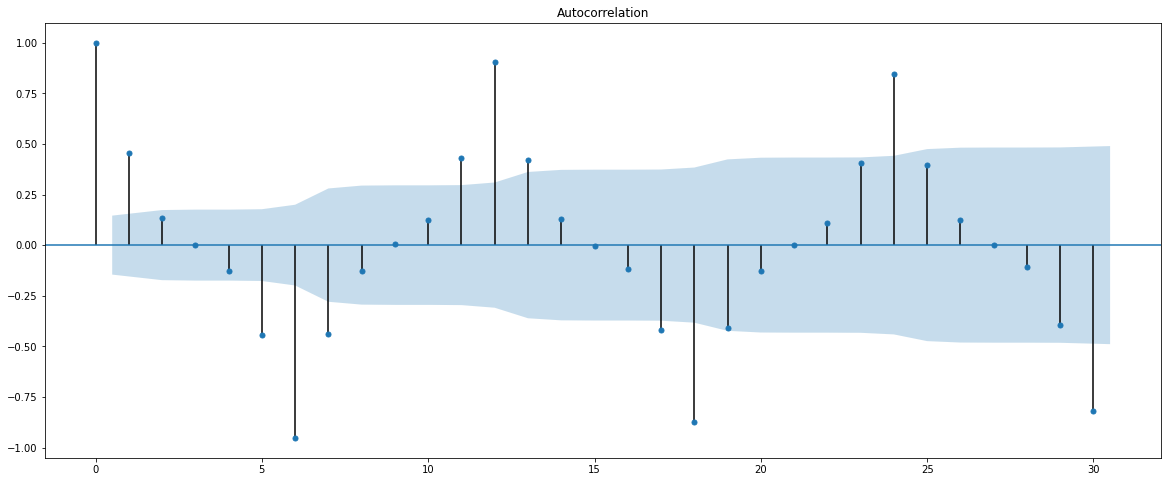

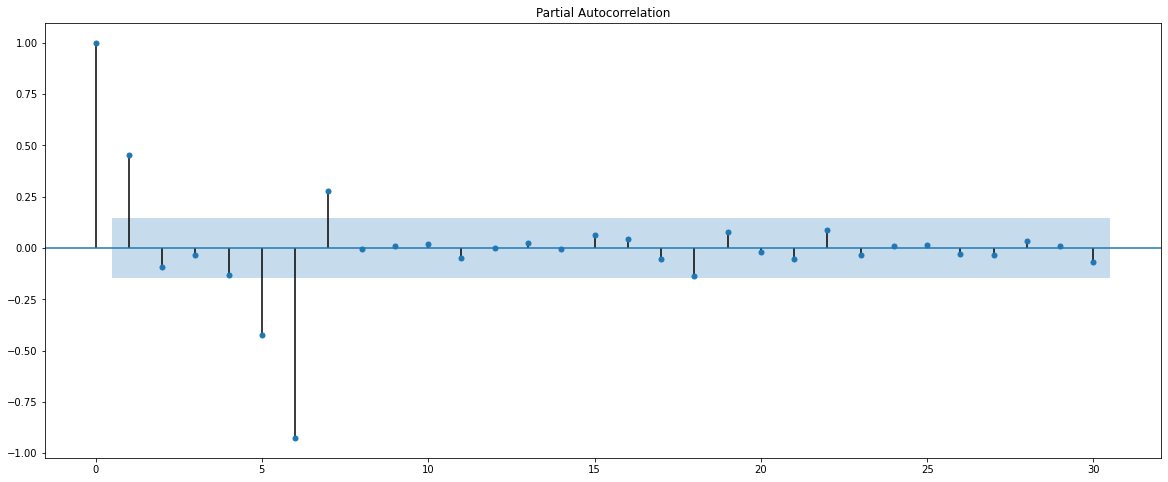

In [263]:
plot_acf((df['Sparkling'].diff(6).dropna()).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(6).dropna()).dropna(),lags=30,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(1) and q(3) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 1.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 1. Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

In [264]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 0, 3, 6)   Log Likelihood                -845.298
Date:                           Thu, 12 Aug 2021   AIC                           1710.596
Time:                                   15:23:32   BIC                           1737.601
Sample:                                        0   HQIC                          1721.549
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6986      0.105     -6.664      0.000      -0.904      -0.493
ar.L2         -0.0459      0.129     -0.357

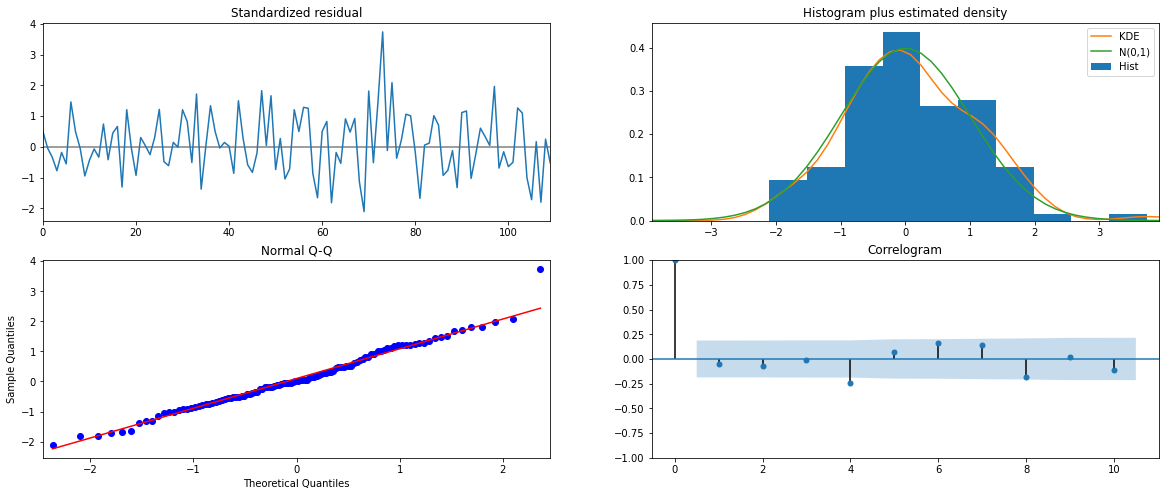

In [265]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

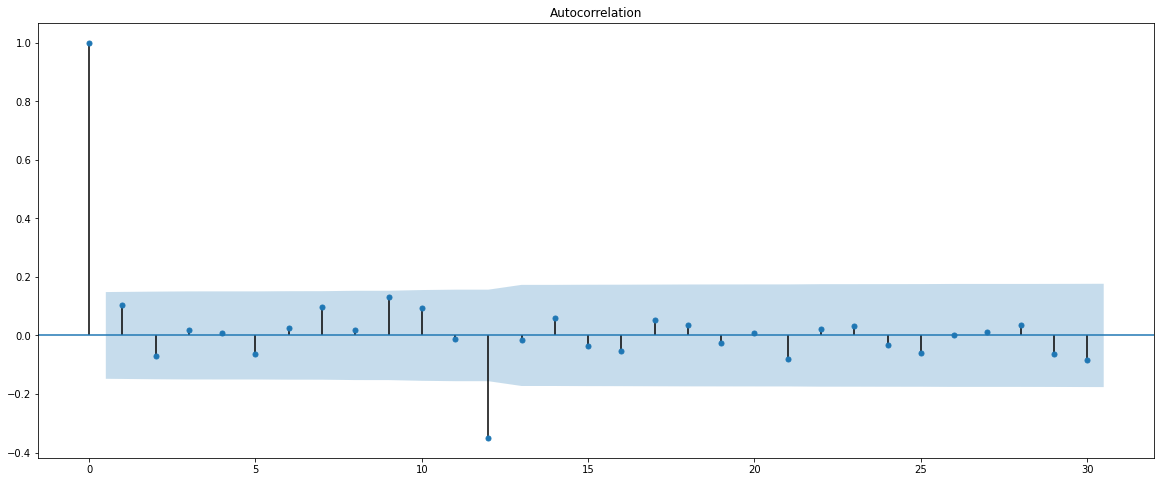

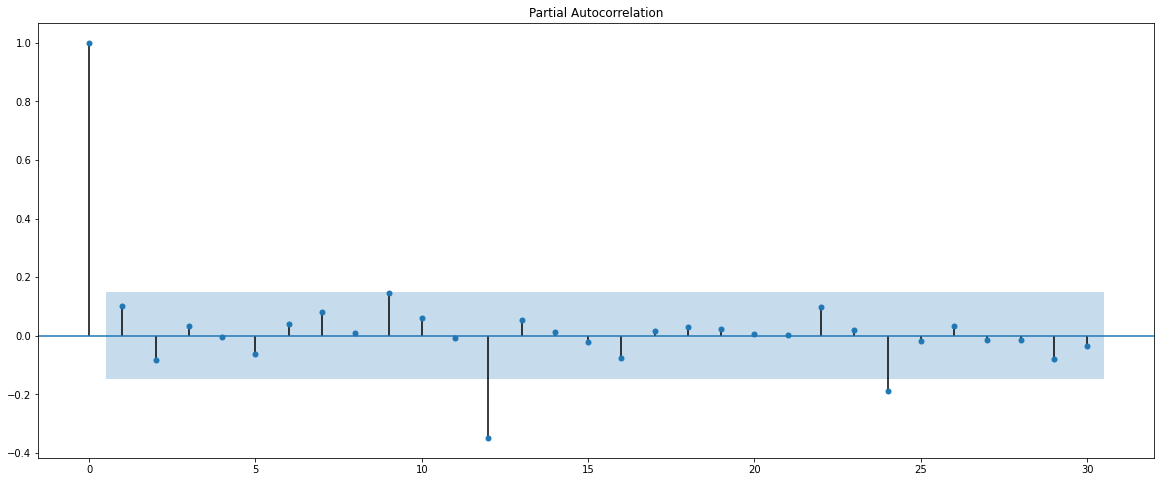

In [266]:
plot_acf((df['Sparkling'].diff(12).dropna()).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).dropna(),lags=30,method='ywmle');

In [267]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 0, 1, 12)   Log Likelihood                -771.395
Date:                            Thu, 12 Aug 2021   AIC                           1560.790
Time:                                    15:23:37   BIC                           1584.589
Sample:                                         0   HQIC                          1570.432
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6518      0.313     -2.081      0.037      -1.266      -0.038
ar.L2         -0.0463      0.178   

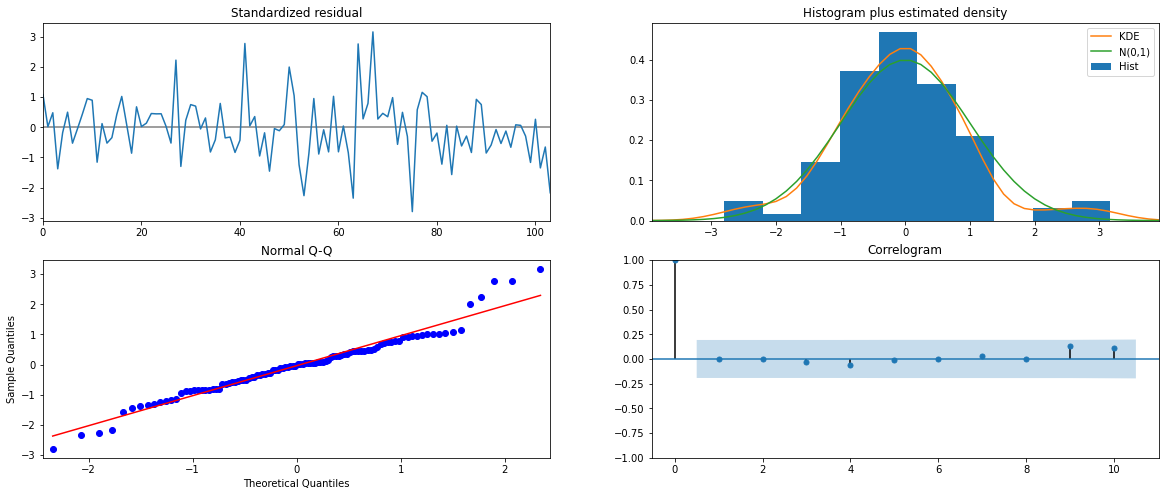

In [268]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [269]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [270]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1963.295813  505.709120     972.124150    2954.467475
1  1630.593769  531.259466     589.344350    2671.843189
2  1934.592530  541.662668     872.953208    2996.231852
3  1586.197130  546.614345     514.852701    2657.541558
4   950.971966  547.537833    -122.182468    2024.126400

In [271]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

902.7907259447834


In [272]:
temp_resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse]}
                           ,index=['SARIMA(3,1,2)(1,0,3,6)'])


results = pd.concat([results,temp_resultsDf])

results

Test RMSE Sparkling
ARIMA(2,1,2)                     1374.696495
SARIMA(1,1,2)(2,0,2,6)            626.892244
SARIMA(1,1,2)(1,0,2,12)           528.602513
ARIMA(3,1,2)                     1379.182676
SARIMA(3,1,2)(1,0,3,6)            902.790726

In [273]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [274]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1309.966523  393.927789     537.882245    2082.050801
1  1257.747627  404.488599     464.964542    2050.530713
2  1555.138035  404.489335     762.353506    2347.922565
3  1540.082836  412.389501     731.814268    2348.351405
4  1341.694655  413.241561     531.756078    2151.633232

In [275]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

611.0380372403605


In [276]:
temp_resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse]}
                           ,index=['SARIMA(3,1,2)(2,0,1,12)'])


results = pd.concat([results,temp_resultsDf])

results

Test RMSE Sparkling
ARIMA(2,1,2)                     1374.696495
SARIMA(1,1,2)(2,0,2,6)            626.892244
SARIMA(1,1,2)(1,0,2,12)           528.602513
ARIMA(3,1,2)                     1379.182676
SARIMA(3,1,2)(1,0,3,6)            902.790726
SARIMA(3,1,2)(2,0,1,12)           611.038037

# Rose

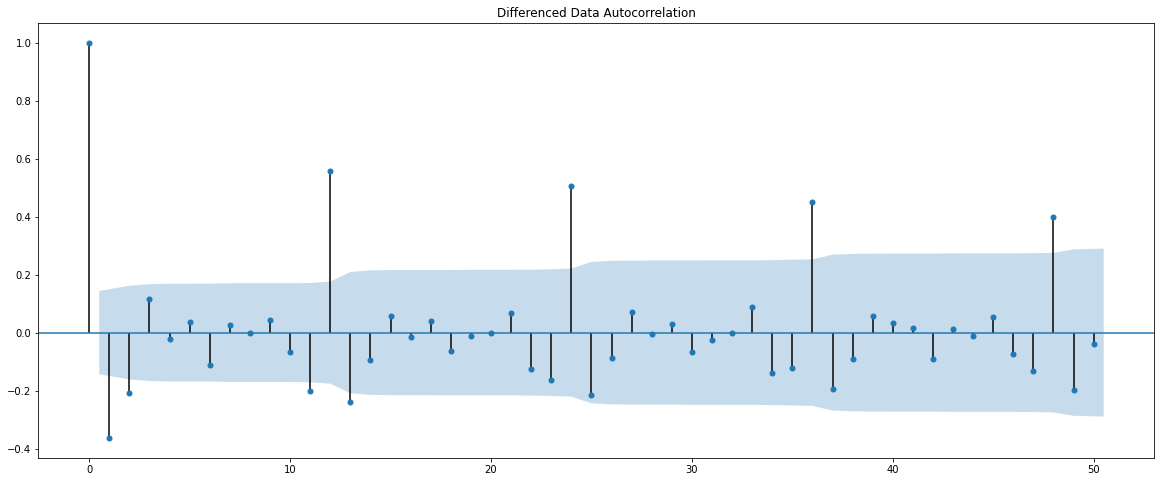

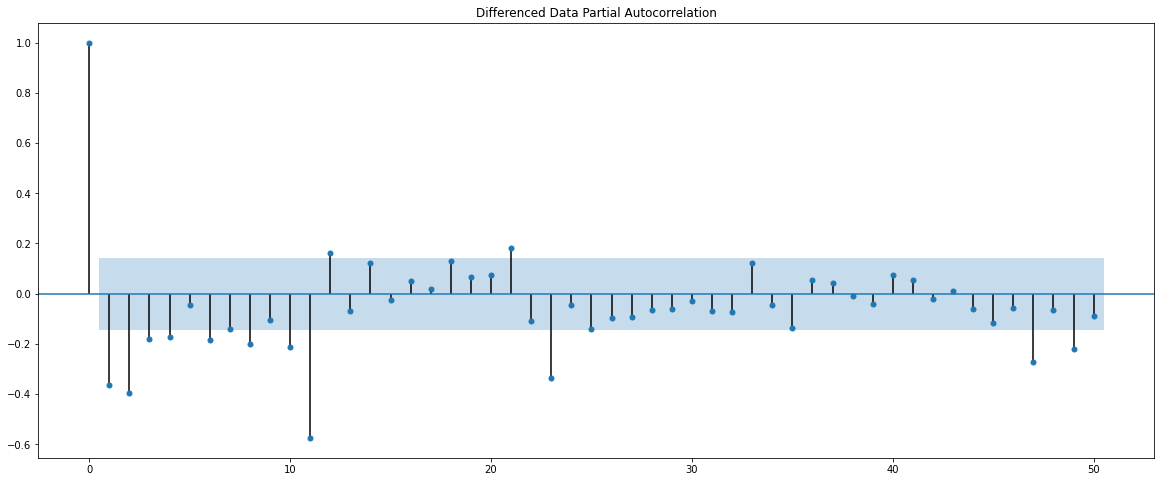

In [277]:
plot_acf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

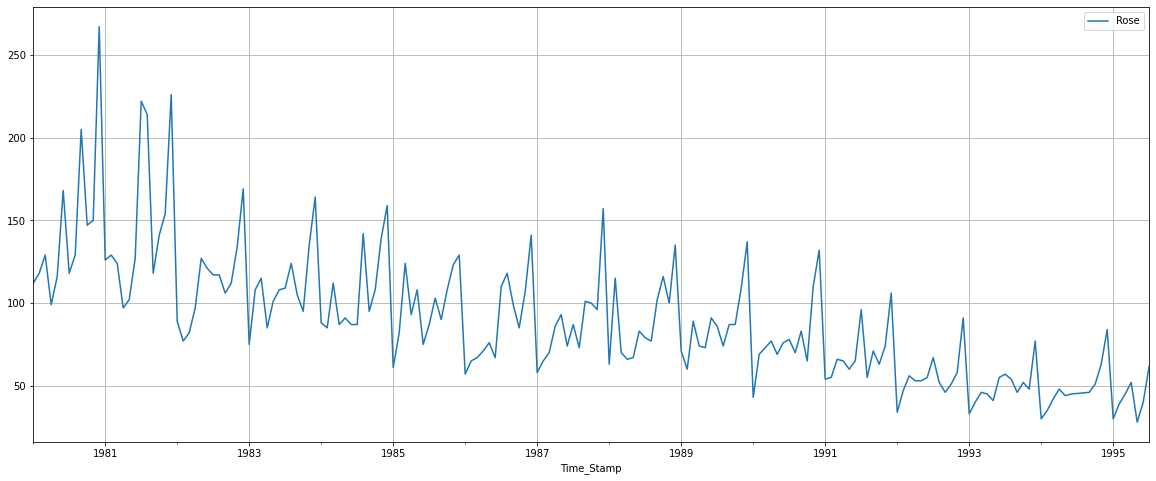

In [278]:
dfr.plot()
plt.grid();

# Seasonality = 6

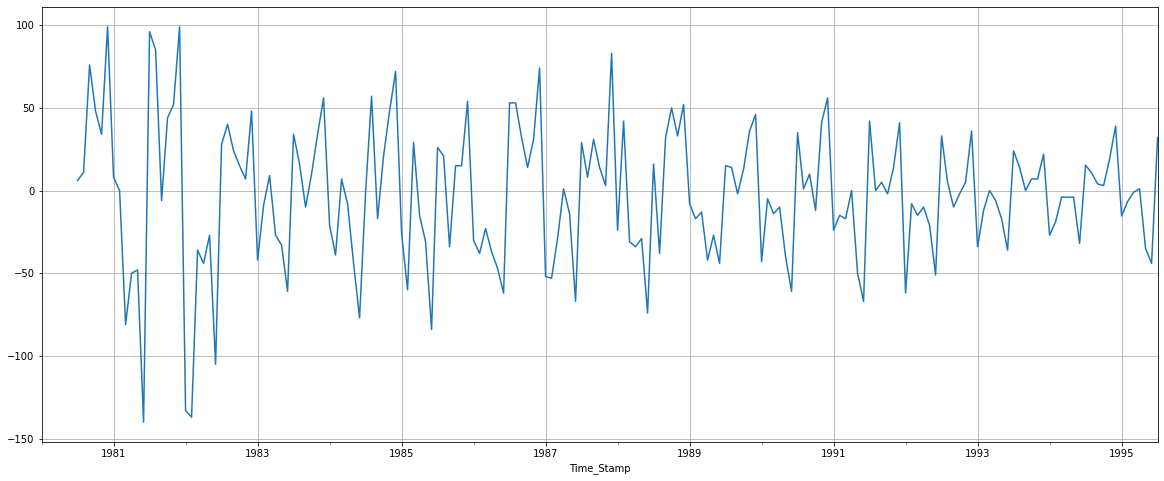

In [279]:
(dfr['Rose'].diff(6)).plot()
plt.grid();

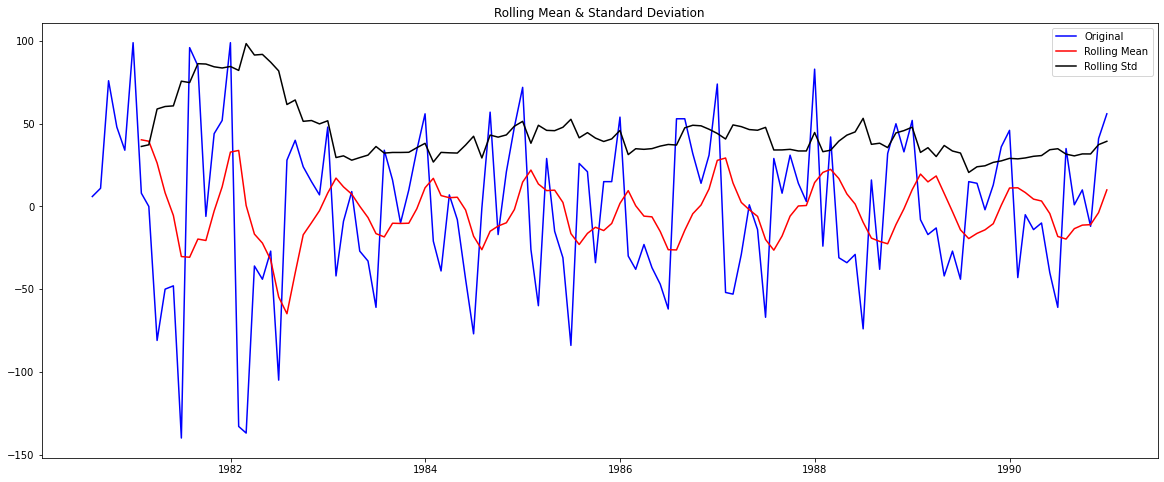

Results of Dickey-Fuller Test:
Test Statistic                -7.442449e+00
p-value                        5.956534e-11
#Lags Used                     7.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [280]:
test_stationarity((rtrain['Rose'].diff(6).dropna()).dropna())

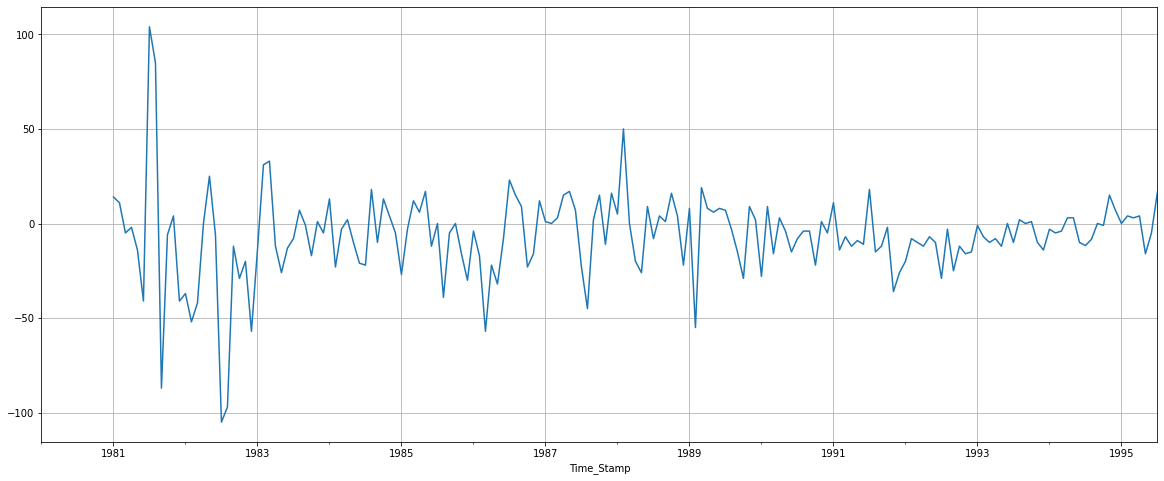

In [281]:
(dfr['Rose'].diff(12)).plot()
plt.grid();

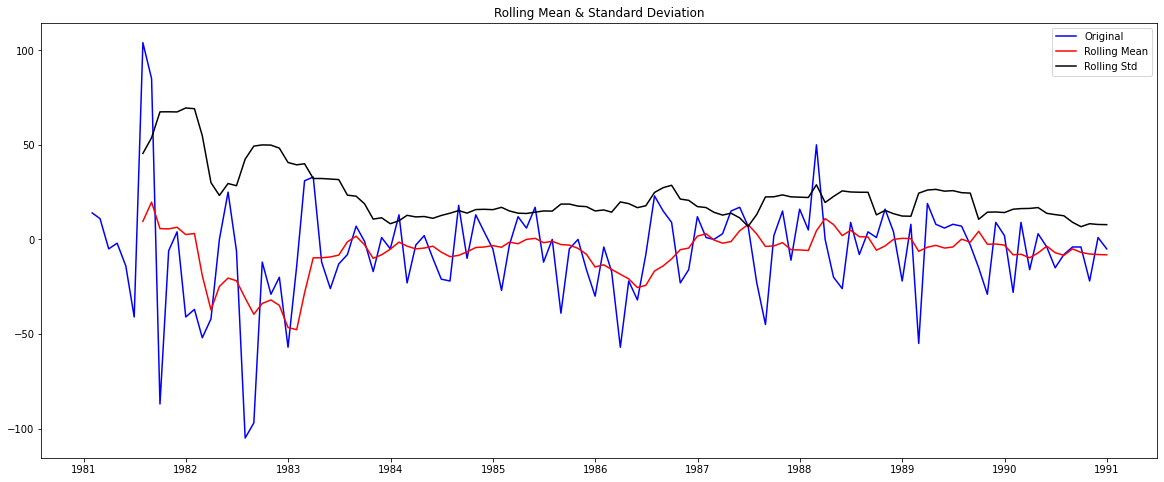

Results of Dickey-Fuller Test:
Test Statistic                  -3.619482
p-value                          0.005399
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [282]:
test_stationarity((rtrain['Rose'].diff(12).dropna()).dropna())

## Checking the ACF and the PACF plots for the new modified Time Series

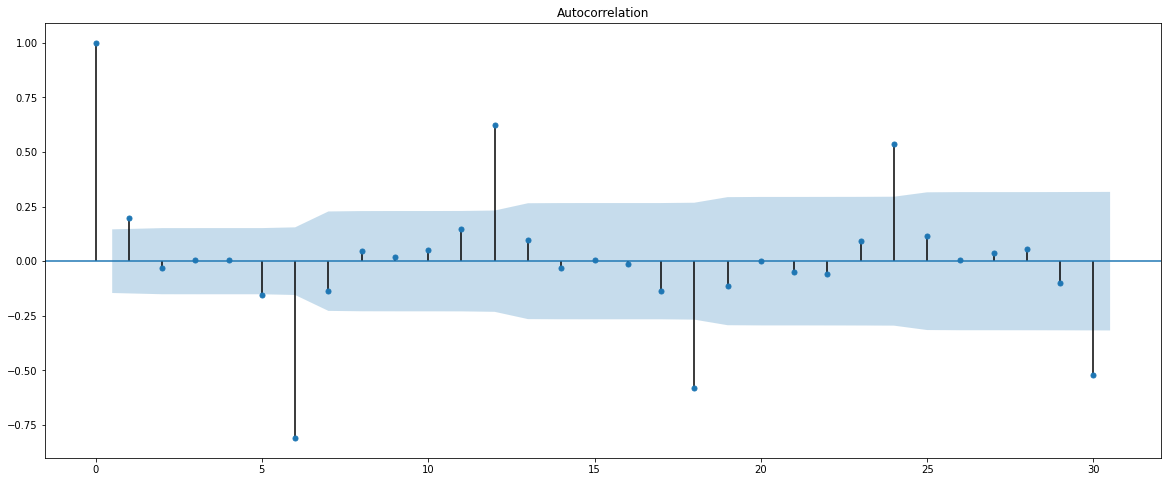

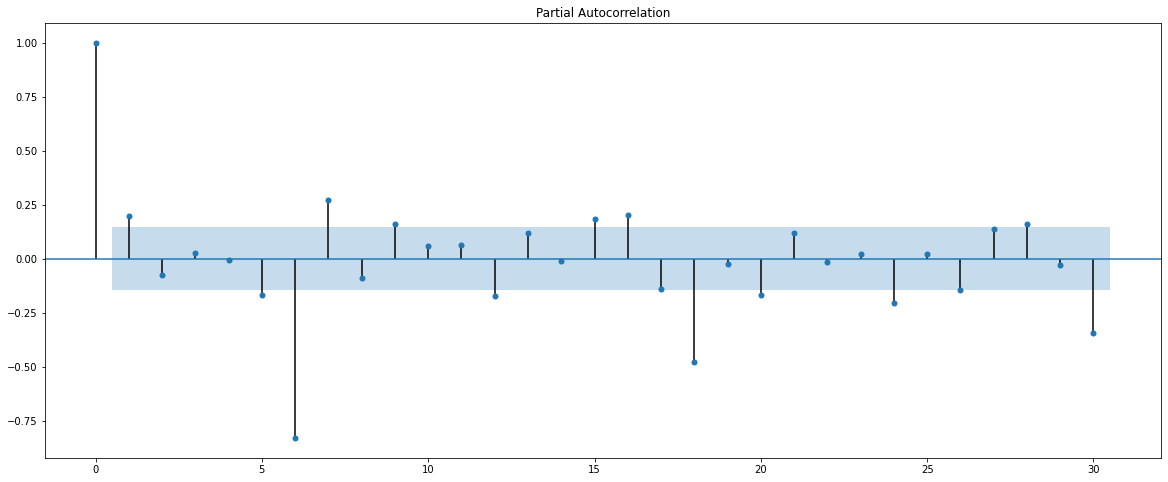

In [283]:
plot_acf((dfr['Rose'].diff(6).dropna()),lags=30)
plot_pacf((dfr['Rose'].diff(6).dropna()),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(3) and q(2) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 3.

The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 3. Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

In [284]:
import statsmodels.api as sm

manual_SARIMA_6r = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6r = manual_SARIMA_6r.fit(maxiter=1000)
print(results_manual_SARIMA_6r.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, 3, 6)   Log Likelihood                -470.135
Date:                           Thu, 12 Aug 2021   AIC                            964.271
Time:                                   15:23:42   BIC                            996.676
Sample:                                        0   HQIC                           977.415
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1695      0.660      0.257      0.797      -1.124       1.463
ar.L2         -0.1613      0.214     -0.755

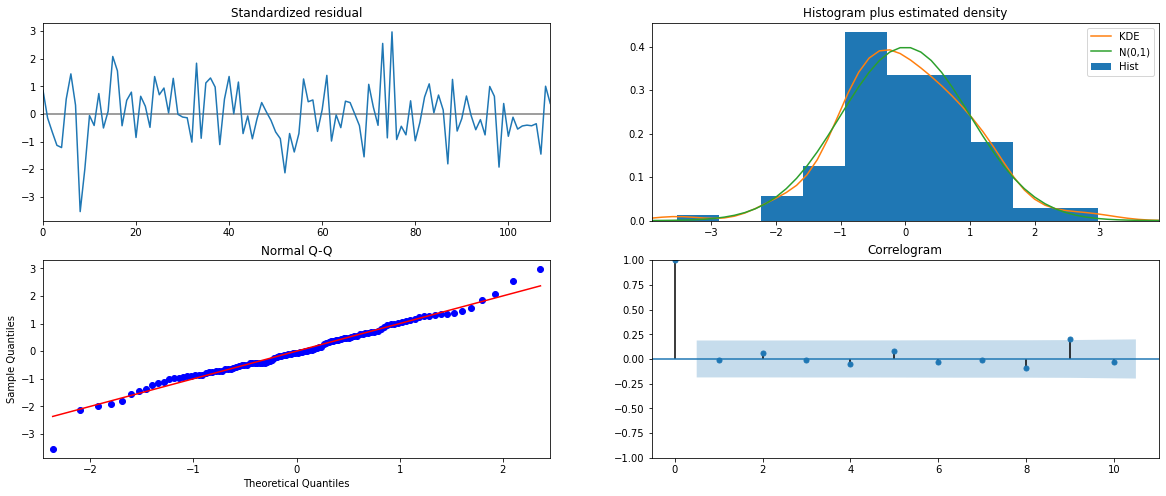

In [285]:
results_manual_SARIMA_6r.plot_diagnostics()
plt.show()

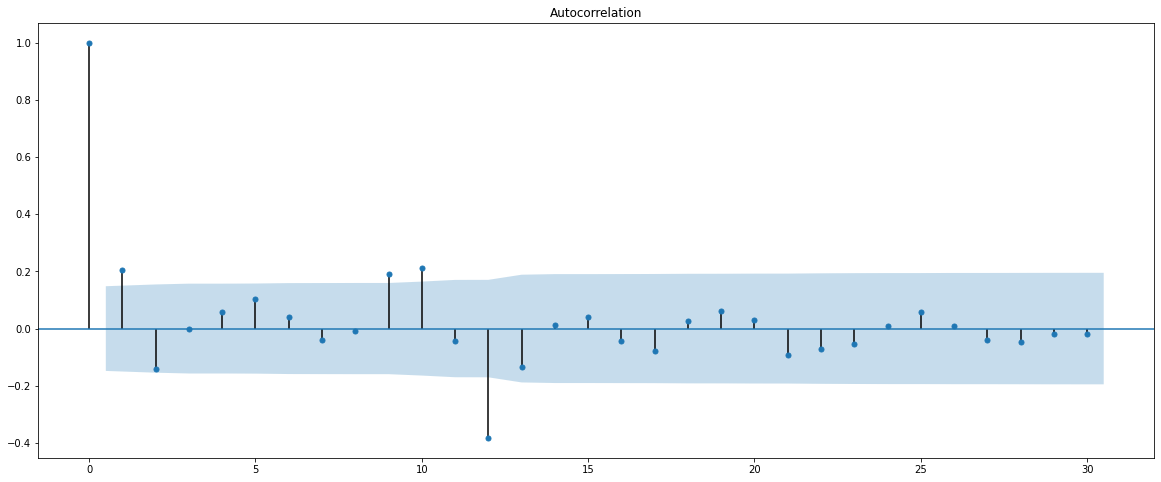

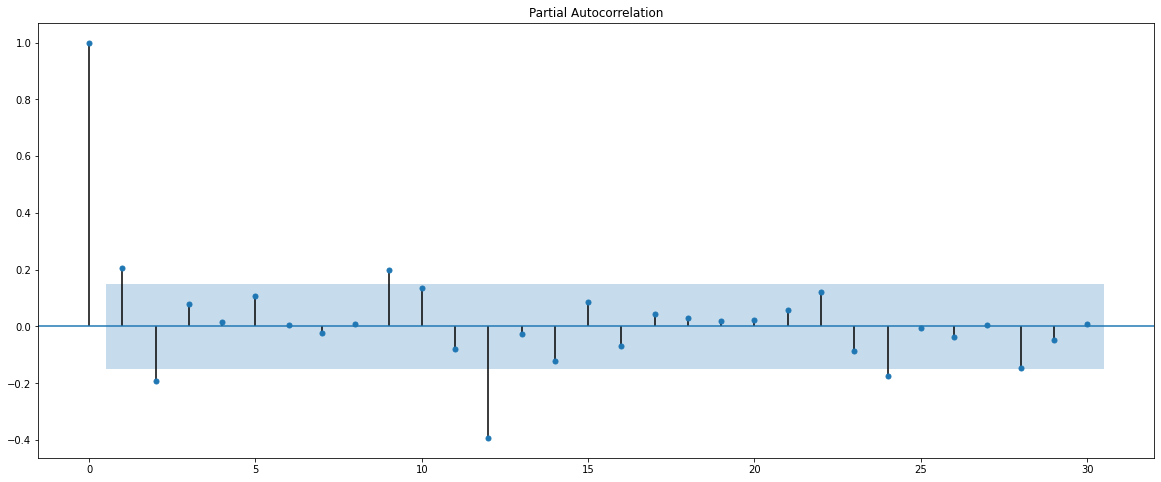

In [286]:
plot_acf((dfr['Rose'].diff(12).dropna()),lags=30)
plot_pacf((dfr['Rose'].diff(12).dropna()),lags=30);

In [287]:
import statsmodels.api as sm

manual_SARIMA_12r = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                order=(3, 1, 2),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12r = manual_SARIMA_12r.fit(maxiter=1000)
print(results_manual_SARIMA_12r.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 0, 1, 12)   Log Likelihood                -436.164
Date:                            Thu, 12 Aug 2021   AIC                            890.328
Time:                                    15:23:45   BIC                            914.127
Sample:                                         0   HQIC                           899.970
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1437      0.780      0.184      0.854      -1.384       1.672
ar.L2         -0.0757      0.159   

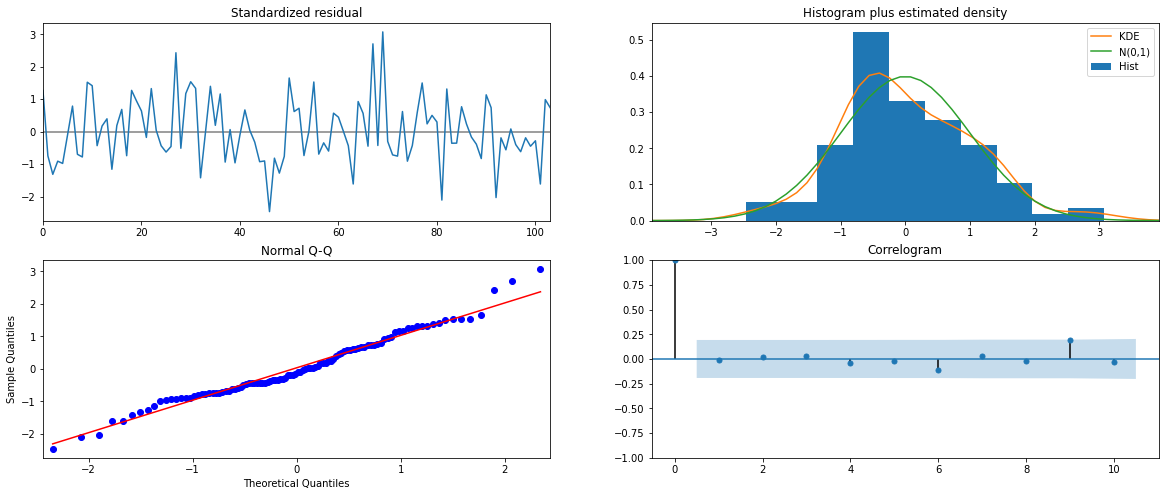

In [288]:
results_manual_SARIMA_12r.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [289]:
predicted_manual_SARIMA_6r = results_manual_SARIMA_6r.get_forecast(steps=len(rtest))

In [290]:
predicted_manual_SARIMA_6r.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  65.318738  17.031776      31.937070      98.700406
1  70.705074  17.551763      36.304250     105.105898
2  74.968885  17.649271      40.376949     109.560821
3  76.843507  17.827611      41.902032     111.784981
4  75.606380  17.831093      40.658079     110.554680

In [291]:
rmseR = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA_6r.predicted_mean,squared=False)
print(rmseR)

29.93440417797009


In [292]:
temp_resultsDfr = pd.DataFrame({'Test RMSE Rose ': [rmseR]}
                           ,index=['SARIMA(3,1,2)(3,0,3,6)'])


resultsR = pd.concat([resultsR,temp_resultsDfr])

resultsR

Test RMSE Rose 
ARIMA(0,1,2)                   15.618093
SARIMA(1,1,2)(2,0,2,6)         26.136429
SARIMA(0,1,2)(2,0,2,12)        26.928362
ARIMA(3,1,2)                   15.522887
SARIMA(3,1,2)(3,0,3,6)         29.934404

In [293]:
predicted_manual_SARIMA_12r = results_manual_SARIMA_12r.get_forecast(steps=len(rtest))

In [294]:
predicted_manual_SARIMA_12r.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  63.980778  15.790699      33.031576      94.929980
1  67.323908  15.960043      36.042798      98.605018
2  76.841578  15.975306      45.530553     108.152604
3  76.993560  16.038050      45.559559     108.427561
4  73.616041  16.038632      42.180900     105.051182

In [295]:
rmseR = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA_12r.predicted_mean,squared=False)
print(rmseR)

27.992337075309443


In [296]:
temp_resultsDfr = pd.DataFrame({'Test RMSE Rose ': [rmseR]}
                           ,index=['SARIMA(3,1,2)(2,0,1,12)'])


resultsR = pd.concat([resultsR,temp_resultsDfr])

resultsR

Test RMSE Rose 
ARIMA(0,1,2)                   15.618093
SARIMA(1,1,2)(2,0,2,6)         26.136429
SARIMA(0,1,2)(2,0,2,12)        26.928362
ARIMA(3,1,2)                   15.522887
SARIMA(3,1,2)(3,0,3,6)         29.934404
SARIMA(3,1,2)(2,0,1,12)        27.992337

# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

# Sparkling

In [297]:
resultSparkling

Test RMSE Sparkling
Alpha=0.10,Beta=0.00,Gamma=0.371/0.048,TripleEx...           384.197750
Alpha=0.3,Beta=0.3/0.4,Gamma=0.3,TripleExponent...           392.786198
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
SimpleAverageModel                                          1275.081804
Alpha=0.099,SimpleExponentialSmoothing                      1275.081813
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
RegressionOnTime                                            1389.135175
Alpha=0.3,SimpleExponentialSmoothing                        2603.403036
NaiveModel                                                  3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing              18259.110704

In [298]:
results

Test RMSE Sparkling
ARIMA(2,1,2)                     1374.696495
SARIMA(1,1,2)(2,0,2,6)            626.892244
SARIMA(1,1,2)(1,0,2,12)           528.602513
ARIMA(3,1,2)                     1379.182676
SARIMA(3,1,2)(1,0,3,6)            902.790726
SARIMA(3,1,2)(2,0,1,12)           611.038037

In [299]:
results1 = pd.concat([resultSparkling,results])
Sparkling=results1.sort_values(by='Test RMSE Sparkling',ascending=True)
Sparkling=Sparkling.rename(index={"Alpha=0.10,Beta=0.00,Gamma=0.371/0.048,TripleExponentialSmoothing":"Alpha=0.10,Beta=0.00,Gamma=0.371,TripleExponentialSmoothing",
                                  "Alpha=0.3,Beta=0.3/0.4,Gamma=0.3,TripleExponentialSmoothing":"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing"})

In [300]:
Sparkling

Test RMSE Sparkling
Alpha=0.10,Beta=0.00,Gamma=0.371,TripleExponent...           384.197750
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           392.786198
SARIMA(1,1,2)(1,0,2,12)                                      528.602513
SARIMA(3,1,2)(2,0,1,12)                                      611.038037
SARIMA(1,1,2)(2,0,2,6)                                       626.892244
2pointTrailingMovingAverage                                  813.400684
SARIMA(3,1,2)(1,0,3,6)                                       902.790726
4pointTrailingMovingAverage                                 1156.589694
SimpleAverageModel                                          1275.081804
Alpha=0.099,SimpleExponentialSmoothing                      1275.081813
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
ARIMA(2,1,2)                                                1374.696495
ARIMA(3,1,2)                                                1379.182676
RegressionOnTime                                            1389.135175
Alpha=0.3,SimpleExponentialSmoothing                        2603.403036
NaiveModel                                                  3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing              18259.110704

# Rose

In [301]:
resultRose

Test RMSE Rose 
Alpha=0.3,Beta=0.3/0.4,Gamma=0.3,TripleExponent...        10.945435
2pointTrailingMovingAverage                               11.529278
4pointTrailingMovingAverage                               14.451403
6pointTrailingMovingAverage                               14.566327
9pointTrailingMovingAverage                               14.727630
RegressionOnTime                                          15.268955
Alpha=0.10,Beta=0.00,Gamma=0.371/0.048,TripleEx...        17.369488
Alpha=0.099,SimpleExponentialSmoothing                    36.796246
Alpha=0.3,SimpleExponentialSmoothing                      47.504821
SimpleAverageModel                                        53.460570
NaiveModel                                                79.718773
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing            265.567594

In [302]:
resultsR

Test RMSE Rose 
ARIMA(0,1,2)                   15.618093
SARIMA(1,1,2)(2,0,2,6)         26.136429
SARIMA(0,1,2)(2,0,2,12)        26.928362
ARIMA(3,1,2)                   15.522887
SARIMA(3,1,2)(3,0,3,6)         29.934404
SARIMA(3,1,2)(2,0,1,12)        27.992337

In [303]:
results2 = pd.concat([resultRose,resultsR])
Rose=results2.sort_values(by='Test RMSE Rose ',ascending=True)
Rose=Rose.rename(index={"Alpha=0.3,Beta=0.3/0.4,Gamma=0.3,TripleExponentialSmoothing":"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",
                        "Alpha=0.10,Beta=0.00,Gamma=0.371/0.048,TripleExponentialSmoothing":"Alpha=0.10,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing"})
Rose

Test RMSE Rose 
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...        10.945435
2pointTrailingMovingAverage                               11.529278
4pointTrailingMovingAverage                               14.451403
6pointTrailingMovingAverage                               14.566327
9pointTrailingMovingAverage                               14.727630
RegressionOnTime                                          15.268955
ARIMA(3,1,2)                                              15.522887
ARIMA(0,1,2)                                              15.618093
Alpha=0.10,Beta=0.048,Gamma=0.0,TripleExponenti...        17.369488
SARIMA(1,1,2)(2,0,2,6)                                    26.136429
SARIMA(0,1,2)(2,0,2,12)                                   26.928362
SARIMA(3,1,2)(2,0,1,12)                                   27.992337
SARIMA(3,1,2)(3,0,3,6)                                    29.934404
Alpha=0.099,SimpleExponentialSmoothing                    36.796246
Alpha=0.3,SimpleExponentialSmoothing                      47.504821
SimpleAverageModel                                        53.460570
NaiveModel                                                79.718773
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing            265.567594

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

# SPARKLING

In [304]:
model_TES = ExponentialSmoothing(df,
                                 trend='additive',
                                 seasonal='multiplicative',
                                 freq='M')

In [305]:
results_full_data_model = model_TES.fit()
print(results_full_data_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       22523264.581
Optimized:                         True   AIC                           2219.704
Trend:                         Additive   BIC                           2271.402
Seasonal:                Multiplicative   AICC                          2223.775
Seasonal Periods:                    12   Date:                 Thu, 12 Aug 2021
Box-Cox:                          False   Time:                         15:23:46
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0681476                alpha                 True
smoothing_slope          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [306]:
predicted_manual_full_data = results_full_data_model.forecast(steps=12)

In [307]:
predicted_manual_full_data.head()

1995-08-31    1949.155797
1995-09-30    2344.802057
1995-10-31    3180.835470
1995-11-30    3937.976866
1995-12-31    5991.077374
Freq: M, dtype: float64

In [308]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 347.0522513114097


In [309]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':predicted_manual_full_data - 1.96*np.std(results_full_data_model.resid,ddof=1),
                          'prediction':predicted_manual_full_data,
                          'upper_ci': predicted_manual_full_data + 1.96*np.std(results_full_data_model.resid,ddof=1)})
pred_2_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1267.109074  1949.155797  2631.202521
1995-09-30  1662.755334  2344.802057  3026.848781
1995-10-31  2498.788747  3180.835470  3862.882193
1995-11-30  3255.930142  3937.976866  4620.023589
1995-12-31  5309.030651  5991.077374  6673.124097

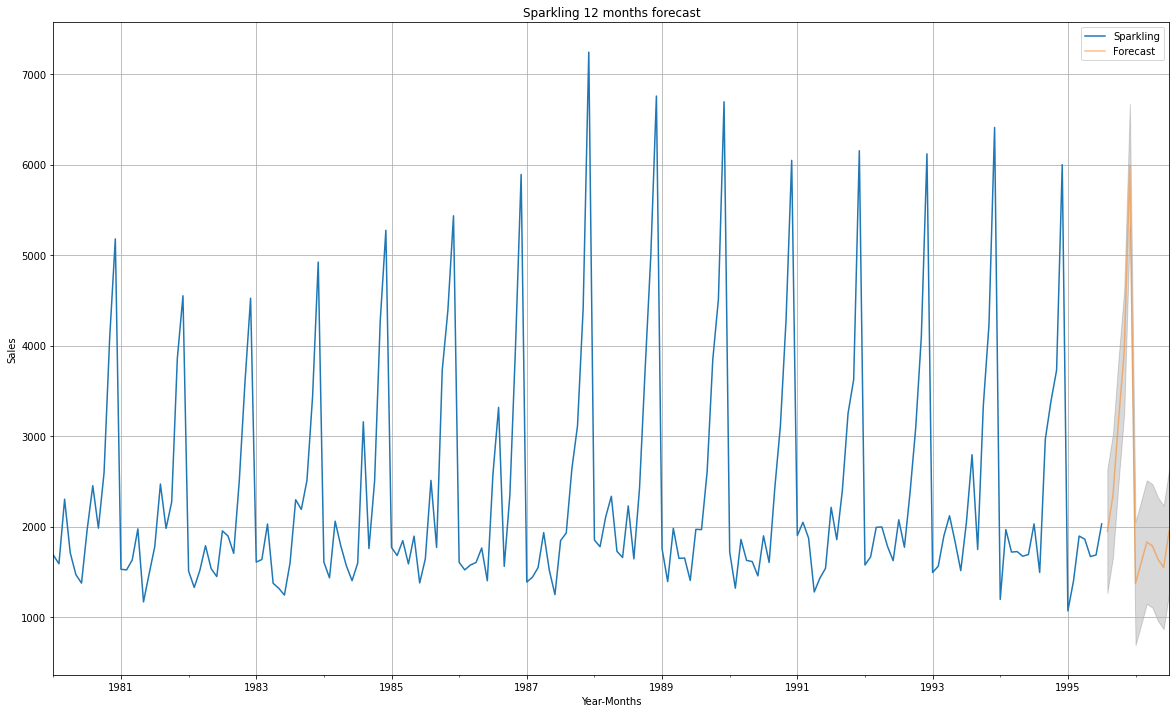

In [310]:
axis = df.plot(label='Actual', figsize=(20,12))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("Sparkling 12 months forecast")
plt.grid()
plt.show()

In [311]:
fullmodel2 = ExponentialSmoothing(dfr,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [312]:
print(fullmodel2.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                         110117.712
Optimized:                         True   AIC                           1224.723
Trend:                         Additive   BIC                           1276.420
Seasonal:                Multiplicative   AICC                          1228.794
Seasonal Periods:                    12   Date:                 Thu, 12 Aug 2021
Box-Cox:                          False   Time:                         15:23:46
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3000000                alpha                False
smoothing_slope          

In [313]:
predicted_manual_full_data = fullmodel2.forecast(steps=12)

In [314]:
predicted_manual_full_data.head()

1995-08-31    40.074648
1995-09-30    39.245730
1995-10-31    41.312369
1995-11-30    48.067469
1995-12-31    68.735454
Freq: M, dtype: float64

In [315]:
rmse = mean_squared_error(dfr['Rose'],fullmodel2.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 24.266535961104537


In [316]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':predicted_manual_full_data - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':predicted_manual_full_data,
                          'upper_ci': predicted_manual_full_data + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_2_df.head()

lower_CI  prediction    upper_ci
1995-08-31  -7.559277   40.074648   87.708574
1995-09-30  -8.388196   39.245730   86.879656
1995-10-31  -6.321556   41.312369   88.946295
1995-11-30   0.433543   48.067469   95.701394
1995-12-31  21.101528   68.735454  116.369379

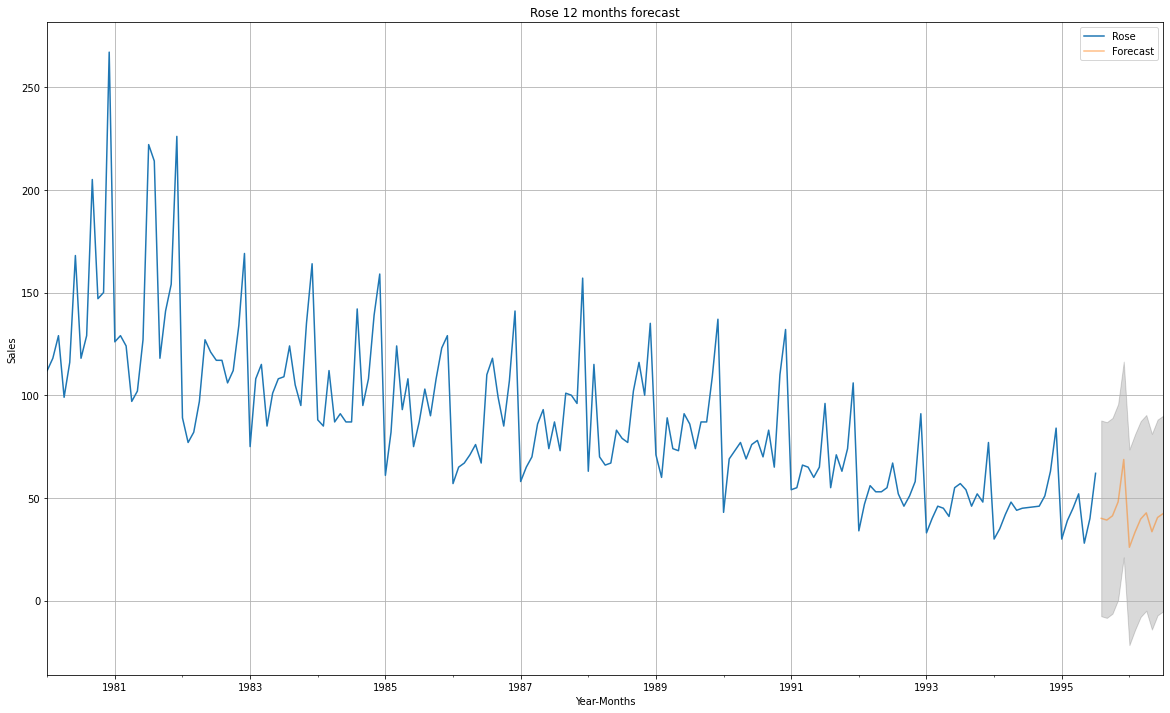

In [317]:
axis = dfr.plot(label='Actual', figsize=(20,12))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("Rose 12 months forecast")
plt.grid()
plt.show()

# The END